# BEDU Proyecto Análisis de datos en Python 

# Equipo 2 
  - Rafael Alejandro García Ramírez
  - Julio Emmanuel Meza Rangel 
  - Carlos Rendón Hernández

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') # desactivamos los warnings

import country_converter as coco # para convertir los códigos de país a nombres de país

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/JulioEmmmanuel/bedu_limpieza_de_datos/main/malaria_clean.csv")
df.head()

country  year  presumed_cases  confirmed_cases  estimated_deaths  \
0     AFG  2018           51174           248689               292   
1     AFG  2019            1034           173860               170   
2     AFG  2020             150           105295               110   
3     AGO  2018          777685          5150575             13489   
4     AGO  2019          475810          7054978             13622   

   mortality_rate  treated_cases  total_cases  treated_rate  
0             1.0          31114       299863         10.38  
1             0.6         169504       174894         96.92  
2             0.4         103466       105445         98.12  
3            43.8        6092332      5928260        102.77  
4            42.8        5575259      7530788         74.03

In [ ]:
df.shape

(256, 9)

##Estimados de locación y variabilidad

Vamos a usar estimados de locación y variabilidad para describir nuestro dataset. Ya tenemos un dataset limpio, así que ahora toca extraer información útil de él.
Recuerda que sólo es posible obtener estimados de locación y variabilidad cuando tenemos datos numéricos (tanto discretos como continuos). La actividad consiste en lo siguiente:

Identifica las columnas de tu dataset que tengan datos numéricos.
Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).
Obtén los siguientes estimados de tus columnas numéricas:
- Promedio
- Mediana
- Media Truncada
- Desviación estándar
- Rango
- Percentiles 25 y 75 (por lo menos)
- Rango intercuartil

### Solución

Utilizaremos el método select_dtypes y 'numbers' para identificar las columnas de nuestro dataset que contengan datos numéricos.

In [ ]:
df_numeric = df.select_dtypes(include = 'number')
df_numeric.head()

year  presumed_cases  confirmed_cases  estimated_deaths  mortality_rate  \
0  2018           51174           248689               292             1.0   
1  2019            1034           173860               170             0.6   
2  2020             150           105295               110             0.4   
3  2018          777685          5150575             13489            43.8   
4  2019          475810          7054978             13622            42.8   

   treated_cases  total_cases  treated_rate  
0          31114       299863         10.38  
1         169504       174894         96.92  
2         103466       105445         98.12  
3        6092332      5928260        102.77  
4        5575259      7530788         74.03

A pesar de que la columna 'year' contiene datos numéricos, no es una variable numérica sino más bien categórica. Por esta razón no consideraremos esta columna.

In [ ]:
df_numeric = df_numeric.drop(columns = ['year'])

Utilizaremos los métodos describe y aggregate para calcular los estimados de locación y variabilidad. Le pasaremos como argumento al método describe los percentiles que queremos obtener.

In [ ]:
df_numeric.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9])

presumed_cases  confirmed_cases  estimated_deaths  mortality_rate  \
count    2.560000e+02     2.560000e+02        256.000000      256.000000   
mean     2.784287e+05     1.502120e+06       6052.964844       19.173047   
std      9.463618e+05     3.492849e+06      21948.609077       29.270569   
min      0.000000e+00     0.000000e+00          0.000000        0.000000   
10%      0.000000e+00     4.100000e+01          0.000000        0.000000   
25%      0.000000e+00     1.191500e+03          0.000000        0.000000   
50%      0.000000e+00     2.542450e+04         53.500000        0.450000   
75%      5.684075e+04     9.642722e+05       5118.500000       35.200000   
90%      5.827545e+05     5.167341e+06      13555.500000       70.500000   
max      8.557644e+06     2.259065e+07     199689.000000      105.200000   

       treated_cases   total_cases  treated_rate  
count   2.560000e+02  2.560000e+02    256.000000  
mean    1.804876e+06  1.780548e+06     76.683789  
std     4.752841e+06  4.020465e+06     66.746025  
min     0.000000e+00  0.000000e+00      0.000000  
10%     0.000000e+00  4.100000e+01      0.000000  
25%     3.057500e+02  1.296000e+03     28.360000  
50%     1.227800e+04  3.198000e+04     91.150000  
75%     7.490605e+05  1.211018e+06    100.000000  
90%     5.686234e+06  5.976834e+06    101.195000  
max     3.096228e+07  2.496000e+07    559.520000

Consideramos que la transpuesta del Data Frame anterior es más sencilla de leer. La guardaremos en una variable.

In [ ]:
estimados_locacion_y_variabilidad = df_numeric.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]).transpose()
estimados_locacion_y_variabilidad

count          mean           std  min   10%      25%  \
presumed_cases    256.0  2.784287e+05  9.463618e+05  0.0   0.0     0.00   
confirmed_cases   256.0  1.502120e+06  3.492849e+06  0.0  41.0  1191.50   
estimated_deaths  256.0  6.052965e+03  2.194861e+04  0.0   0.0     0.00   
mortality_rate    256.0  1.917305e+01  2.927057e+01  0.0   0.0     0.00   
treated_cases     256.0  1.804876e+06  4.752841e+06  0.0   0.0   305.75   
total_cases       256.0  1.780548e+06  4.020465e+06  0.0  41.0  1296.00   
treated_rate      256.0  7.668379e+01  6.674603e+01  0.0   0.0    28.36   

                       50%         75%          90%          max  
presumed_cases        0.00    56840.75   582754.500   8557644.00  
confirmed_cases   25424.50   964272.25  5167341.000  22590647.00  
estimated_deaths     53.50     5118.50    13555.500    199689.00  
mortality_rate        0.45       35.20       70.500       105.20  
treated_cases     12278.00   749060.50  5686234.000  30962280.00  
total_cases       31980.00  1211017.50  5976834.000  24959997.00  
treated_rate         91.15      100.00      101.195       559.52

Podemos observar que todas las varables tienen un mínimo de 0.0 y un valor máximo positivo. Por esta razón, el rango de cada variable coincide con su valor máximo. Renomobraremos la columna 'max' como 'range' con el único objetivo de ser constistentes con el ejercicio propuesto.

Calculamos también el rango intercuartílico de cada variable. Luego eliminamos las columnas 'count' y 'min' debido a que tienen el mismo valor para todas las variables ('count' es igual al número de registros en nuestro data frame porque ya contamos con un data frame limpio sin valores nulos).

In [ ]:
estimados_locacion_y_variabilidad.rename(columns = {'max':'range'}, inplace = True)
estimados_locacion_y_variabilidad['iqr'] = estimados_locacion_y_variabilidad['75%']-estimados_locacion_y_variabilidad['25%']
estimados_locacion_y_variabilidad.drop(columns = ['count','min'], inplace = True)
estimados_locacion_y_variabilidad.head()

mean           std   10%      25%       50%  \
presumed_cases    2.784287e+05  9.463618e+05   0.0     0.00      0.00   
confirmed_cases   1.502120e+06  3.492849e+06  41.0  1191.50  25424.50   
estimated_deaths  6.052965e+03  2.194861e+04   0.0     0.00     53.50   
mortality_rate    1.917305e+01  2.927057e+01   0.0     0.00      0.45   
treated_cases     1.804876e+06  4.752841e+06   0.0   305.75  12278.00   

                        75%        90%       range        iqr  
presumed_cases     56840.75   582754.5   8557644.0   56840.75  
confirmed_cases   964272.25  5167341.0  22590647.0  963080.75  
estimated_deaths    5118.50    13555.5    199689.0    5118.50  
mortality_rate        35.20       70.5       105.2      35.20  
treated_cases     749060.50  5686234.0  30962280.0  748754.75

Ahora, calculamos la media truncada (quitando un 20% de los valores) y la mediana de cada variable e insertamos los resultados al Data Frame anterior en la posición que nos parece más adecuada.

In [ ]:
truncated_means = df.iloc[:,2:].apply(stats.trim_mean, proportiontocut=0.2)
medians = df.iloc[:,2:].agg('median')

estimados_locacion_y_variabilidad.insert(1, 'truncated_mean(20%)', truncated_means)
estimados_locacion_y_variabilidad.insert(2, 'median', medians)
estimados_locacion_y_variabilidad

mean  truncated_mean(20%)    median           std  \
presumed_cases    2.784287e+05         13015.649351      0.00  9.463618e+05   
confirmed_cases   1.502120e+06        228468.772727  25424.50  3.492849e+06   
estimated_deaths  6.052965e+03          1159.071429     53.50  2.194861e+04   
mortality_rate    1.917305e+01             8.404545      0.45  2.927057e+01   
treated_cases     1.804876e+06        172474.357143  12278.00  4.752841e+06   
total_cases       1.780548e+06        297215.038961  31980.00  4.020465e+06   
treated_rate      7.668379e+01            79.240584     91.15  6.674603e+01   

                   10%      25%       50%         75%          90%  \
presumed_cases     0.0     0.00      0.00    56840.75   582754.500   
confirmed_cases   41.0  1191.50  25424.50   964272.25  5167341.000   
estimated_deaths   0.0     0.00     53.50     5118.50    13555.500   
mortality_rate     0.0     0.00      0.45       35.20       70.500   
treated_cases      0.0   305.75  12278.00   749060.50  5686234.000   
total_cases       41.0  1296.00  31980.00  1211017.50  5976834.000   
treated_rate       0.0    28.36     91.15      100.00      101.195   

                        range         iqr  
presumed_cases     8557644.00    56840.75  
confirmed_cases   22590647.00   963080.75  
estimated_deaths    199689.00     5118.50  
mortality_rate         105.20       35.20  
treated_cases     30962280.00   748754.75  
total_cases       24959997.00  1209721.50  
treated_rate           559.52       71.64

Finalmente, redondeamos los resultados a dos decimales para que sean más legibles.

In [ ]:
estimados_locacion_y_variabilidad = estimados_locacion_y_variabilidad.round(2)
estimados_locacion_y_variabilidad

mean  truncated_mean(20%)    median         std   10%  \
presumed_cases     278428.68             13015.65      0.00   946361.83   0.0   
confirmed_cases   1502119.70            228468.77  25424.50  3492849.07  41.0   
estimated_deaths     6052.96              1159.07     53.50    21948.61   0.0   
mortality_rate         19.17                 8.40      0.45       29.27   0.0   
treated_cases     1804876.47            172474.36  12278.00  4752841.07   0.0   
total_cases       1780548.38            297215.04  31980.00  4020465.08  41.0   
treated_rate           76.68                79.24     91.15       66.75   0.0   

                      25%       50%         75%        90%        range  \
presumed_cases       0.00      0.00    56840.75   582754.5   8557644.00   
confirmed_cases   1191.50  25424.50   964272.25  5167341.0  22590647.00   
estimated_deaths     0.00     53.50     5118.50    13555.5    199689.00   
mortality_rate       0.00      0.45       35.20       70.5       105.20   
treated_cases      305.75  12278.00   749060.50  5686234.0  30962280.00   
total_cases       1296.00  31980.00  1211017.50  5976834.0  24959997.00   
treated_rate        28.36     91.15      100.00      101.2       559.52   

                         iqr  
presumed_cases      56840.75  
confirmed_cases    963080.75  
estimated_deaths     5118.50  
mortality_rate         35.20  
treated_cases      748754.75  
total_cases       1209721.50  
treated_rate           71.64

##Introducción a la visualización de datos: Distribuciones

Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.

Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.

Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

### Solución

Lo primero que haremos será analizar la distribución de cada una de nuestras variables numéricas utilizando boxplots. Para ello utilizaremos la biblioteca 'seaborn'. Echemos un vistazo a la lista de variables numéricas de nuestro data frame.

In [ ]:
df_numeric.columns

Index(['presumed_cases', 'confirmed_cases', 'estimated_deaths',
       'mortality_rate', 'treated_cases', 'total_cases', 'treated_rate'],
      dtype='object')

1. Boxplot de la variable 'presumed_cases'.

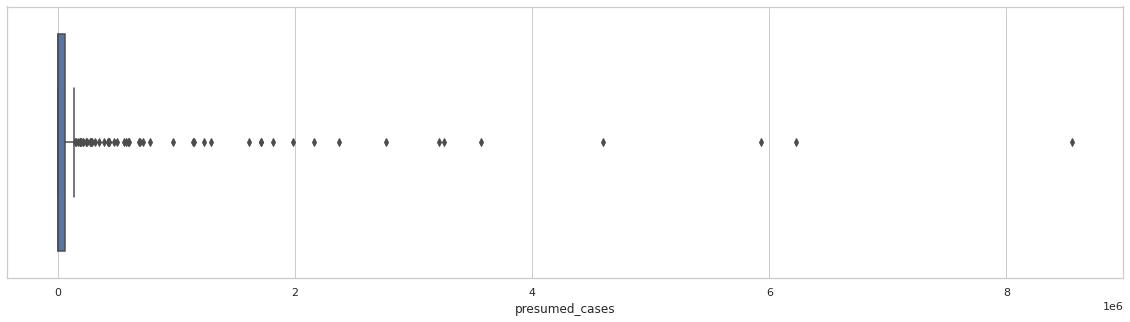

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20,5))
sns.boxplot(x = df['presumed_cases'])

Esta gráfica es muy interesante y nos da información muy útil.
* Podemos notar que la gran mayoría de nuestros datos se encuentran en los valores más pequeños.
* También observamos que, en general, nuestros datos están muy concentrados (pocos dispersos), aunque también vemos la prresencia de muchos valores atípicos.
* Nuestros valores típicos son entonces valores por debajo de 500 000 y existen algunos valores fuera de este rango que podemos considerar como atípicos.

2. Boxplot de la variable 'confirmed_cases'.

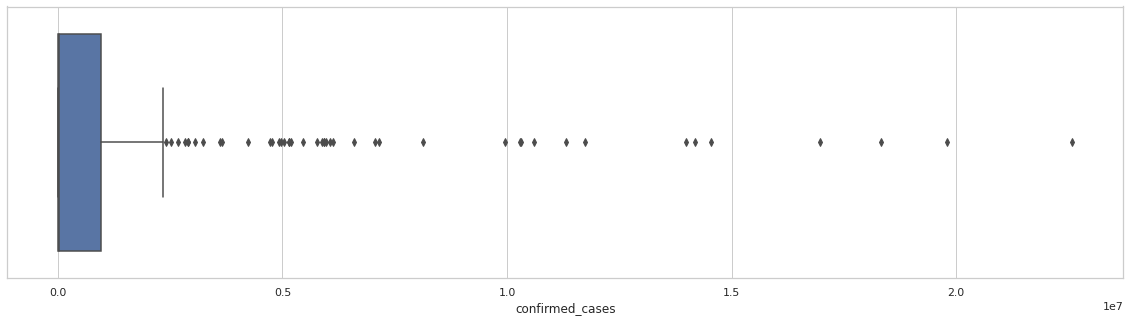

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = df['confirmed_cases'])

Esta variable tiene una distribución muy similar a la variable anterior. Los datos están concentrados hacia la izquierda del intervalo que contiene a todo su rango. Hay una 'colita' que se extiende hacia los valores más grandes, la cual representa a posibles valores atípicos.

La diferencia con la variable anterior es la escala. Mientras la varable 'presumed_cases' alcanza su máximo en un valor por debajo de los 9 millones, la variable 'confirmed_cases' tiene un valor máximo mayor a los 22 millones.

3. Boxplot de la variable 'estimated_deaths'

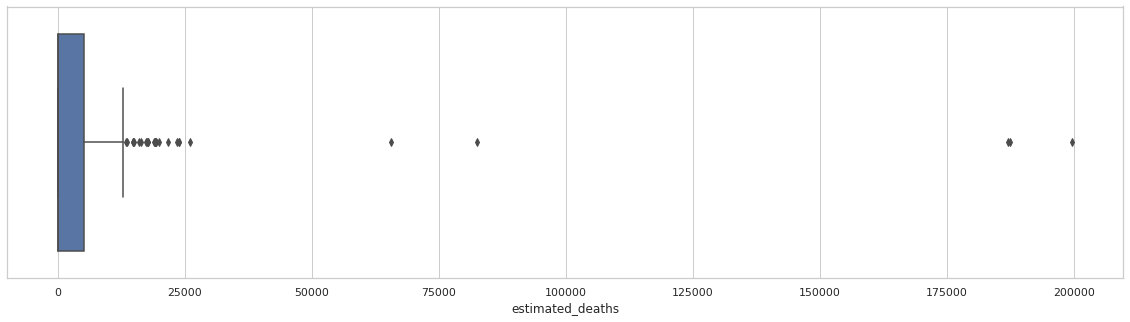

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = df['estimated_deaths'])

Algo interesante ocurre con esta variable. Nuevamente los valores 'típicos' son valores relativmente pequeños, lo cual es de esperarse. Sin embargo, esta variable presenta valores 'atípicos' muy extremos, muy cerca de los 200 000 casos, cuando lo normal o, por lo menos, lo esperado es tener valores por debajo de los 25 000 casos.

Resulta muy interesante analizar estos casos extremos, porque podría tratarse de errores de medición, pero también podría tratarse de un indicador de alta mortalidad de esta enfermedad en cierta región.

4. Boxplot de la variable 'mortality_rate'

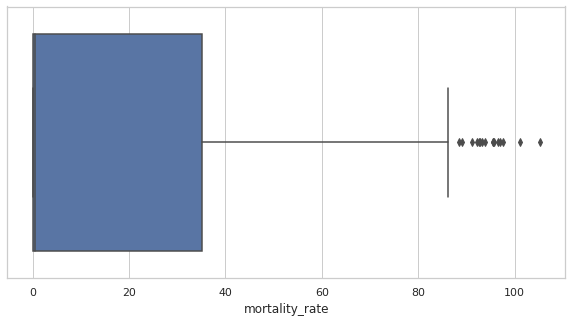

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['mortality_rate'])

Algo que es importante mencionar y que hasta ahora no se había hecho es que en todas las variables analizadas hasta ahora, la mediana se encuentra muy pegadita al valor mínimo de la variable. Esto confirma la alta concentración de los datos en valores pequeños.

Otra situación que nos llama la atención es que tenemos dos casos con un valor mayor a 100, que corresponde a los países donde la enfermedad ha tenido un impacto negativo muy evidente.

5. Boxplot de la variable 'treated_cases'.

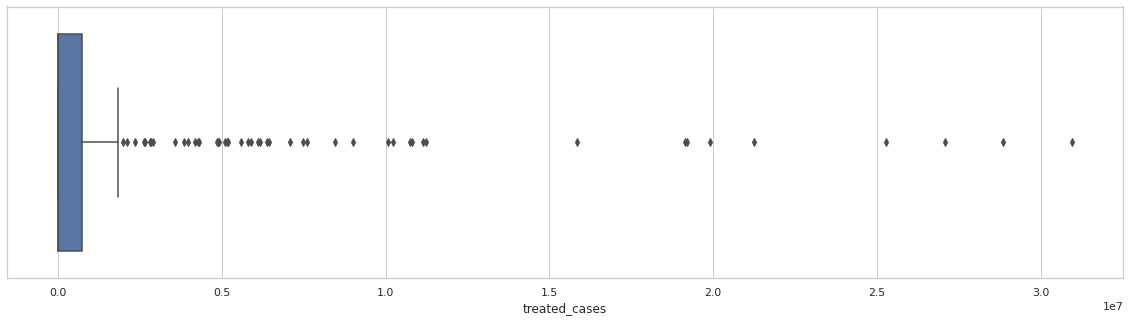

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = df['treated_cases'])

A primera vista observamos una distribución muy similar a la de la variable 'confirmed_cases'. Quizás no es de sorprenderse debido a que, intuitivamente, estas dos variables están naturalmente correlacionadas.

6. Boxplot de la variable 'total_cases'.

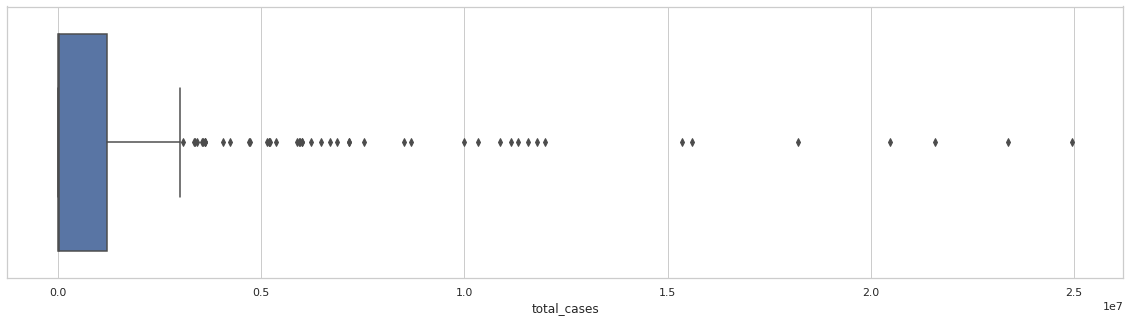

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(x = df['total_cases'])

Esta es una de las variables más importantes de nuestro data set. Como es de esperarse, esta variable determina, en general, la distribución que la mayoría de nuestras variables tiene: sesgadas a la derecha, es decir, valores concentrados en la parte inferior de la distribución y valores atípicos en la parte superior.

Boxplot de la variable 'treated_rate'.

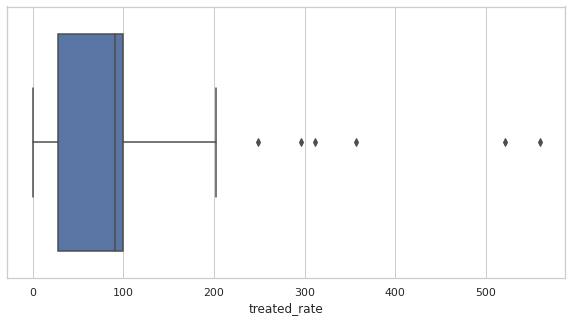

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['treated_rate'])

Esta es quizá la variable que más difiere de las demás en cuanto a su distribución. Algo a resaltar es que hay un 25% de los datos muy concentrados en valores menores (pero muy cercanos) a 100.

Un aspecto común que podemos notar en el boxplot de cada una de las variables excepto 'treated_rate' es que prácticamente el 50% de los datos tienen un valor igual o muy cercano a 0.0.

Ahora utilizaremos el Score de Rango Intercuartílico para filtrar los valores atípicos y comparar las distribuciones resultantes con las anteriores. Pero haremos una pequeña modificación para obtener resultados más significativos: filtraremos aquellos valores que tengan un valor de 0.0 en alguna de las variables.

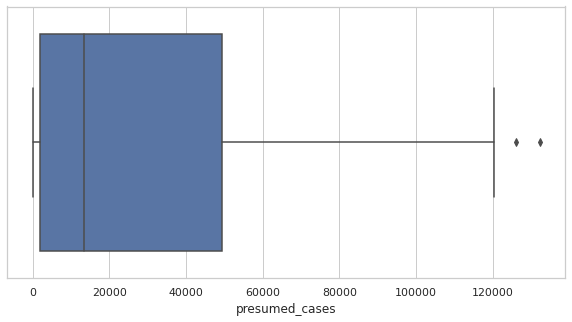

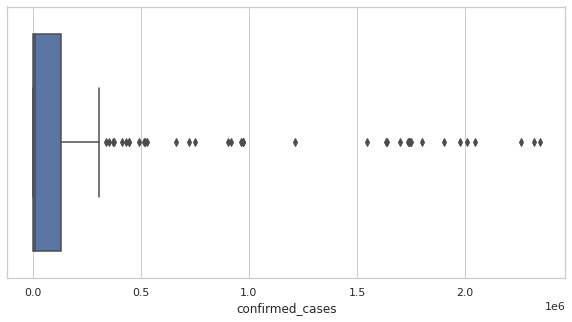

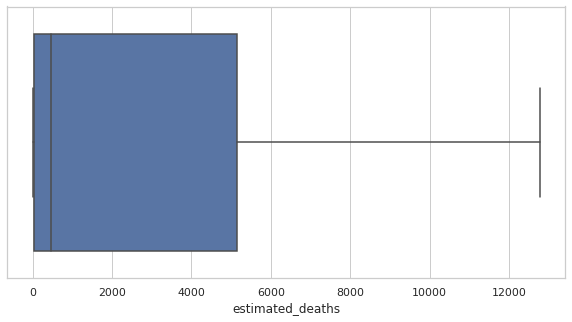

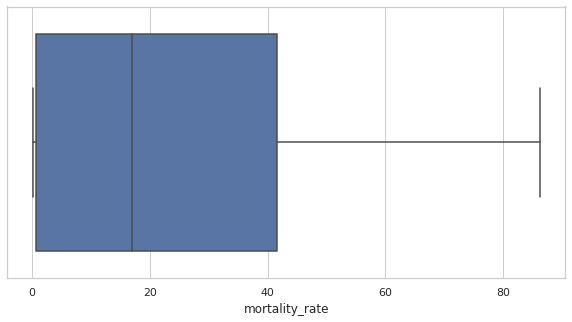

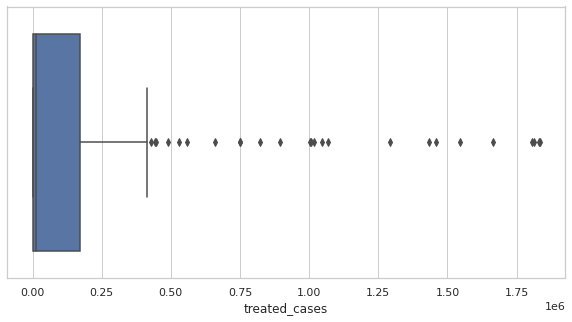

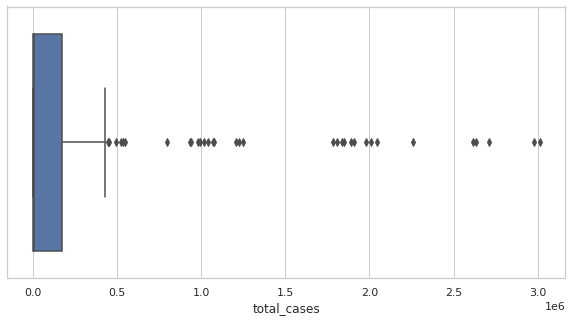

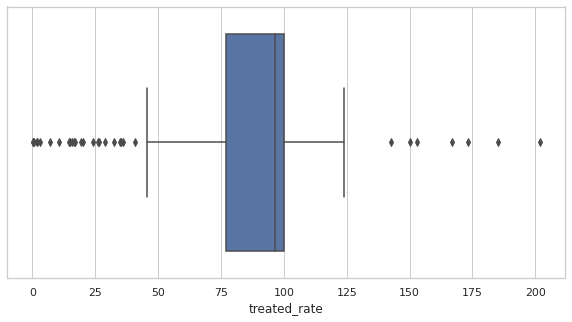

In [ ]:
for variable in df_numeric.columns:
  iqr = df[variable].quantile(0.75) - df[variable].quantile(0.25)
  filtro_inferior = df[variable] > 0.0 #df[variable].quantile(0.25) - (iqr * 1.5)
  filtro_superior = df[variable] < df[variable].quantile(0.75) + (iqr * 1.5)
  plt.figure(figsize = (10,5))
  sns.boxplot(x = df[filtro_inferior & filtro_superior][variable])


Algunas anotaciones imporantes de estas gráficas con respecto a las anteriores son las siguientes:
* Después de aplicar el filtro, las variables 'presumed_cases', 'estimated_deaths' y 'mortality_rate' siguen presentando una concentración el los valores más pequeños, pero ya no es algo tan extremo. De hecho, en estas variables podemos observar una cantidad nula o casi nula de valores atípicos. La mediana sigue estando más cerca del primer cuartil que del tercero en estas variables, pero ya no es algo tan marcado, particularmente para la variable 'mortality_rate', donde la mediana se encuentra a una distancia de los otros dos cuartiles mucho más equilibrada.
* Las variables 'confirmed_cases', 'treated_cases' y 'total_cases' aún tienen una distribución muy sesgada a la derecha con una alta concentración en los valores más cercanos a 0. De hecho, 50% de los valores de estas variables están relativamente cercanos a 0.
* Finalmente, 'treated_rate' es un poco más simétrica después del filtro. Tenemos valores atípicos en ambos extremos y el 50% de los datos están entre los valores 75 y 100.

Para complementar el entendimiento de la distribución de nuestras variables numéricas, graficaremos los histogramas de éstas y de esta manera confirmaremos las características que hemos observado con los boxplots.

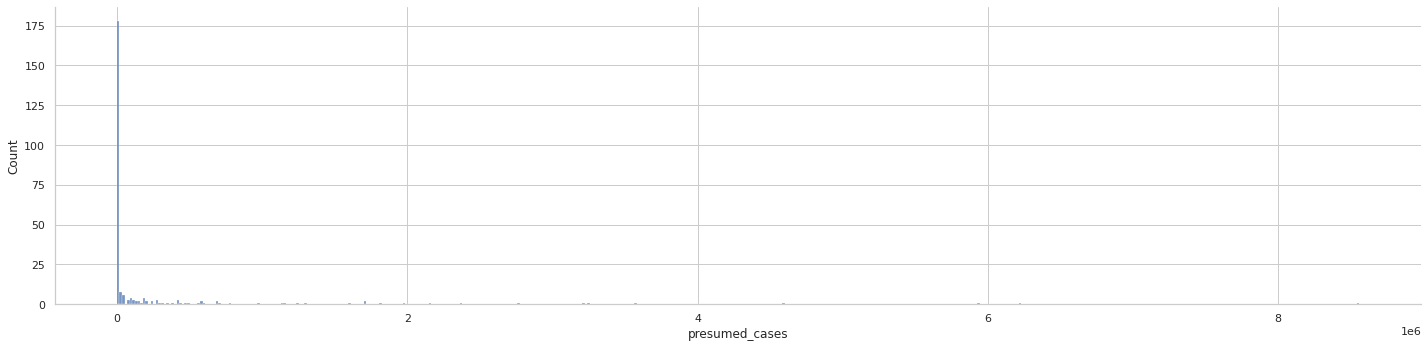

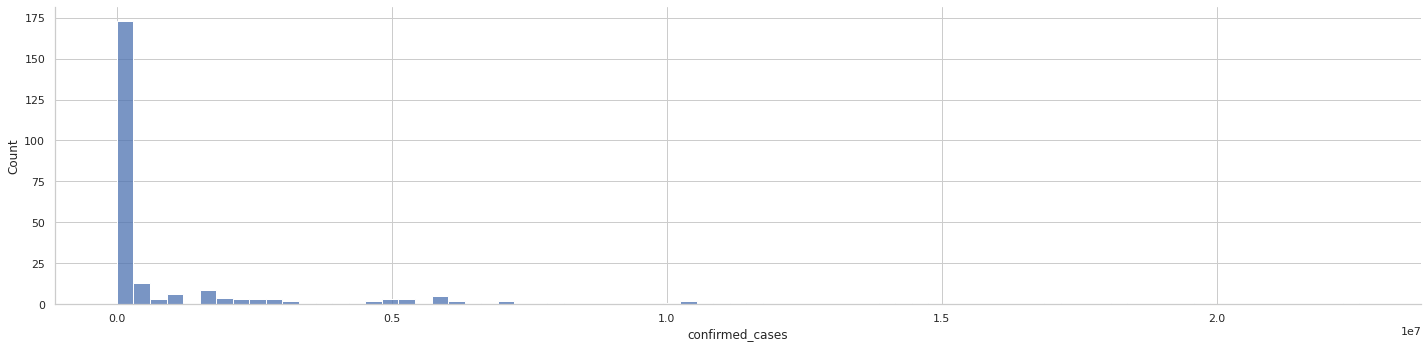

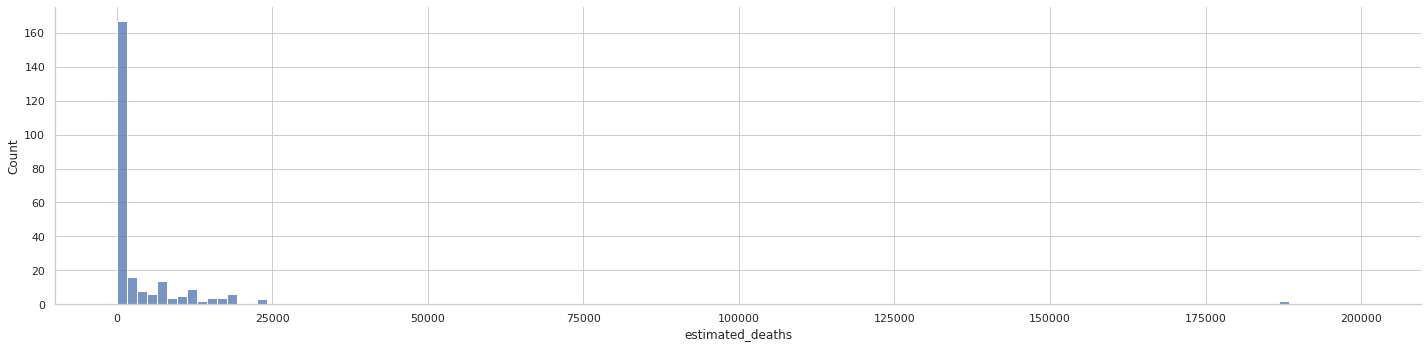

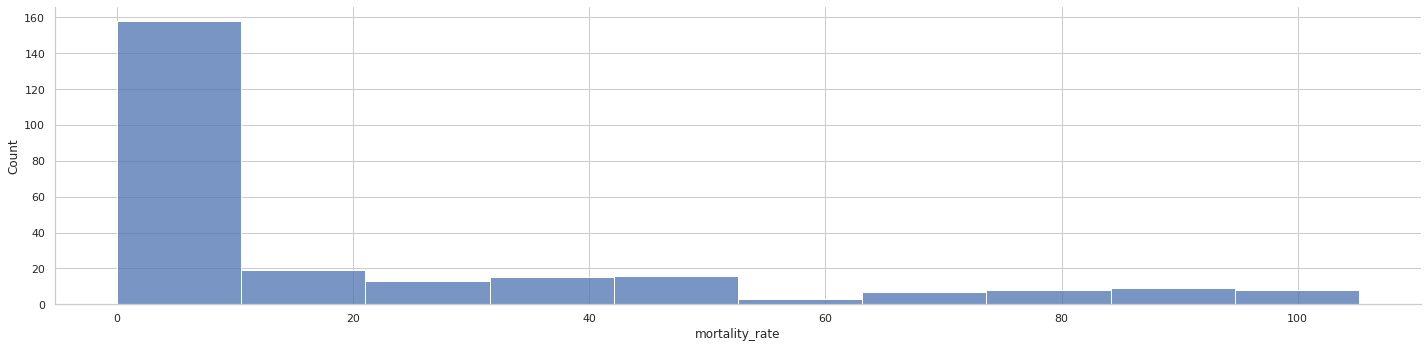

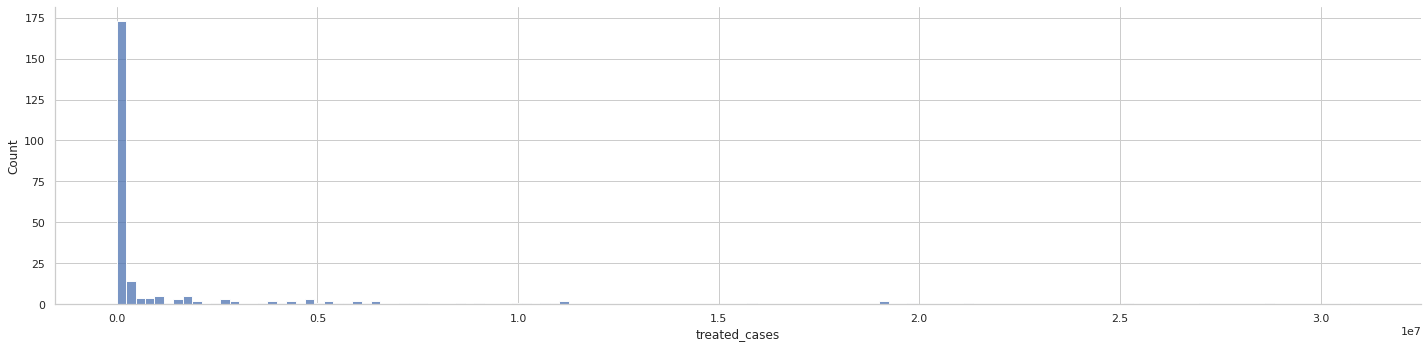

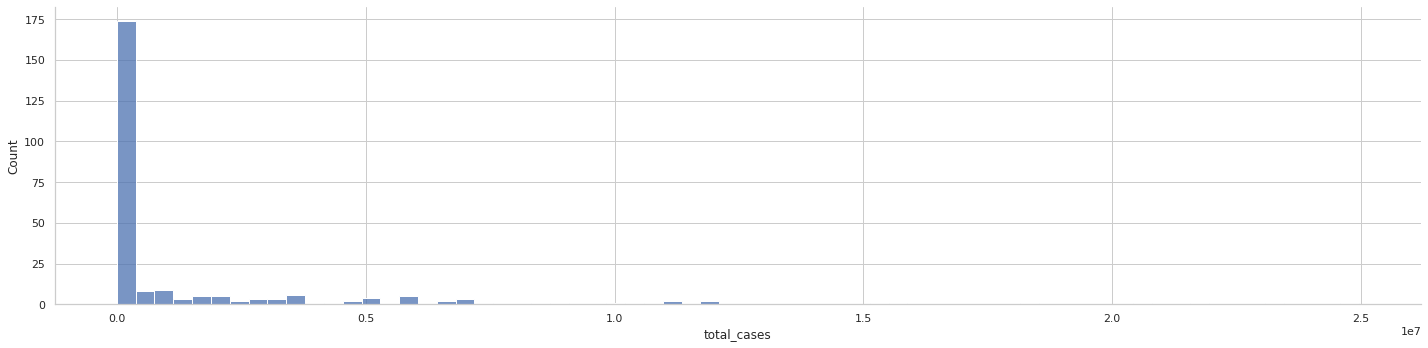

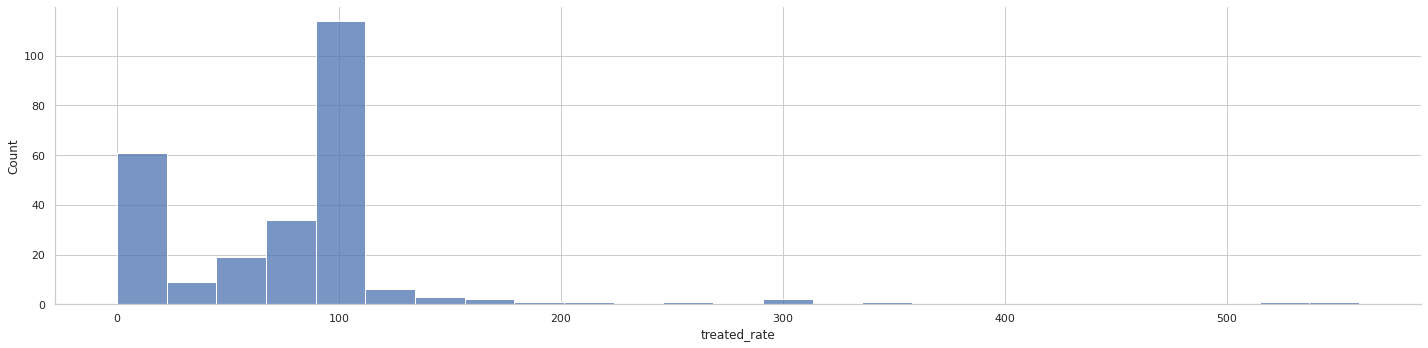

In [ ]:
for variable in df_numeric.columns:
  sns.displot(x = df[variable], height=5, aspect=4);

In [ ]:
for variable in df_numeric.columns:
  print('Variable:', variable)
  print('Asimetría:', skew(df[variable]))
  print('Curtosis:', kurtosis(df[variable]))
  print()

Variable: presumed_cases
Asimetría: 5.444678072033177
Curtosis: 34.74082670406024

Variable: confirmed_cases
Asimetría: 3.337916738648023
Curtosis: 12.35421208572616

Variable: estimated_deaths
Asimetría: 7.366517084294809
Curtosis: 58.182286099327634

Variable: mortality_rate
Asimetría: 1.4587993060429858
Curtosis: 0.9054005101868934

Variable: treated_cases
Asimetría: 3.8558693517700995
Curtosis: 16.211832017122177

Variable: total_cases
Asimetría: 3.2864488710091893
Curtosis: 12.090770823978016

Variable: treated_rate
Asimetría: 3.068912397843701
Curtosis: 18.50506060072254



Definitivamente ninguna de nuestras variables numéricas son parecidas a una normal. Todas son distribuciones de cola larga y tienen asimetría positiva.

Finalmente, crearemos gráficas de densidad para comparar la distribución de los casos totales de la enfermedad registrados en cada año.

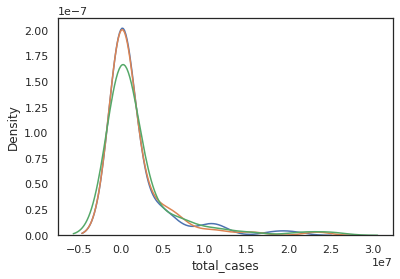

In [ ]:
sns.set(style='white')

df_2018 = df[df['year'] == 2018]
df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]

sns.kdeplot(df_2018['total_cases'])
sns.kdeplot(df_2019['total_cases'])
sns.kdeplot(df_2020['total_cases'])

Esta gráfica nos permite observar con claridad que el número total de casos se distribuyó de forma muy similar en los tres años (2018, 2019 y 2020).

##Exploración de variables categóricas y análisis multivariable

Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.

Identifica todas las variables categóricas en tu dataset.

Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.

Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.

De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

### Solución

La última gráfica realizada en el postwork anterior, muestra la distribución de los casos totales de la enfermedad por cada año. Sin embargo, sin las etiquetas correspondientes, es muy difícil saber qué gráfica corresponde a cada año. Así que modificaremos un poco esta gráfica para que sea mucho más explicativa e interpretable.

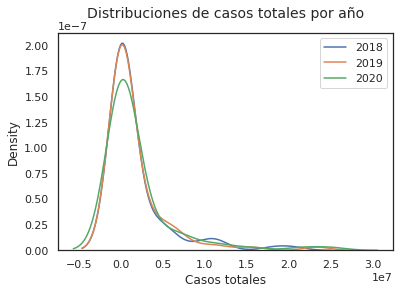

In [ ]:
ax = sns.kdeplot(df_2018['total_cases'], label='2018',shade=False)
sns.kdeplot(df_2019['total_cases'], shade=False, ax=ax, label='2019')
sns.kdeplot(df_2020['total_cases'], shade = False, ax = ax, label = '2020')
ax.set_title('Distribuciones de casos totales por año', fontsize=14, pad=15);
ax.set(xlabel='Casos totales');
ax.legend(loc='upper right');

Ahora, exploraremos un poco más la distribución de nuestras variales numéricas agrupadas por año. En esta ocasión veremos cómo se distribuye el promedio de los casos confirmados durante estos tres años.

In [ ]:
confirmed_cases_mean = df.groupby('year').mean()['confirmed_cases']

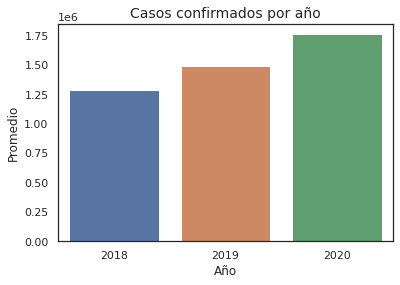

In [ ]:
ax = sns.barplot(x = confirmed_cases_mean.index, y = confirmed_cases_mean)
ax.set_title('Casos confirmados por año', fontsize = 14)
ax.set(xlabel = 'Año', ylabel = 'Promedio');

El promedio de los casos confirmados de la enfermedad va en aumento. Esta información es alarmante pero también es muy útil para cualquier persona que desee conocer el estado y evolución de la enfermedad. Conocer este tipo de informción es muy relevante si se quieren tomar medidas para atacar esta tendencia positiva.

Generaremos violinplots de nuestras variables numéricas haciendo una separación por año. Incluiremos todas las figuras en una misma figure y en diferentes axes.

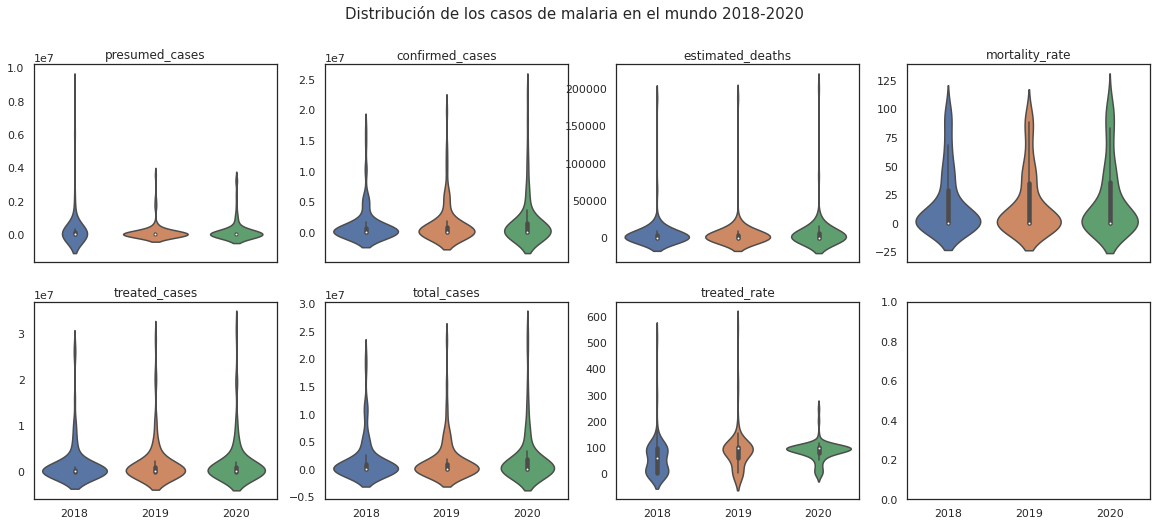

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8), sharex=True, sharey=False)

sns.violinplot(data = df, y= 'presumed_cases', x = 'year', ax=axes[0, 0])
sns.violinplot(data = df, y= 'confirmed_cases', x = 'year', ax=axes[0, 1])
sns.violinplot(data = df, y= 'estimated_deaths', x = 'year', ax=axes[0, 2])
sns.violinplot(data = df, y= 'mortality_rate', x = 'year', ax=axes[0, 3])
sns.violinplot(data = df, y= 'treated_cases', x = 'year', ax=axes[1, 0])
sns.violinplot(data = df, y= 'total_cases', x = 'year', ax=axes[1, 1])
sns.violinplot(data = df, y= 'treated_rate', x = 'year', ax=axes[1, 2])

axes[0, 0].set(xlabel='', ylabel='', title='presumed_cases')
axes[0, 1].set(xlabel='', ylabel='', title='confirmed_cases')
axes[0, 2].set(xlabel='', ylabel='', title='estimated_deaths')
axes[0, 3].set(xlabel='', ylabel='', title='mortality_rate')
axes[1, 0].set(xlabel='', ylabel='', title='treated_cases')
axes[1, 1].set(xlabel='', ylabel='', title='total_cases')
axes[1, 2].set(xlabel='', ylabel='', title='treated_rate')

fig.suptitle('Distribución de los casos de malaria en el mundo 2018-2020', fontsize=15);

##Correlaciones y regresión lineal simple

Identifica cuáles son las variables numéricas en tu dataset.
Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.

Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.

Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.

Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

In [ ]:
# cambiamos los country_codes a nombres de país
df['country'] = coco.convert(names=df['country'], to='name_short')
df.head()

country  year  presumed_cases  confirmed_cases  estimated_deaths  \
0  Afghanistan  2018           51174           248689               292   
1  Afghanistan  2019            1034           173860               170   
2  Afghanistan  2020             150           105295               110   
3       Angola  2018          777685          5150575             13489   
4       Angola  2019          475810          7054978             13622   

   mortality_rate  treated_cases  total_cases  treated_rate  
0             1.0          31114       299863         10.38  
1             0.6         169504       174894         96.92  
2             0.4         103466       105445         98.12  
3            43.8        6092332      5928260        102.77  
4            42.8        5575259      7530788         74.03

### 1.-Identifica cuáles son las variables numéricas en tu dataset.

In [ ]:
# imprimimos los nombres de columnas para ver qué tenemos
df.columns

Index(['country', 'year', 'presumed_cases', 'confirmed_cases',
       'estimated_deaths', 'mortality_rate', 'treated_cases', 'total_cases',
       'treated_rate'],
      dtype='object')

Vemos que todas las variables de nuestro dataset son variables numéricas a exepción de *country*.

### 2.-Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.

In [ ]:
# revisamos por valores NaN en el db  y el tipo de variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           256 non-null    object 
 1   year              256 non-null    int64  
 2   presumed_cases    256 non-null    int64  
 3   confirmed_cases   256 non-null    int64  
 4   estimated_deaths  256 non-null    int64  
 5   mortality_rate    256 non-null    float64
 6   treated_cases     256 non-null    int64  
 7   total_cases       256 non-null    int64  
 8   treated_rate      256 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 18.1+ KB


Vemos que cada variable tiene el tipo de dato correcto y no hay Nans escondidos.

### 3.- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.

In [83]:
def htmap(df, name):
    """Esta función crea un mapa de calor a partir de un dataframe"""
    plt.figure(figsize=(10,10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Mapa de calor de la matriz de correlación de ' + name) # ponemos un título al gráfico
    plt.show() # mostramos el mapa de calor

In [76]:
#quitamos la columna country para realizar el análisis 
df_filtered = df.drop(columns=['country'])

Aquí existe la posibilidad de analizar cada variable por año, dado que tenemos tres años: 2018, 2019, 2020; al hacerlo por año eliminamos la posibilidad de que el año tenga un factor correlación con las otras variables, haremos ambos para ver su relación con el año 

In [77]:
df_filtered.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000       -0.095361         0.055793          0.021533   
presumed_cases   -0.095361        1.000000         0.464157          0.545723   
confirmed_cases   0.055793        0.464157         1.000000          0.754245   
estimated_deaths  0.021533        0.545723         0.754245          1.000000   
mortality_rate    0.030659        0.365327         0.642411          0.504002   
treated_cases     0.023728        0.453448         0.841583          0.585492   
total_cases       0.026025        0.638631         0.978024          0.783719   
treated_rate      0.162738        0.025204         0.182423          0.062007   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                    0.030659       0.023728     0.026025      0.162738  
presumed_cases          0.365327       0.453448     0.638631      0.025204  
confirmed_cases         0.642411       0.841583     0.978024      0.182423  
estimated_deaths        0.504002       0.585492     0.783719      0.062007  
mortality_rate          1.000000       0.516830     0.644099      0.116971  
treated_cases           0.516830       1.000000     0.837875      0.431460  
total_cases             0.644099       0.837875     1.000000      0.164416  
treated_rate            0.116971       0.431460     0.164416      1.000000

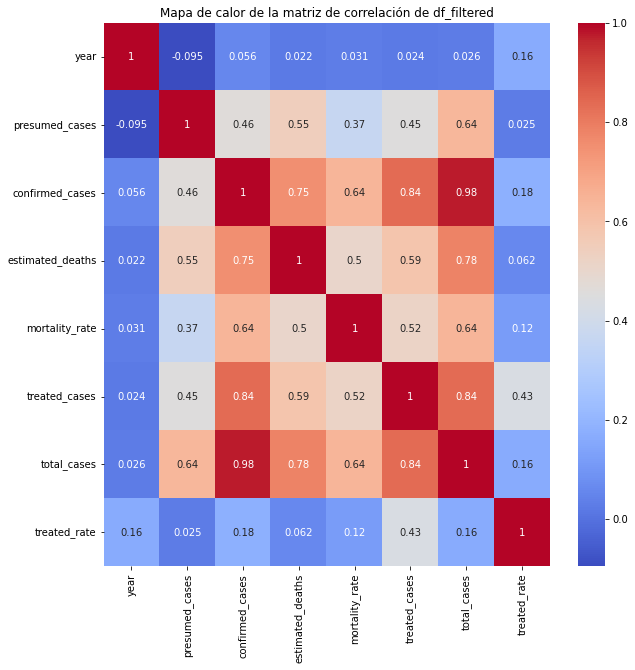

In [84]:
htmap(df_filtered, 'df_filtered')

Notamos que el año tiene muy poca relación con ninguna otra variable, pero esto puede ser resultado de la naturaleza de los datos, siendo que year solo varía entre su máximo y mínimo con un valor de 3, mientras que otros pueden tener rangos de hasta los miles. Por lo tanto, también sacaremos las matrices de correlación para cada año en específico. 

Para entender más acerca de la posible relación con los años vemos las matrices de correlación y los pairplots


In [86]:
# hacemos una matriz de correlación para ver las correlaciones entre las variables para cada año dado 
corr_years = []
for i in [2018, 2019, 2020]:
    df_year = df_filtered[df_filtered['year'] == i]
    df_year = df_year.drop(columns=['year'])
    corr_years.append([i,df_year.corr()]) 

In [ ]:
# imprimimos la matrix de correlación para el año 2018
corr_years[0][1]

presumed_cases  confirmed_cases  estimated_deaths  \
presumed_cases          1.000000         0.427050          0.504599   
confirmed_cases         0.427050         1.000000          0.754036   
estimated_deaths        0.504599         0.754036          1.000000   
mortality_rate          0.351555         0.671968          0.516799   
treated_cases           0.406775         0.702695          0.501503   
total_cases             0.699775         0.944786          0.778572   
treated_rate            0.055146         0.264047          0.102156   

                  mortality_rate  treated_cases  total_cases  treated_rate  
presumed_cases          0.351555       0.406775     0.699775      0.055146  
confirmed_cases         0.671968       0.702695     0.944786      0.264047  
estimated_deaths        0.516799       0.501503     0.778572      0.102156  
mortality_rate          1.000000       0.481743     0.658274      0.220853  
treated_cases           0.481743       1.000000     0.702560      0.696947  
total_cases             0.658274       0.702560     1.000000      0.228589  
treated_rate            0.220853       0.696947     0.228589      1.000000

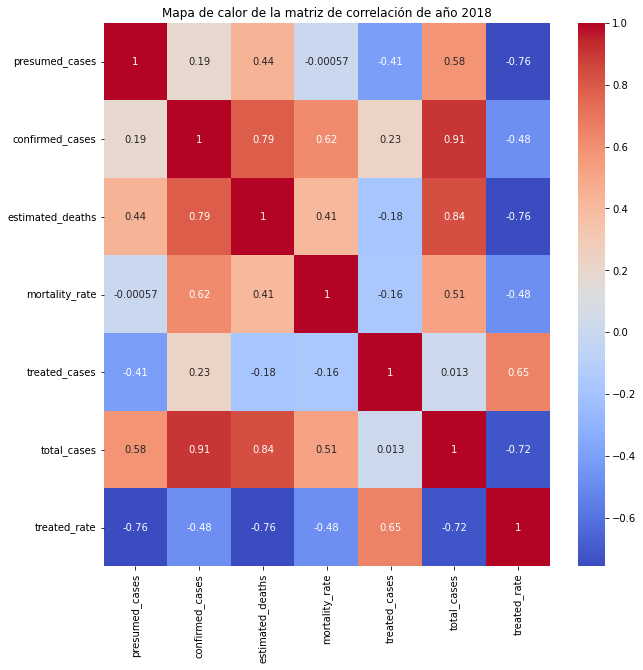

In [87]:
htmap(corr_years[0][1], 'año 2018')

In [ ]:
#2019
corr_years[1][1]

presumed_cases  confirmed_cases  estimated_deaths  \
presumed_cases          1.000000         0.663291          0.774507   
confirmed_cases         0.663291         1.000000          0.749071   
estimated_deaths        0.774507         0.749071          1.000000   
mortality_rate          0.470872         0.619925          0.468184   
treated_cases           0.611870         0.892543          0.590875   
total_cases             0.737915         0.994517          0.783763   
treated_rate            0.041305         0.160714          0.047131   

                  mortality_rate  treated_cases  total_cases  treated_rate  
presumed_cases          0.470872       0.611870     0.737915      0.041305  
confirmed_cases         0.619925       0.892543     0.994517      0.160714  
estimated_deaths        0.468184       0.590875     0.783763      0.047131  
mortality_rate          1.000000       0.523293     0.624866      0.098575  
treated_cases           0.523293       1.000000     0.890423      0.310844  
total_cases             0.624866       0.890423     1.000000      0.150708  
treated_rate            0.098575       0.310844     0.150708      1.000000

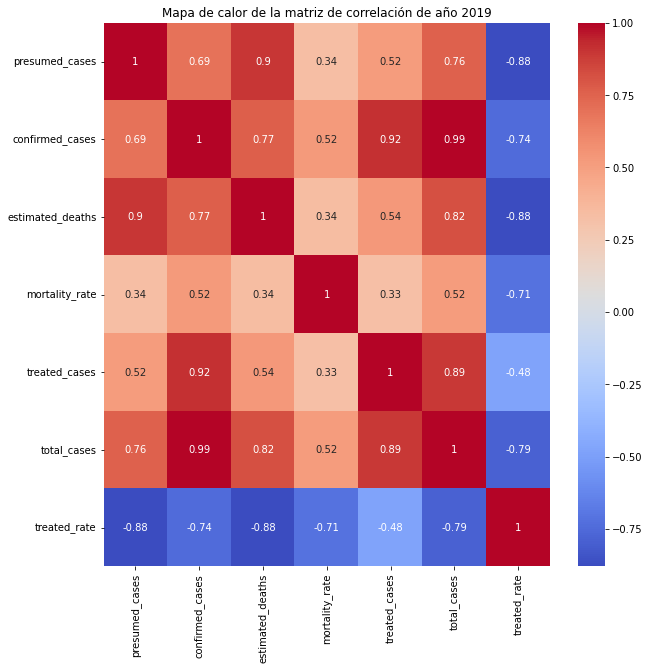

In [88]:
htmap(corr_years[1][1], 'año 2019')

In [ ]:
#2020
corr_years[2][1]

presumed_cases  confirmed_cases  estimated_deaths  \
presumed_cases          1.000000         0.681861          0.725816   
confirmed_cases         0.681861         1.000000          0.763439   
estimated_deaths        0.725816         0.763439          1.000000   
mortality_rate          0.492165         0.643398          0.520732   
treated_cases           0.667985         0.918895          0.660093   
total_cases             0.751645         0.994979          0.787689   
treated_rate            0.082483         0.133369          0.032719   

                  mortality_rate  treated_cases  total_cases  treated_rate  
presumed_cases          0.492165       0.667985     0.751645      0.082483  
confirmed_cases         0.643398       0.918895     0.994979      0.133369  
estimated_deaths        0.520732       0.660093     0.787689      0.032719  
mortality_rate          1.000000       0.545059     0.647482     -0.026338  
treated_cases           0.545059       1.000000     0.919949      0.267411  
total_cases             0.647482       0.919949     1.000000      0.131542  
treated_rate           -0.026338       0.267411     0.131542      1.000000

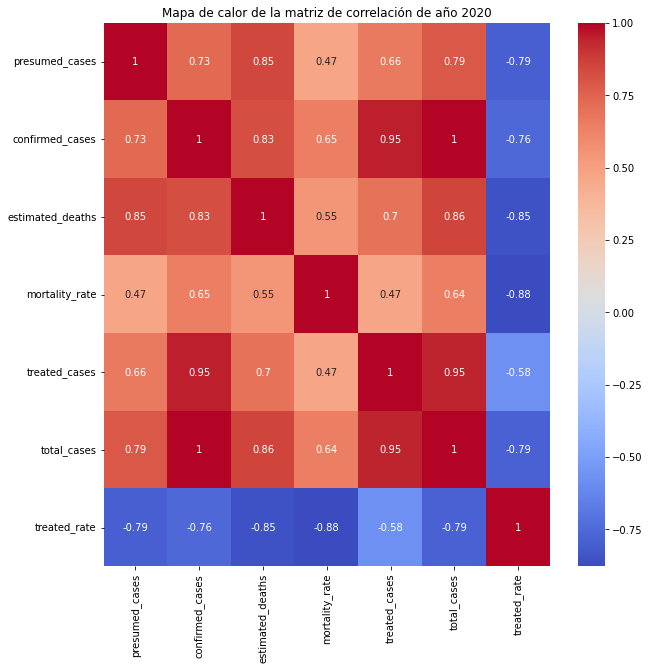

In [90]:
htmap(corr_years[2][1], 'año 2020')

Podemos ver los pairplots de cada caso 

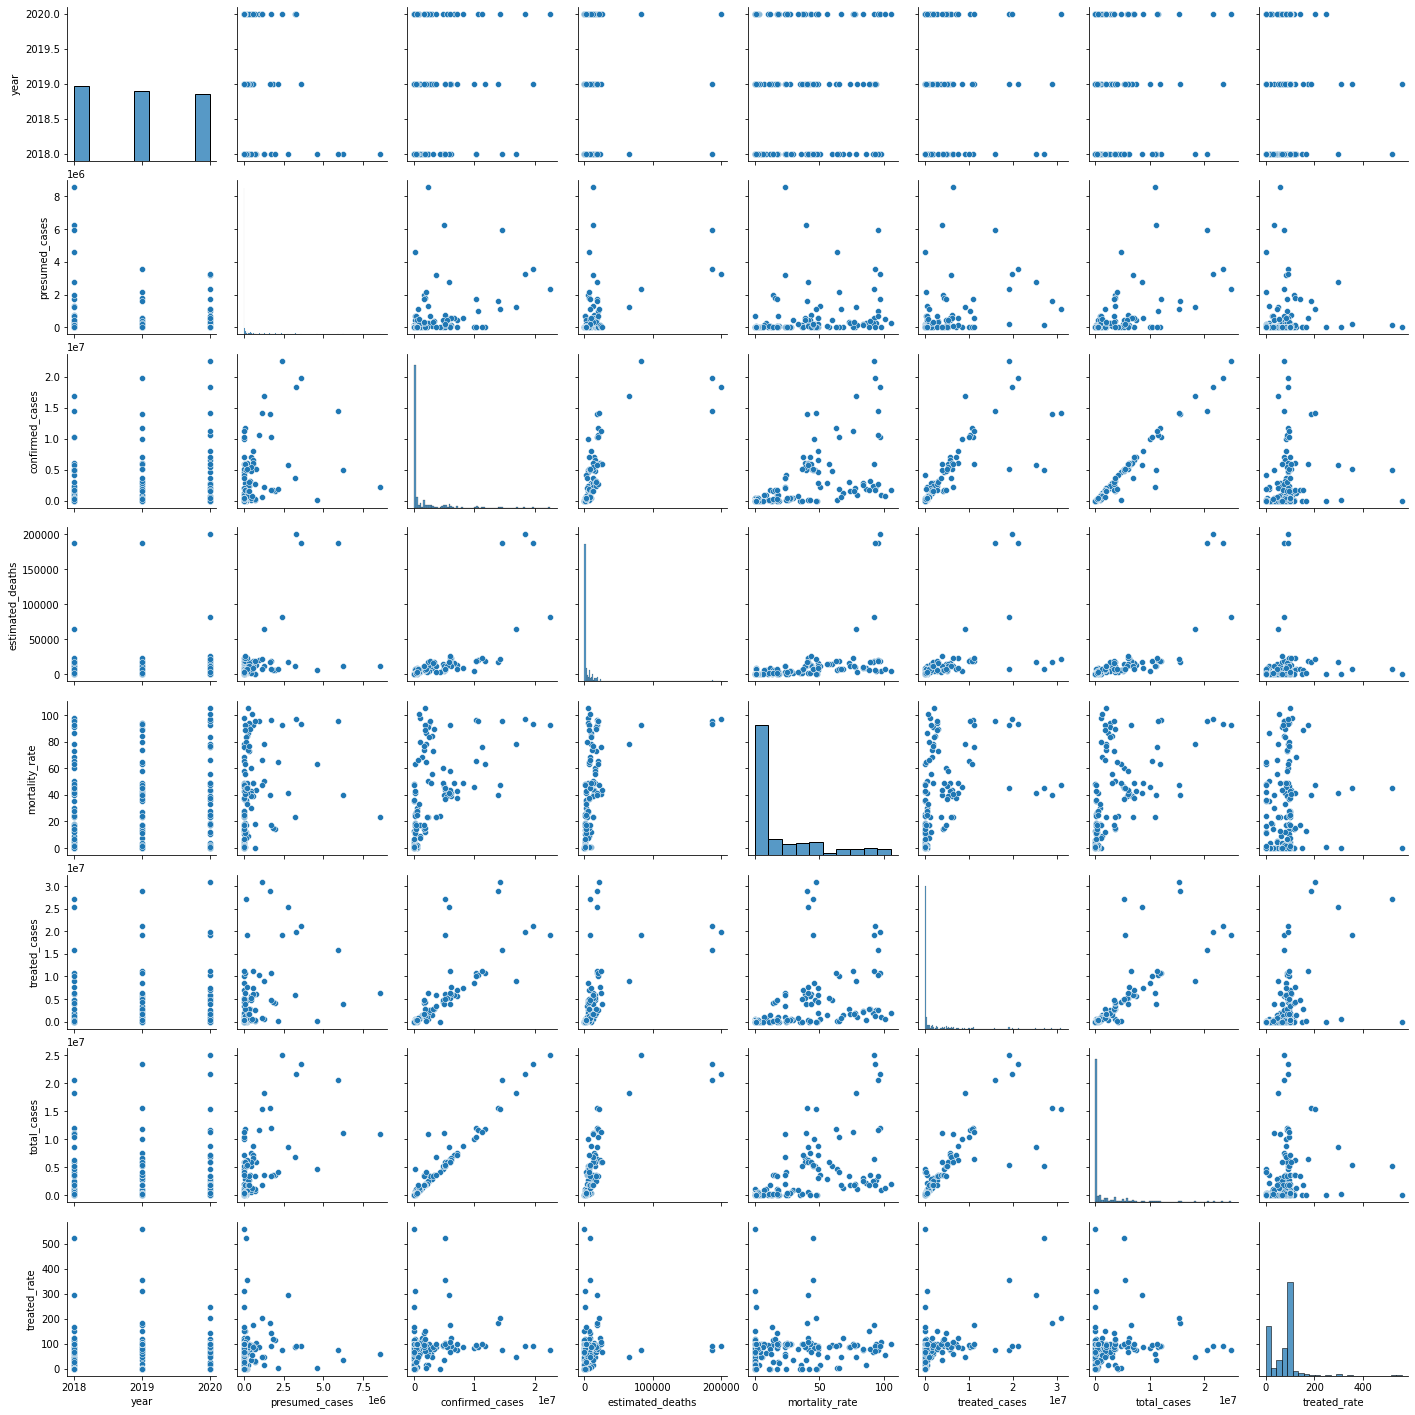

In [ ]:
sns.pairplot(df_filtered)

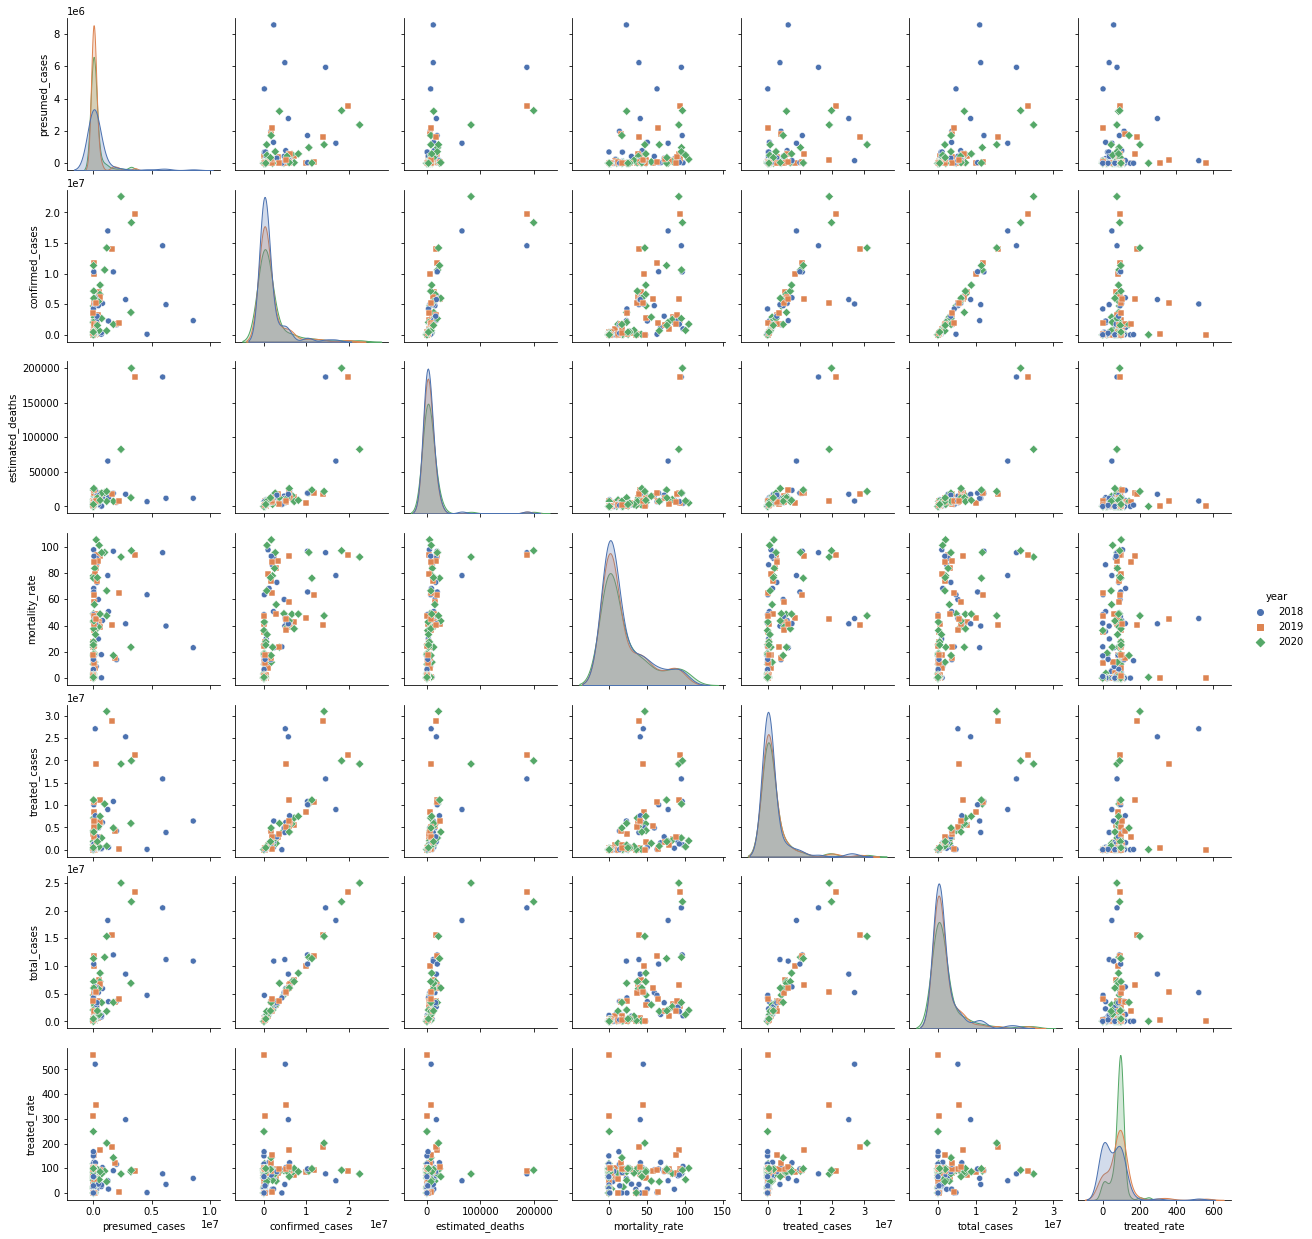

In [ ]:
sns.pairplot(df_filtered, hue='year', markers=["o", "s", "D"], palette="deep")

### 4.-Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.

Vemos que en la gran mayoría existen valores atípicos o un conjunto de valores atípicos, esto es debido a la naturaleza del caso que estamos analizando. La existencia de grupos o varios datos atípicos son señal de que existen diferencias radicales en como los países tratan a la enfermedad y también, dada la naturaleza de la Malaria, existen zonas donde es más propensa generarse o no. Dado que tenemos que cada caso particular tiene sus casos particulares, decidimos tratarlos como casos especiales. Dada la naturaleza del sistema, cabe resaltar que dentro de un país con cero casos siempre se puede estallar una pandemia, esto pues la variable *treated_cases* no nos puede brindar información de la eficación del país en tratarlo al no haber casos. 

Para esto podemos aproximarnos de dos formas diferentes:

  1. Dividir los datos por continente o región: 
    Dado a que la enfermedad es propiciada por factores tanto económicos como ambientales, separarlos por continente o zona climática resultaría en análisis más homogéneo ignorando facores caóticos dentro de la evolución de enfermedades. 

  2. Dividir los datos en la cantidad de casos: 
    Para ello vamos nos apoyaremos de la variable *total_cases* para crear n+1 grupos: el primero con casos nulos, y los otros n grupos divididos entre la mitad superior e inferior para cada cantidad de enfermedades; para estos n últimos crearemos una gráfica de densidad para verificar aprox. en que grupos de valores se divide y decidir apropiadamente cuántos grupos comenzar a tratar. Para este caso podríamos realizar un pronóstico en la evolución de los paises con un cierto número de casos y si estos subirán o bajarán. El problema con este caso es que demasiado sensible a posibles sucesos de naturaleza caótica y a que si un país sufrió un pequeño brote durante un año (o por cuestión de días) esto puede motidificar donde se encontraría el país. 

Dado que desconocemos hasta el momento las características de cada aproximación, y dando por hecho que lo más probable es que en cada uno se tenga pros y contras, haremos el mismo análisis para ambos. Para el primero tenemos 

In [32]:
# añadimos una columna continente para ver si hay alguna correlación entre el continente y las variables de interés
df['continent'] = coco.convert(names=df['country'], to='continent')

In [33]:
# creamos un dataframe para cada continente
continents = list(df['continent'].unique())
df_continents = []  
for i in continents:  
    df_continents.append(df[df['continent'] == i]) 
print(continents) # imprimimos los nombres de los continentes 

['Asia', 'Africa', 'America', 'Oceania']


In [34]:
# desempaquetamos los dataframes de cada continente para poder trabajar con ellos
df_asia = df_continents[0] 
df_africa = df_continents[1]  
df_america = df_continents[2]  
df_oceania = df_continents[3]  

Para el segundo hacemos una gráfica de densidad para ver donde existen grupos de datos concentrados y dividirlos en subgrupos 

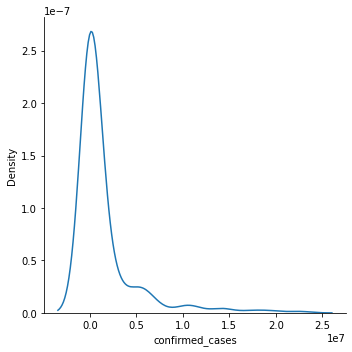

In [ ]:
# density plot para ver la distribución del número de casos confirmados 
sns.displot(df, x="confirmed_cases" ,kind="kde")  

Vemos que hay al rededor de tres grupos, para aquellos con casos confirmados $[0,5000000]$, $[5000000, 10000000]$ y $[10000000, max]$, por lo tanto creamos los dataframes 

In [35]:
df_1 = df[(df['confirmed_cases'] >= 0) & (df['confirmed_cases'] <= 1e7*0.5)]  
df_2 = df[(df['confirmed_cases'] > 1e7*0.5) & (df['confirmed_cases'] <= 1e7)]  
df_3 = df[df['confirmed_cases'] > 1e7] 

### 5.-Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.

Primero haremos las matrices de correlación y pairplots para la parte de continentes

In [ ]:
df_asia.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000       -0.158363        -0.056369         -0.027149   
presumed_cases   -0.158363        1.000000         0.370346          0.022566   
confirmed_cases  -0.056369        0.370346         1.000000          0.623992   
estimated_deaths -0.027149        0.022566         0.623992          1.000000   
mortality_rate   -0.115053        0.110070         0.238105          0.229589   
treated_cases     0.071777        0.376471         0.849508          0.376608   
total_cases      -0.119413        0.764048         0.882246          0.444828   
treated_rate      0.234352       -0.086102        -0.027340         -0.039685   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                   -0.115053       0.071777    -0.119413      0.234352  
presumed_cases          0.110070       0.376471     0.764048     -0.086102  
confirmed_cases         0.238105       0.849508     0.882246     -0.027340  
estimated_deaths        0.229589       0.376608     0.444828     -0.039685  
mortality_rate          1.000000      -0.009493     0.221161     -0.146946  
treated_cases          -0.009493       1.000000     0.780827      0.095227  
total_cases             0.221161       0.780827     1.000000     -0.062628  
treated_rate           -0.146946       0.095227    -0.062628      1.000000

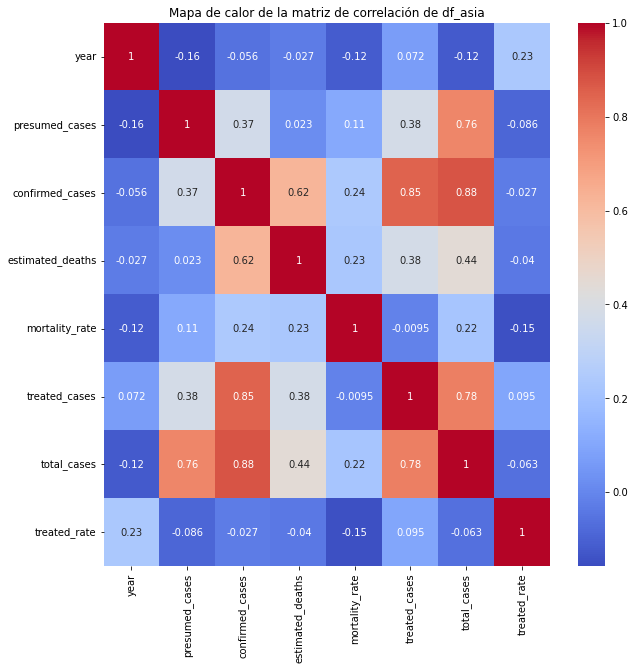

In [91]:
htmap(df_asia, 'df_asia')

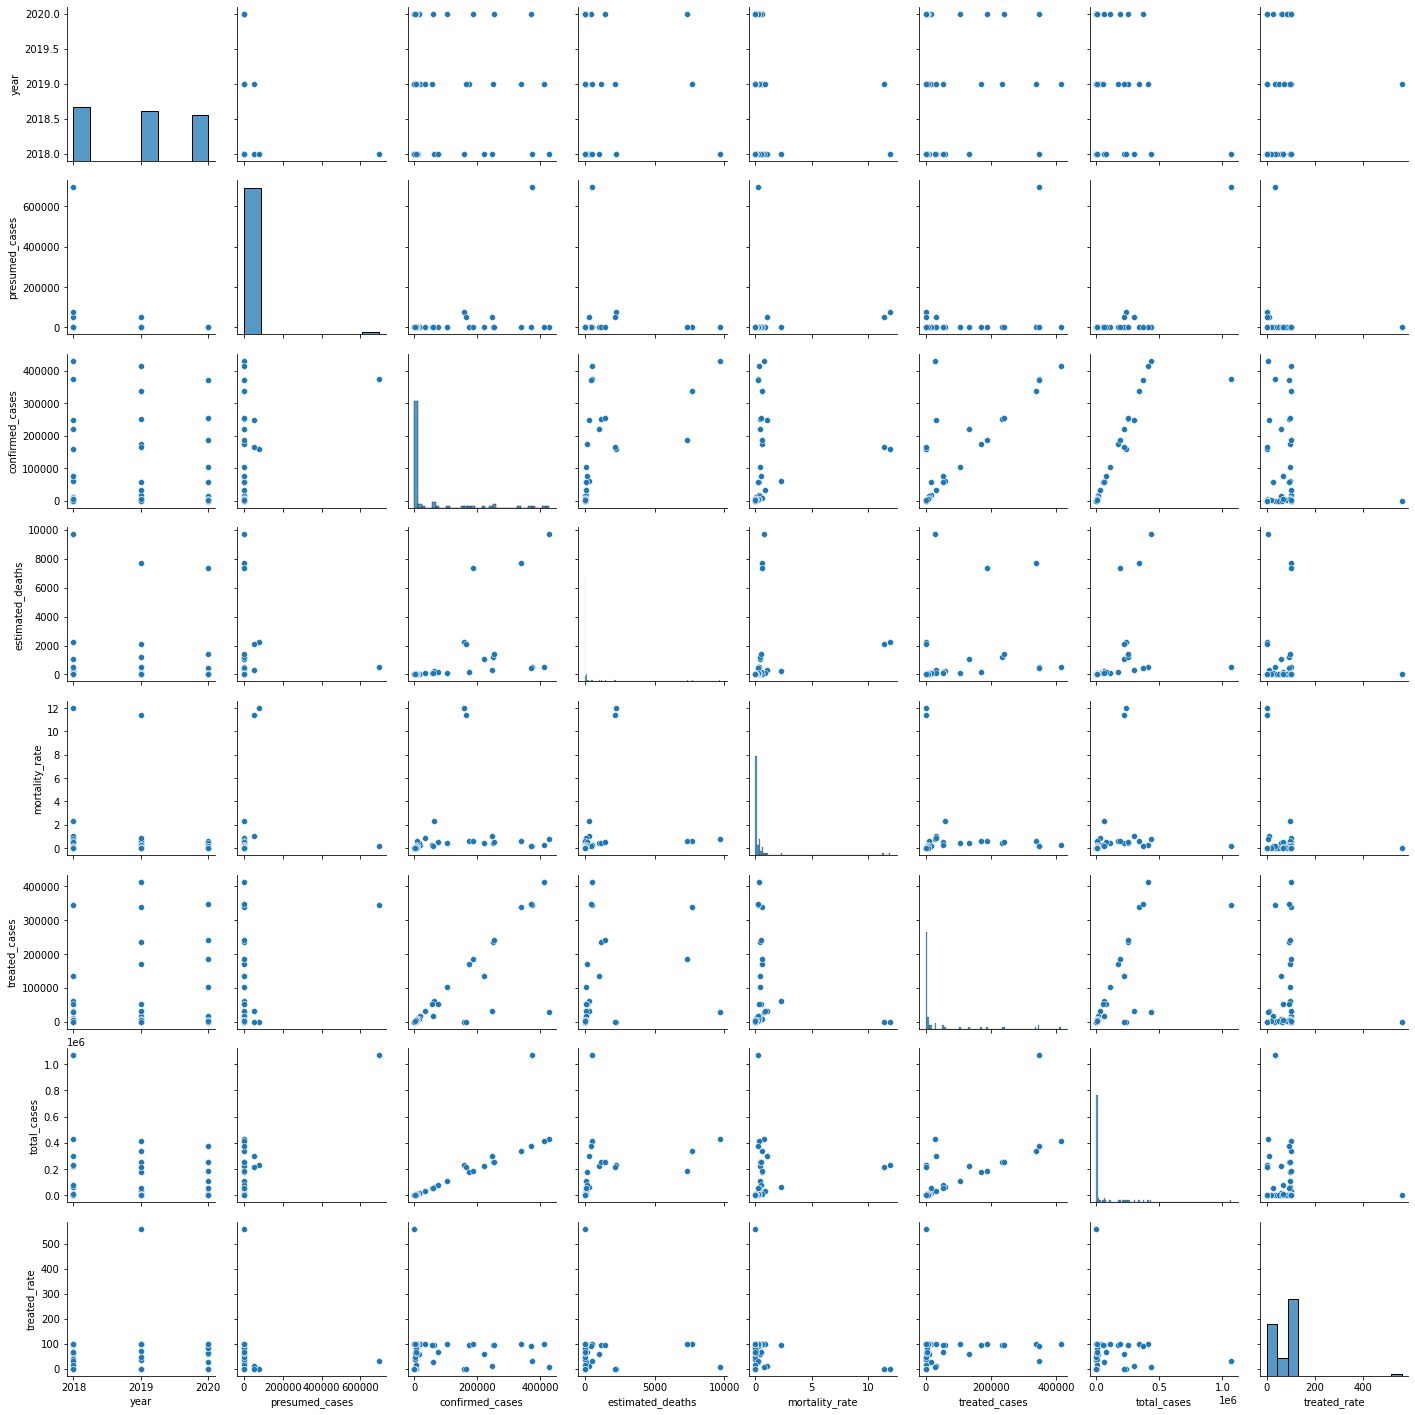

In [ ]:
sns.pairplot(df_asia) 

In [ ]:
df_africa.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000       -0.147594         0.081918          0.027425   
presumed_cases   -0.147594        1.000000         0.381120          0.502131   
confirmed_cases   0.081918        0.381120         1.000000          0.731174   
estimated_deaths  0.027425        0.502131         0.731174          1.000000   
mortality_rate    0.043039        0.221557         0.514932          0.442660   
treated_cases     0.026770        0.376575         0.806812          0.535587   
total_cases       0.034399        0.586821         0.972253          0.767430   
treated_rate      0.061627       -0.044002         0.167545          0.017011   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                    0.043039       0.026770     0.034399      0.061627  
presumed_cases          0.221557       0.376575     0.586821     -0.044002  
confirmed_cases         0.514932       0.806812     0.972253      0.167545  
estimated_deaths        0.442660       0.535587     0.767430      0.017011  
mortality_rate          1.000000       0.362624     0.507048     -0.001008  
treated_cases           0.362624       1.000000     0.801905      0.581075  
total_cases             0.507048       0.801905     1.000000      0.135605  
treated_rate           -0.001008       0.581075     0.135605      1.000000

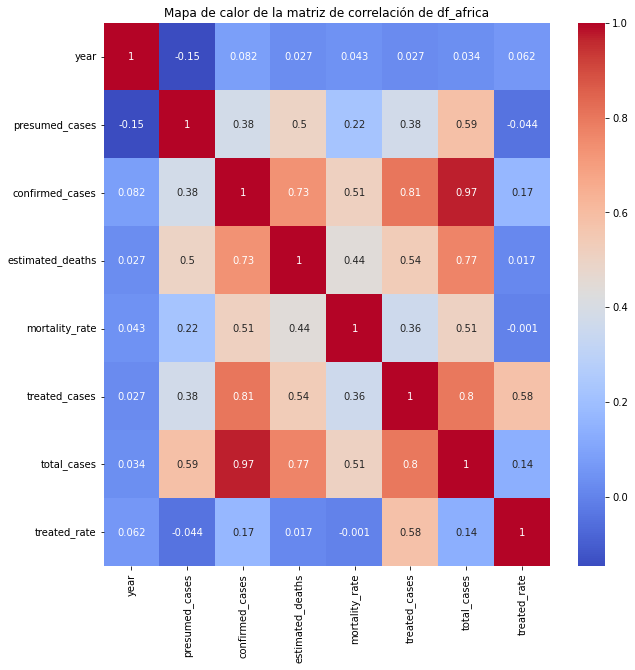

In [92]:
htmap(df_africa, 'df_africa')

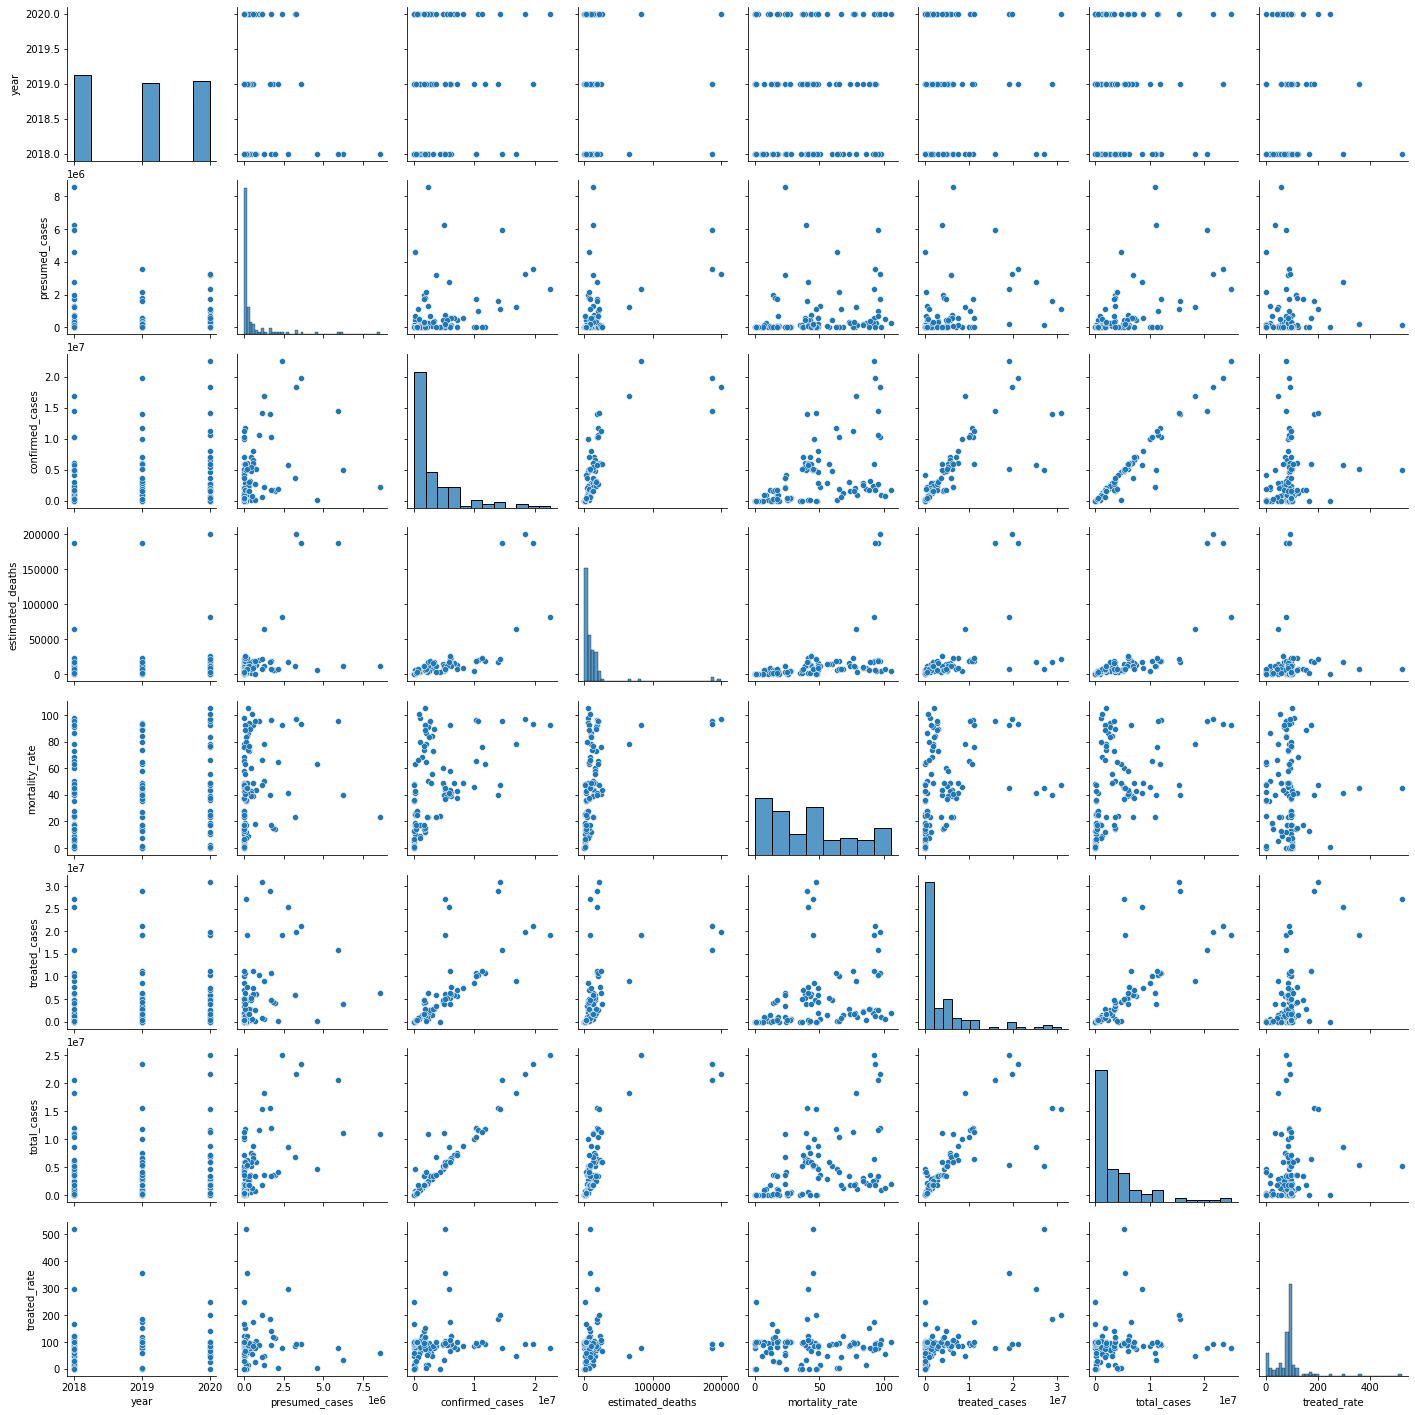

In [ ]:
sns.pairplot(df_africa)

In [ ]:
df_america.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000        0.174964        -0.034712         -0.025530   
presumed_cases    0.174964        1.000000        -0.019058         -0.048833   
confirmed_cases  -0.034712       -0.019058         1.000000          0.943056   
estimated_deaths -0.025530       -0.048833         0.943056          1.000000   
mortality_rate   -0.008450       -0.052666         0.399417          0.509779   
treated_cases     0.045567       -0.011325         0.844445          0.763565   
total_cases      -0.033325       -0.011108         0.999968          0.942781   
treated_rate      0.253697        0.045471         0.161838          0.110767   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                   -0.008450       0.045567    -0.033325      0.253697  
presumed_cases         -0.052666      -0.011325    -0.011108      0.045471  
confirmed_cases         0.399417       0.844445     0.999968      0.161838  
estimated_deaths        0.509779       0.763565     0.942781      0.110767  
mortality_rate          1.000000       0.302771     0.399046     -0.001035  
treated_cases           0.302771       1.000000     0.844456      0.477774  
total_cases             0.399046       0.844456     1.000000      0.162219  
treated_rate           -0.001035       0.477774     0.162219      1.000000

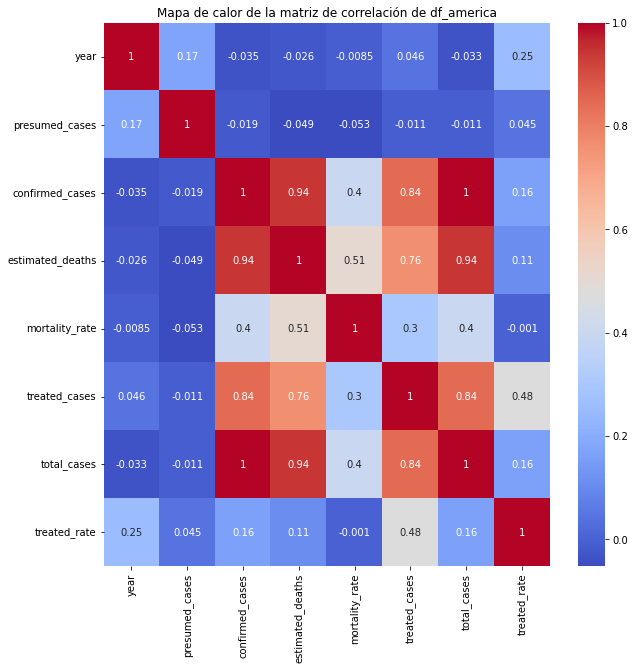

In [93]:
htmap(df_america, 'df_america')

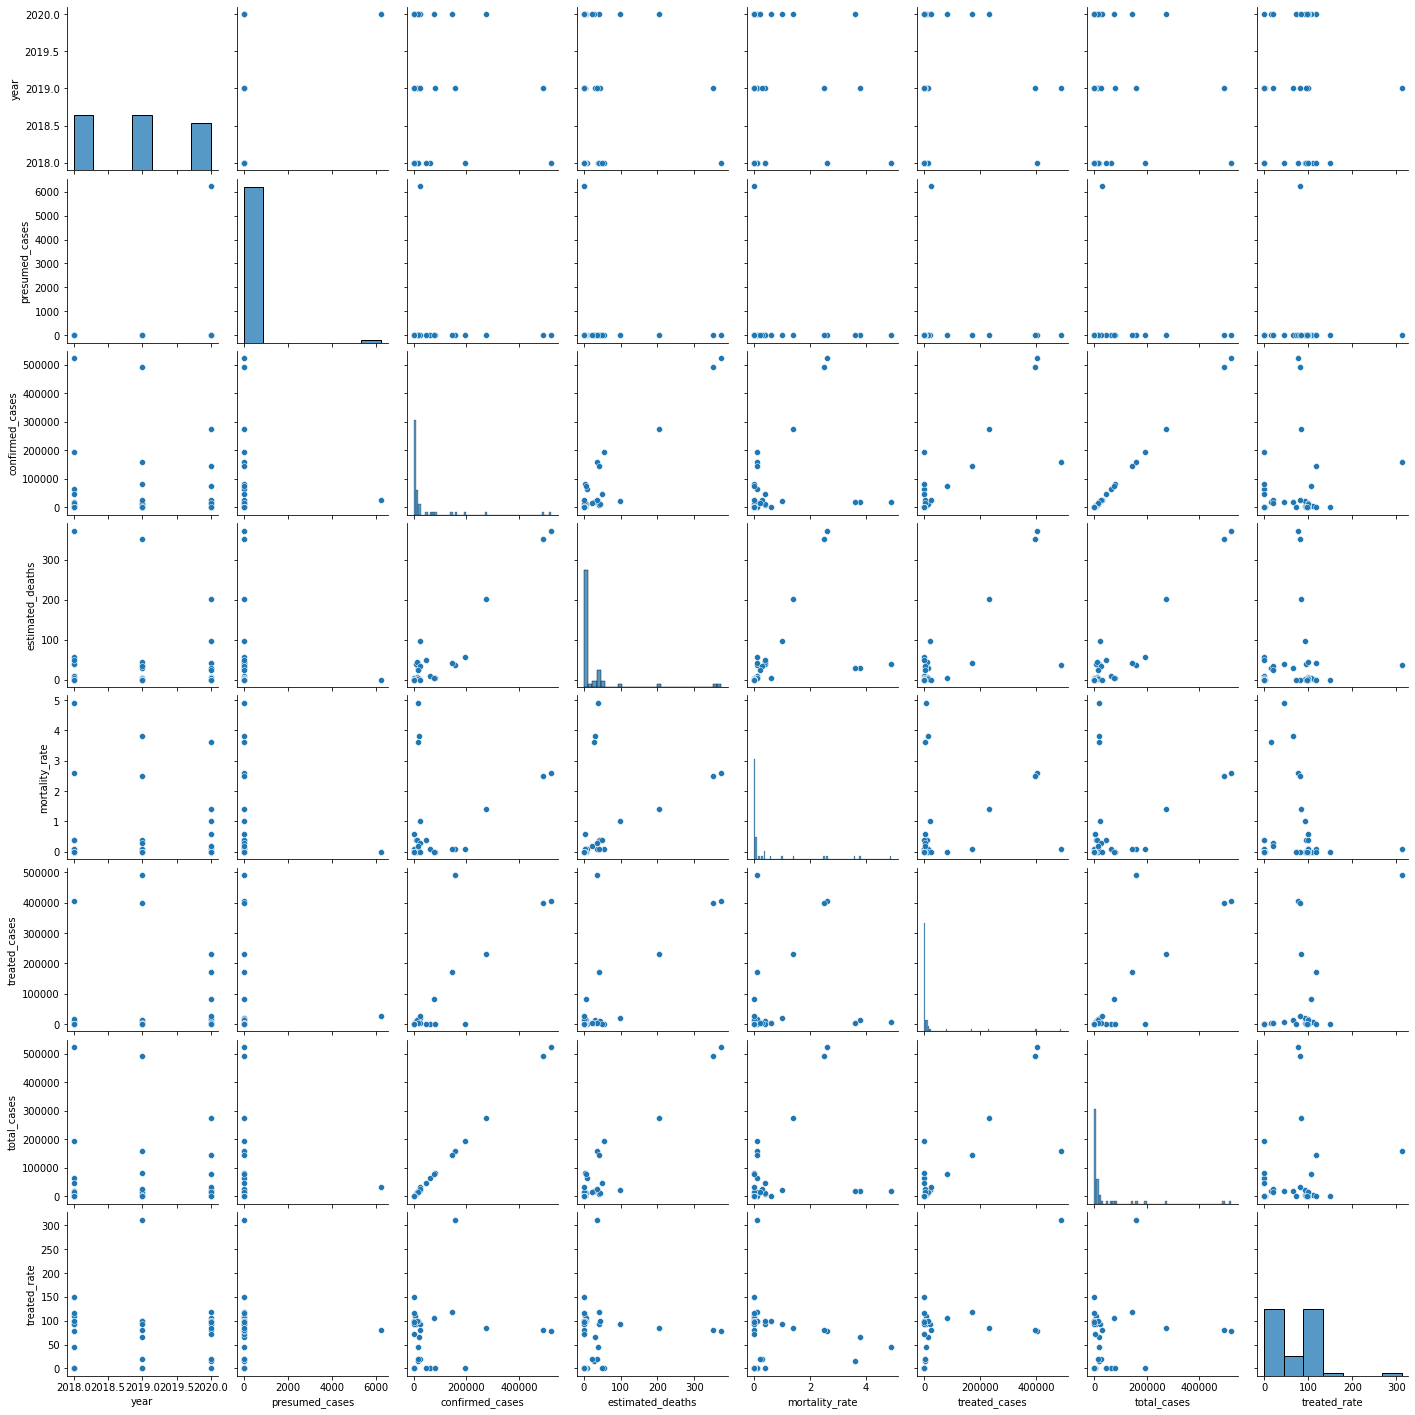

In [ ]:
sns.pairplot(df_america)

In [ ]:
df_oceania.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000       -0.245418         0.136289          0.051054   
presumed_cases   -0.245418        1.000000         0.787835          0.865614   
confirmed_cases   0.136289        0.787835         1.000000          0.988569   
estimated_deaths  0.051054        0.865614         0.988569          1.000000   
mortality_rate    0.051663        0.656290         0.793753          0.762087   
treated_cases     0.290886        0.639799         0.974641          0.935184   
total_cases       0.003910        0.906209         0.974359          0.994926   
treated_rate      0.573777       -0.414542        -0.245404         -0.275574   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                    0.051663       0.290886     0.003910      0.573777  
presumed_cases          0.656290       0.639799     0.906209     -0.414542  
confirmed_cases         0.793753       0.974641     0.974359     -0.245404  
estimated_deaths        0.762087       0.935184     0.994926     -0.275574  
mortality_rate          1.000000       0.754154     0.784705     -0.394073  
treated_cases           0.754154       1.000000     0.902867     -0.090957  
total_cases             0.784705       0.902867     1.000000     -0.319924  
treated_rate           -0.394073      -0.090957    -0.319924      1.000000

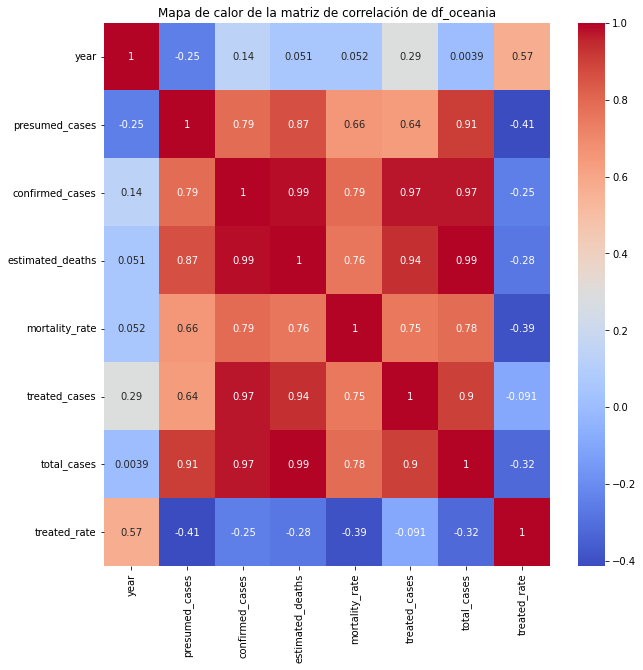

In [94]:
htmap(df_oceania, 'df_oceania')

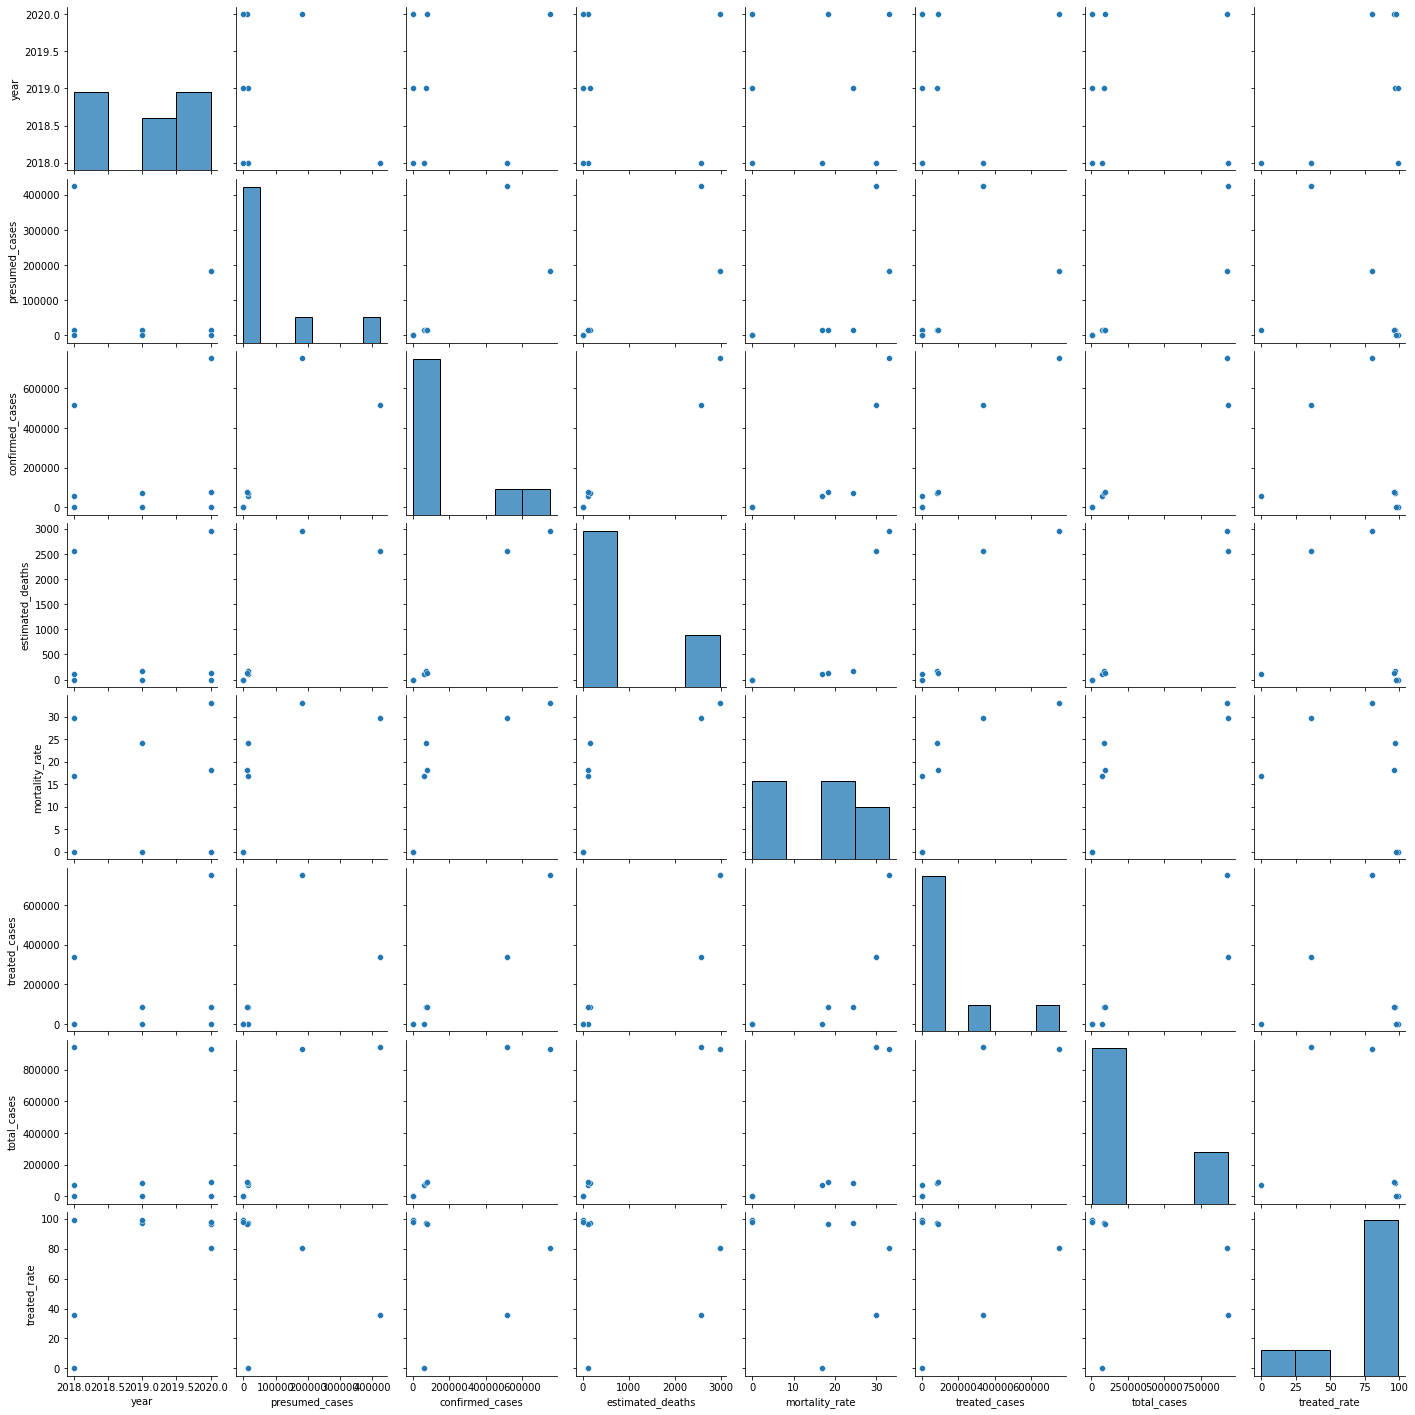

In [ ]:
sns.pairplot(df_oceania)

Ahora haremos para el caso de grupos de valores 

In [ ]:
#grupo 1
df_1.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000       -0.103483        -0.026955         -0.003222   
presumed_cases   -0.103483        1.000000         0.399628          0.421821   
confirmed_cases  -0.026955        0.399628         1.000000          0.792177   
estimated_deaths -0.003222        0.421821         0.792177          1.000000   
mortality_rate    0.009601        0.225740         0.653234          0.766863   
treated_cases     0.008444        0.576309         0.842263          0.715699   
total_cases      -0.073769        0.803272         0.866995          0.744026   
treated_rate      0.252816       -0.053313         0.043169          0.030562   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                    0.009601       0.008444    -0.073769      0.252816  
presumed_cases          0.225740       0.576309     0.803272     -0.053313  
confirmed_cases         0.653234       0.842263     0.866995      0.043169  
estimated_deaths        0.766863       0.715699     0.744026      0.030562  
mortality_rate          1.000000       0.531208     0.547155      0.011574  
treated_cases           0.531208       1.000000     0.860550      0.141887  
total_cases             0.547155       0.860550     1.000000     -0.000933  
treated_rate            0.011574       0.141887    -0.000933      1.000000

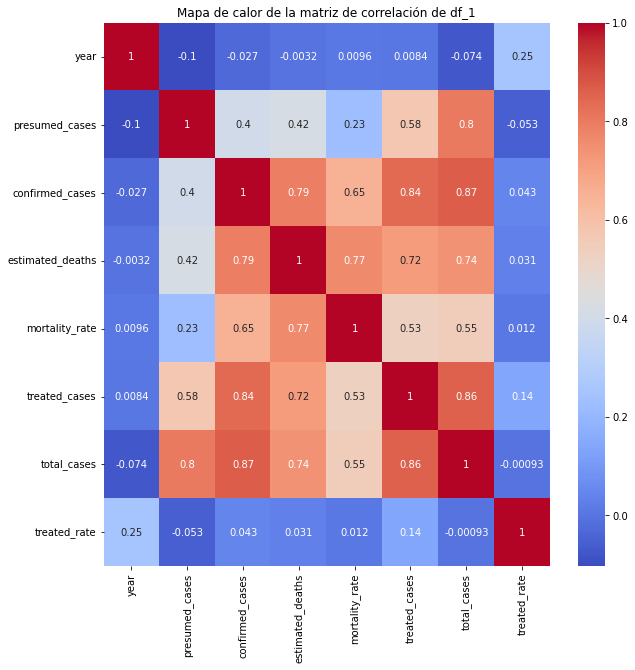

In [95]:
htmap(df_1, 'df_1')

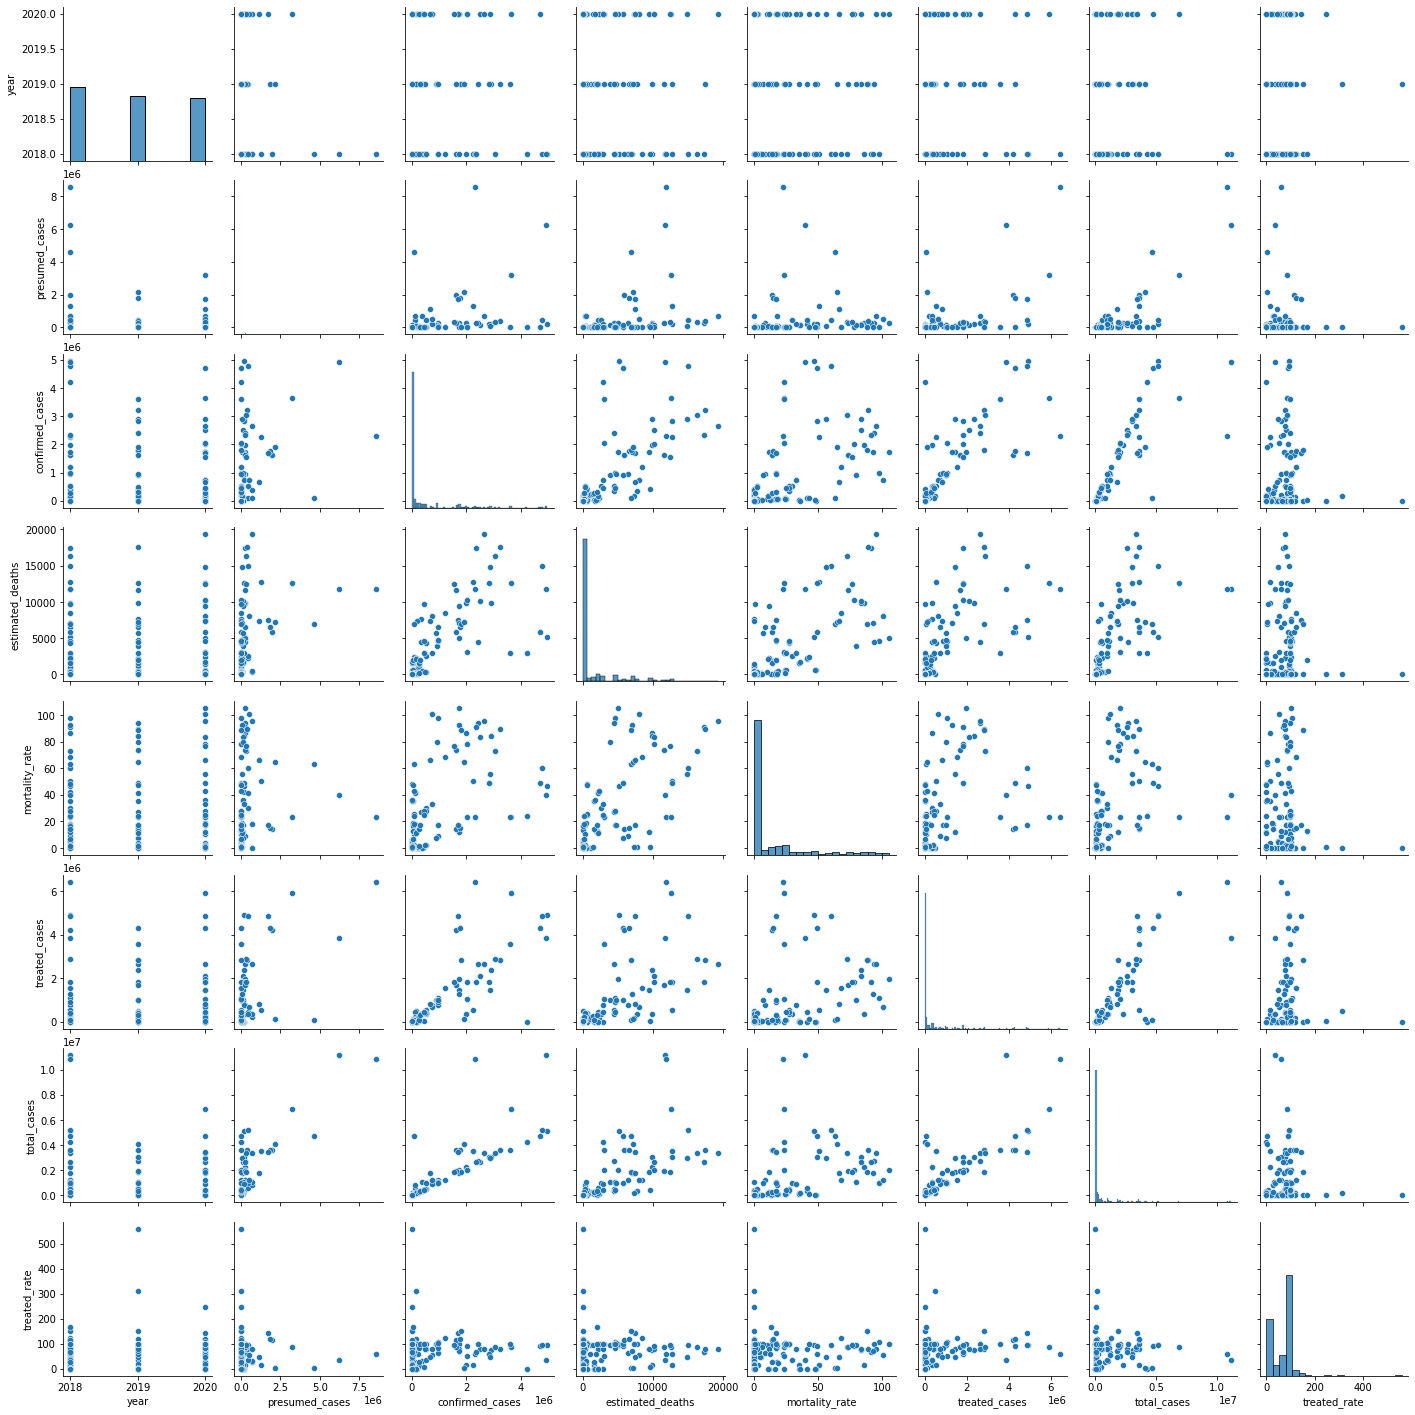

In [ ]:
#grupo 1
sns.pairplot(df_1)

In [ ]:
#grupo 2
df_2.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000       -0.343020         0.334264         -0.079834   
presumed_cases   -0.343020        1.000000        -0.130732          0.145768   
confirmed_cases   0.334264       -0.130732         1.000000         -0.278537   
estimated_deaths -0.079834        0.145768        -0.278537          1.000000   
mortality_rate   -0.007390        0.016192         0.002170          0.194260   
treated_cases    -0.539512        0.486583        -0.264419         -0.190894   
total_cases       0.146869        0.364375         0.875624         -0.190619   
treated_rate     -0.516350        0.231572        -0.407615         -0.223452   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                   -0.007390      -0.539512     0.146869     -0.516350  
presumed_cases          0.016192       0.486583     0.364375      0.231572  
confirmed_cases         0.002170      -0.264419     0.875624     -0.407615  
estimated_deaths        0.194260      -0.190894    -0.190619     -0.223452  
mortality_rate          1.000000       0.060926     0.009927      0.057741  
treated_cases           0.060926       1.000000    -0.011322      0.946289  
total_cases             0.009927      -0.011322     1.000000     -0.270063  
treated_rate            0.057741       0.946289    -0.270063      1.000000

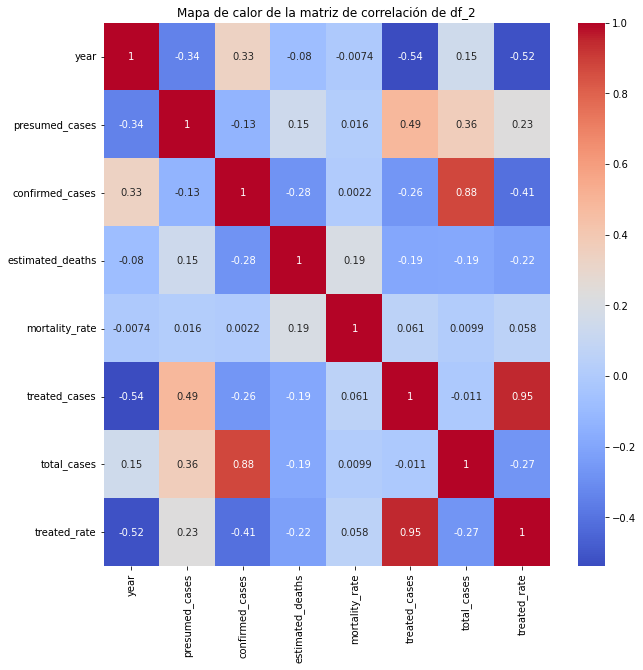

In [96]:
htmap(df_2, 'df_2')

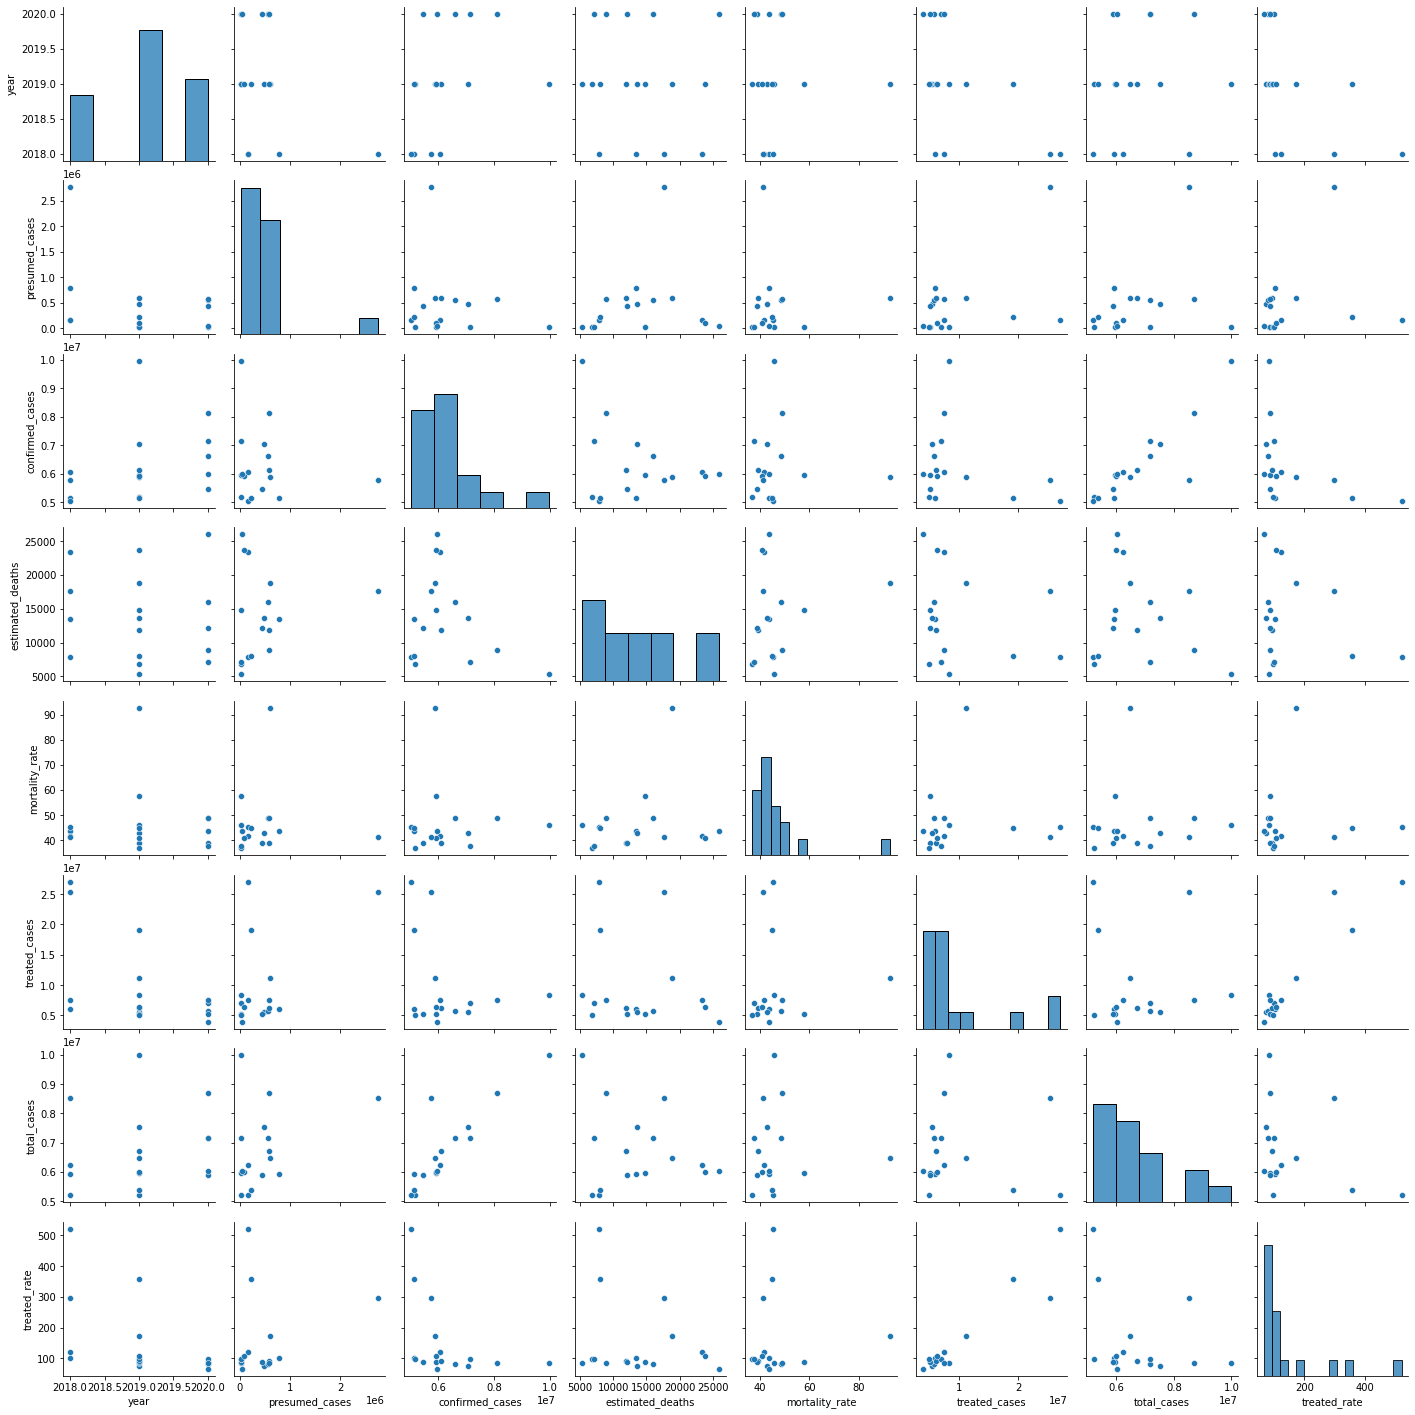

In [ ]:
#grupo 2
sns.pairplot(df_2)

In [ ]:
# grupo 3
df_3.corr()

year  presumed_cases  confirmed_cases  estimated_deaths  \
year              1.000000       -0.173068         0.256728         -0.020388   
presumed_cases   -0.173068        1.000000         0.513200          0.859525   
confirmed_cases   0.256728        0.513200         1.000000          0.643561   
estimated_deaths -0.020388        0.859525         0.643561          1.000000   
mortality_rate   -0.028636        0.507306         0.275666          0.573515   
treated_cases     0.388142        0.283936         0.408093          0.178336   
total_cases       0.143413        0.738886         0.957524          0.794037   
treated_rate      0.319777       -0.182855        -0.171446         -0.341738   

                  mortality_rate  treated_cases  total_cases  treated_rate  
year                   -0.028636       0.388142     0.143413      0.319777  
presumed_cases          0.507306       0.283936     0.738886     -0.182855  
confirmed_cases         0.275666       0.408093     0.957524     -0.171446  
estimated_deaths        0.573515       0.178336     0.794037     -0.341738  
mortality_rate          1.000000      -0.465238     0.386866     -0.769769  
treated_cases          -0.465238       1.000000     0.415790      0.808816  
total_cases             0.386866       0.415790     1.000000     -0.196037  
treated_rate           -0.769769       0.808816    -0.196037      1.000000

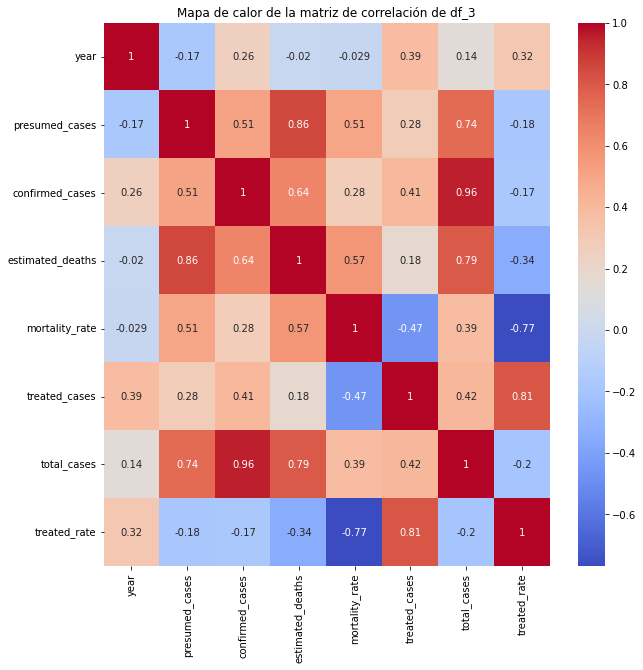

In [97]:
htmap(df_3, 'df_3')

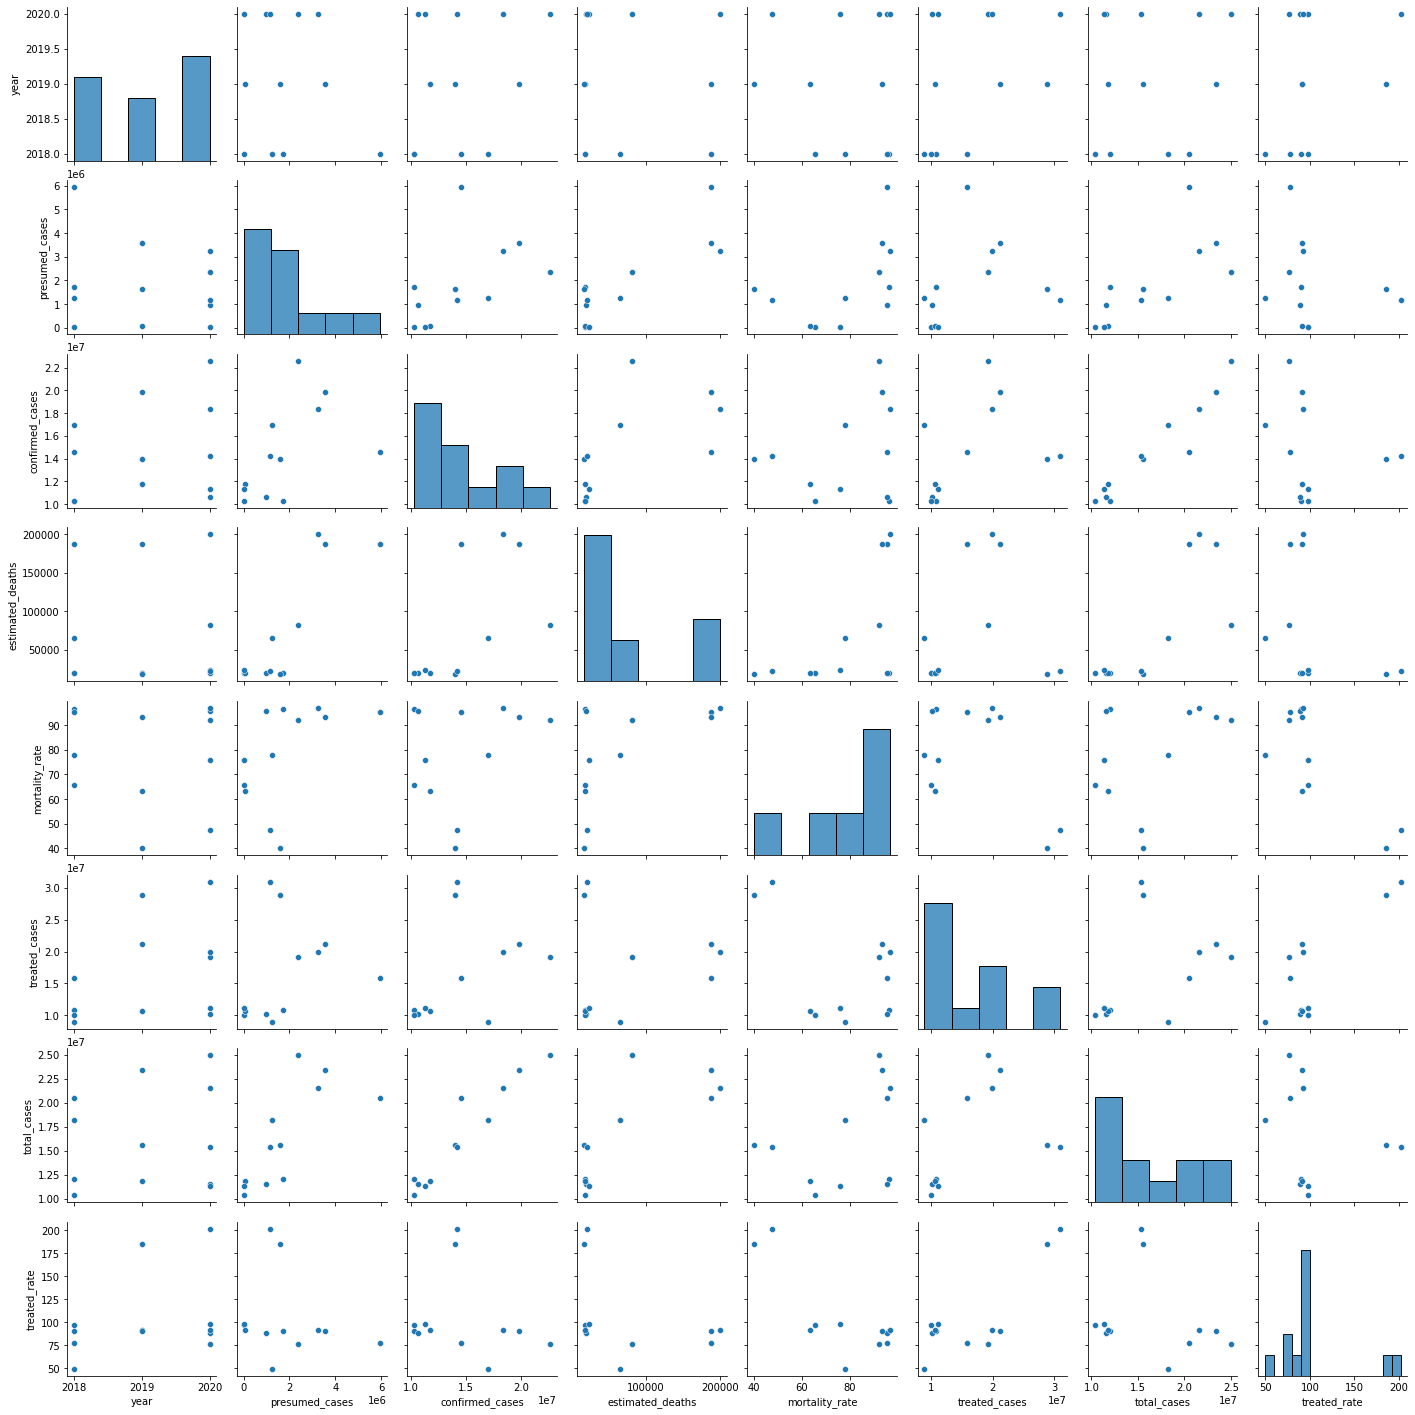

In [ ]:
#grupo 3
sns.pairplot(df_3)

Notamos que no existen suficientes datos para Oceanía para realizar un análisis decente. Asimismo notamos que aquellas variables para el continente América presentan mayor correlación entre sí, mientras que para Asia y África hay menor correlación. También notamos una alta correlación entre *confirmed_cases* y *total_cases* en *df_3* y América lo que nos marca que un posible sistema de diagnóstico mejor desarrollado. Por último, notamos que en *df_1* y América existe una fuerte correlación entre *estimated_deaths* y *treated_cases* indicando también una respuesta diferente del sector de salud que en otros continentes.

Como se comentó al inicio, notamos que existen df con fuertes correlaciones y otros con bajas correlaciones, para los Continentes, Asia y África solo  se tiene dos pares de variables con correlación fuerte, mientras que en América se tienen 4 pares fuertemente correlacionados. Mientras que para los grupos dividos por número de casos, se tienen dos con 4 pares de variables relativamente fuertes (el grupo de casos inferior y el superior) mientras que el grupo intermedio solamente tiene un par. 

### 6.-Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

Crearemos varios modelos de regresión lineal simple para cada dataframe, no necesariamente con la finalidad de crear un modelo, sino la de determinar qué porcentaje de los datos se comporta linealmente y así tener una cantidad de estimación esperada en la evolución. Es decir, si tenemos un modelo con un $r^{2} \approx 0.3$ podemos esperar que alrededor de 30% de los datos cambien de forma similar en dirección de la pendiente del modelo lineal simple. 

Para ello creamos una función que nos haga más sencillo el cálculo. 

In [ ]:
# inicializamos el modelo de regresión linear simple
lr = LinearRegression()

In [ ]:
# creamos una función para generar una regresión lineal simple
def regresion_lineal(df, x, y):
    lr = LinearRegression()
    lr.fit(df[[x]], df[y])
    y_pred = lr.predict(df[[x]])
    r2 = lr.score(df[[x]], df[y]) # R^2
    return lr.coef_[0], lr.intercept_, r2

Crearemos un modelo para cada par de variables con una correlación fuerte

In [ ]:
# Asia 
print('Asia')
print(f"Confirmed_cases - estimated_deaths: {regresion_lineal(df_asia, 'confirmed_cases', 'estimated_deaths')}")
print(f"Confirmed_cases - treated_cases: {regresion_lineal(df_asia, 'confirmed_cases', 'treated_cases')}")


Asia
Confirmed_cases - estimated_deaths: (0.009369319805224085, -37.87726378189501, 0.38936625705718664)
Confirmed_cases - treated_cases: (0.7085041444651555, -157.53594922684715, 0.721663053861637)


In [ ]:
# Africa 
print('Africa')
print(f"Confirmed_cases - estimated_deaths: {regresion_lineal(df_africa, 'confirmed_cases', 'estimated_deaths')}")
print(f"Confirmed_cases - treated_cases: {regresion_lineal(df_africa, 'confirmed_cases', 'treated_cases')}")

Africa
Confirmed_cases - estimated_deaths: (0.004939926774618659, -3054.354621943785, 0.534615874463264)
Confirmed_cases - treated_cases: (1.1263322197736614, 273302.1323958235, 0.6509454867412139)


In [ ]:
# America
print('America')
print(f"Confirmed_cases - estimated_deaths: {regresion_lineal(df_america, 'confirmed_cases', 'estimated_deaths')}")
print(f"Confirmed_cases - treated_cases: {regresion_lineal(df_america, 'confirmed_cases', 'treated_cases')}")
print(f"Confirmed_cases - total_cases: {regresion_lineal(df_america, 'confirmed_cases', 'total_cases')}")
print(f"Estimated_deaths - treated_cases: {regresion_lineal(df_america, 'estimated_deaths', 'treated_cases')}")
print(f"Estimated_deaths - total_cases: {regresion_lineal(df_america, 'estimated_deaths', 'total_cases')}")

America
Confirmed_cases - estimated_deaths: (0.0006550156532079924, -0.21397043462159715, 0.8893544091080292)
Confirmed_cases - treated_cases: (0.8342613394204393, 603.3301363499049, 0.7130872714226579)
Confirmed_cases - total_cases: (0.9998484721757845, 115.44348668197199, 0.9999367899165728)
Estimated_deaths - treated_cases: (1086.0824053850527, 5775.671901432568, 0.5830321434700181)
Estimated_deaths - total_cases: (1357.2015313691422, 4863.296838444687, 0.8888354131543282)


In [ ]:
# df_1 
print('df_1')
print(f"Confirmed_cases - estimated_deaths: {regresion_lineal(df_1, 'confirmed_cases', 'estimated_deaths')}")
print(f"Confirmed_cases - treated_cases: {regresion_lineal(df_1, 'confirmed_cases', 'treated_cases')}")
print(f"Estimated_deaths - treated_cases: {regresion_lineal(df_1, 'estimated_deaths', 'treated_cases')}")
print(f"treated_cases - total_cases: {regresion_lineal(df_1, 'treated_cases', 'total_cases')}")

df_1
Confirmed_cases - estimated_deaths: (0.003130115771307344, 561.2969025231155, 0.6275444850581718)
Confirmed_cases - treated_cases: (0.9285028472637715, 23239.94447766157, 0.7094063544221336)
Estimated_deaths - treated_cases: (199.6769956082663, 49413.9942602464, 0.5122252062011028)
treated_cases - total_cases: (1.2014156187482266, 103865.73145953787, 0.7405466973032517)


In [ ]:
# df_2
print('df_2')
print(f"confirmed_cases - total_cases: {regresion_lineal(df_2, 'confirmed_cases', 'total_cases')}")

df_2
confirmed_cases - total_cases: (0.9321960185928659, 867175.1680767387, 0.7667180022144138)


In [ ]:
# df_3 
print('df_3')
print(f"Estimated_deaths - presumed_cases: {regresion_lineal(df_3, 'estimated_deaths', 'presumed_cases')}")
print(f"Estimated_deaths - confirmed_cases: {regresion_lineal(df_3, 'estimated_deaths', 'confirmed_cases')}")
print(f"Confirmed_cases - total_cases: {regresion_lineal(df_3, 'confirmed_cases', 'total_cases')}")
print(f"treated_cases - treated_rate: {regresion_lineal(df_3, 'treated_cases', 'treated_rate')}")

df_3
Estimated_deaths - presumed_cases: (20.009768596783235, 385631.9625703322, 0.7387823981843765)
Estimated_deaths - confirmed_cases: (35.01072261019578, 12037353.110022344, 0.4141713887180607)
Confirmed_cases - total_cases: (1.2196137163251703, -1371944.7339784727, 0.9168528359619399)
treated_cases - treated_rate: (4.710337219085749e-06, 25.536254082904406, 0.6541840795175564)


Vemos que las $r^{2}$ son mayores dentro del grupo de países de América, después le siguen para $df_1$ y $df_3$. Justamente lo que se había discutido anteriormente con las correlaciones. 

##Distribuciones y técnicas de evaluación de modelos

### 1.-Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.

Primero quitaremos la columna *years* pues los siguientes estadísticos no nos aportará mucha ayuda con esta columna. 

In [36]:
# quitamos la columna year pues no nos brinda datos relevantes 
df_america_mod = df_america.drop(columns = ['country','year','continent'])
df_asia_mod = df_asia.drop(columns = ['country','year','continent'])
df_africa_mod = df_africa.drop(columns = ['country','year','continent'])

df_1_mod = df_1.drop(columns = ['country','year','continent'])
df_2_mod = df_2.drop(columns = ['country','year','continent'])
df_3_mod = df_3.drop(columns = ['country','year','continent'])

In [ ]:
def estadisticos(df, name, trim = 0.1):
  '''Esta función genera los estadísticos de un dataframe. Recibe
  df: el dataframe 
  name: el nombre del dataframe
  trim: la cantidad a truncar 
  '''

  print(f"Media de {name}: {df.mean()}")  # media de los datos de america
  print(f"\nMediaba de {name}:\n {df.median()}") # mediana de los datos de america
  print(f"\nMedia truncada de {name}:\n {stats.trim_mean(df, trim)}") # media truncada 10% de los datos de america
  print(f"\nDesviación estándar de {name}:\n {df.std()}") # desviación estándar de los datos de america
  print(f"\nRango de {name}:\n {df.max() - df.min()}") # rango de los datos de america
  print(f"\nPrimer cuartil de {name}:\n {df.quantile(0.25)}") # primer cuartil de los datos de america
  print(f"\nSegundo cuartil de {name}:\n {df.quantile(0.5)}") # segundo cuartil (mediana) de los datos de america
  print(f"\nTercer cuartil de {name}:\n {df.quantile(0.75)}") # tercer cuartil de los datos de america
  print(f"\nCuarto cuartil de {name}:\n {df.quantile(1)}") # cuarto cuartil (máximo) de los datos de america
  print(f"\nRango intercuartílico de {name}:\n {df.quantile(0.75) - df.quantile(0.25)}")


In [ ]:
estadisticos(df_america_mod, 'df_america')

Media de df_america: presumed_cases        109.350877
confirmed_cases     40207.859649
estimated_deaths       26.122807
mortality_rate          0.401754
treated_cases       34147.192982
total_cases         40317.210526
treated_rate           60.471579
dtype: float64

Mediaba de df_america:
 presumed_cases         0.00
confirmed_cases     1909.00
estimated_deaths       0.00
mortality_rate         0.00
treated_cases        651.00
total_cases         1909.00
treated_rate          80.38
dtype: float64

Media truncada de df_america:
 [0.00000000e+00 1.38698085e+04 8.70212766e+00 1.17021277e-01
 5.28987234e+03 1.40024255e+04 5.61461702e+01]

Desviación estándar de df_america:
 presumed_cases         825.581018
confirmed_cases     103834.032744
estimated_deaths        72.119710
mortality_rate           1.028433
treated_cases       102581.843098
total_cases         103821.580336
treated_rate            59.027034
dtype: float64

Rango de df_america:
 presumed_cases        6233.00
confirmed_case

In [ ]:
estadisticos(df_asia_mod, 'df_asia')

Media de df_asia: presumed_cases      11732.053333
confirmed_cases     55108.653333
estimated_deaths      478.453333
mortality_rate          0.480000
treated_cases       38887.173333
total_cases         66840.706667
treated_rate           68.752267
dtype: float64

Mediaba de df_asia:
 presumed_cases         0.00
confirmed_cases     3498.00
estimated_deaths       0.00
mortality_rate         0.00
treated_cases       1869.00
total_cases         3498.00
treated_rate          93.51
dtype: float64

Media truncada de df_asia:
 [5.02295082e+01 2.78712295e+04 6.88852459e+01 1.14754098e-01
 1.32680656e+04 3.00934426e+04 6.55168852e+01]

Desviación estándar de df_asia:
 presumed_cases       80785.318758
confirmed_cases     110706.752821
estimated_deaths      1662.275559
mortality_rate           1.901635
treated_cases        92331.368307
total_cases         159394.512757
treated_rate            71.759866
dtype: float64

Rango de df_asia:
 presumed_cases       694542.00
confirmed_cases      429928.

In [ ]:
estadisticos(df_africa_mod, 'df_africa')

Media de df_africa: presumed_cases      6.012471e+05
confirmed_cases     3.246895e+06
estimated_deaths    1.298507e+04
mortality_rate      4.075086e+01
treated_cases       3.930385e+06
total_cases         3.848142e+06
treated_rate        8.984095e+01
dtype: float64

Mediaba de df_africa:
 presumed_cases        87180.50
confirmed_cases     1635273.00
estimated_deaths       5765.00
mortality_rate           39.30
treated_cases       1030669.00
total_cases         1869247.50
treated_rate             91.15
dtype: float64

Media truncada de df_africa:
 [2.67205723e+05 2.25798100e+06 6.86813830e+03 3.89755319e+01
 2.40508773e+06 2.76766982e+06 8.34728723e+01]

Desviación estándar de df_africa:
 presumed_cases      1.337040e+06
confirmed_cases     4.627933e+06
estimated_deaths    3.126703e+04
mortality_rate      3.181533e+01
treated_cases       6.460725e+06
total_cases         5.284125e+06
treated_rate        6.661006e+01
dtype: float64

Rango de df_africa:
 presumed_cases       8557644.00
con

In [ ]:
estadisticos(df_1_mod, 'df_1')

Media de df_1: presumed_cases      184409.537445
confirmed_cases     455539.867841
estimated_deaths      1987.189427
mortality_rate          14.003524
treated_cases       446210.008811
total_cases         639949.405286
treated_rate            69.855154
dtype: float64

Mediaba de df_1:
 presumed_cases          0.00
confirmed_cases     13226.00
estimated_deaths       30.00
mortality_rate          0.20
treated_cases        4724.00
total_cases         13636.00
treated_rate           90.64
dtype: float64

Media truncada de df_1:
 [2.00864918e+04 1.92308033e+05 9.91786885e+02 7.47595628e+00
 1.45142492e+05 2.50161273e+05 6.83030055e+01]

Desviación estándar de df_1:
 presumed_cases      8.332680e+05
confirmed_cases     9.959607e+05
estimated_deaths    3.935323e+03
mortality_rate      2.581475e+01
treated_cases       1.097938e+06
total_cases         1.532833e+06
treated_rate        5.785239e+01
dtype: float64

Rango de df_1:
 presumed_cases       8557644.00
confirmed_cases      4966511.00
est

In [ ]:
estadisticos(df_2_mod, 'df_2')

Media de df_2: presumed_cases      4.425003e+05
confirmed_cases     6.263273e+06
estimated_deaths    1.385612e+04
mortality_rate      4.644118e+01
treated_cases       9.574564e+06
total_cases         6.705774e+06
treated_rate        1.491112e+02
dtype: float64

Mediaba de df_2:
 presumed_cases       212670.00
confirmed_cases     5935178.00
estimated_deaths      13489.00
mortality_rate           43.50
treated_cases       6385075.00
total_cases         6219125.00
treated_rate             97.77
dtype: float64

Media truncada de df_2:
 [3.16246467e+05 6.09842907e+06 1.36198667e+04 4.40066667e+01
 8.78168540e+06 6.58790580e+06 1.29856667e+02]

Desviación estándar de df_2:
 presumed_cases      6.510507e+05
confirmed_cases     1.255282e+06
estimated_deaths    6.366460e+03
mortality_rate      1.291109e+01
treated_cases       7.144596e+06
total_cases         1.336383e+06
treated_rate        1.249678e+02
dtype: float64

Rango de df_2:
 presumed_cases       2748492.00
confirmed_cases      4919854

In [ ]:
estadisticos(df_3_mod, 'df_3')

Media de df_3: presumed_cases      1.824523e+06
confirmed_cases     1.455495e+07
estimated_deaths    7.190942e+04
mortality_rate      7.833333e+01
treated_cases       1.649926e+07
total_cases         1.637948e+07
treated_rate        1.032533e+02
dtype: float64

Mediaba de df_3:
 presumed_cases      1.423332e+06
confirmed_cases     1.408951e+07
estimated_deaths    2.273250e+04
mortality_rate      8.505000e+01
treated_cases       1.349159e+07
total_cases         1.546768e+07
treated_rate        9.104500e+01
dtype: float64

Media truncada de df_3:
 [1.59475930e+06 1.41789828e+07 6.45458000e+04 8.03000000e+01
 1.58030931e+07 1.61254391e+07 9.87810000e+01]

Desviación estándar de df_3:
 presumed_cases      1.745836e+06
confirmed_cases     4.079723e+06
estimated_deaths    7.499281e+04
mortality_rate      2.021612e+01
treated_cases       7.596472e+06
total_cases         5.196407e+06
treated_rate        4.423988e+01
dtype: float64

Rango de df_3:
 presumed_cases       5922032.00
confirmed_case

### 2. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:

  a) La distribución, su asimetría y curtosis

  b) El error estándar

  c) El intervalo de confianza que te parezca más apropiado


Comenzamos creando una función para imprimir las distribuciones muestrales haciendo uso de un bootstap y grafica tanto las distribuciones muestrales y los boxplots para posteriormente establecer un intervalo de confianza 

In [100]:
def distribuciones_muestrales(df, repeticiones, alto_plot, ancho_plot, iteraciones = 10**5):
    """Esta función recibe un dataframe, el número de repeticiones que se quieren hacer y el alto y 
    ancho del plot. Devuelve un plot con las distribuciones muestrales de los datos del dataframe. 
    Realiza el plot para cada columna del dataframe. Después de realizar el plot, muestra el Skew, 
    curtosis y el error estándar de cada columna.
    """

    columns = list(df.columns) # guardamos los nombres de las columnas en una variable
    means = []
    for j in columns: 
        df_i = df[j] # seleccionamos una columna
        dummy_list = []
        for i in range(iteraciones): # realizamos el número de repeticiones que se haya indicado
            sample = df_i.sample(n = repeticiones, replace=True) # tomamos una muestra de 100 valores con reemplazo
            dummy_list.append(sample.mean()) # calculamos la media de la muestra y la guardamos en una lista
        means.append(dummy_list) # guardamos la lista de medias en una lista de listas


    fig, axes = plt.subplots(alto_plot, ancho_plot, figsize=(20, 10)) # creamos una grilla de 2x4 subplots
    for i, ax in enumerate(axes.flat): # iteramos sobre los subplots
        if i == 7:
            break
        sns.distplot(means[i], ax=ax) # graficamos la distribución de las medias
        ax.set_title(columns[i]) # ponemos el nombre de la columna como título del subplot
        ax.axvline(df[columns[i]].mean(), color='red') # ponemos una línea vertical en la media de la columna original
        ax.axvline(np.mean(means[i]), color='green') # ponemos una línea vertical en la media de las medias de las muestras
        ax.legend(['Media original', 'Media de las medias']) # ponemos una leyenda
    plt.tight_layout() # ajustamos los subplots para que no se superpongan
    plt.show() # mostramos el gráfico


    for i in means:
        print(f"Skew de {columns[means.index(i)]}: {pd.Series(i).skew()}") # calculamos el skew de cada lista de medias
    for i in means:
        print(f"Curtosis de {columns[means.index(i)]}: {pd.Series(i).kurtosis()}") # calculamos el skew de cada lista de medias
    for i in means: 
        print(f"Error estándar de {columns[means.index(i)]}: {pd.Series(i).std()}") # calculamos el error estándar de cada lista de media

    fig, axes = plt.subplots(2, 4, figsize=(20, 10)) # creamos una grilla de 2x4 subplots
    for i, ax in enumerate(axes.flat): # iteramos sobre los subplots
        if i == 7:
            break
        sns.boxplot(means[i], ax=ax) # graficamos la distribución de las medias
        ax.set_title(columns[i]) # ponemos el nombre de la columna como título del subplot
    plt.tight_layout() # ajustamos los subplots para que no se superpongan
    plt.show() # mostramos el gráfico

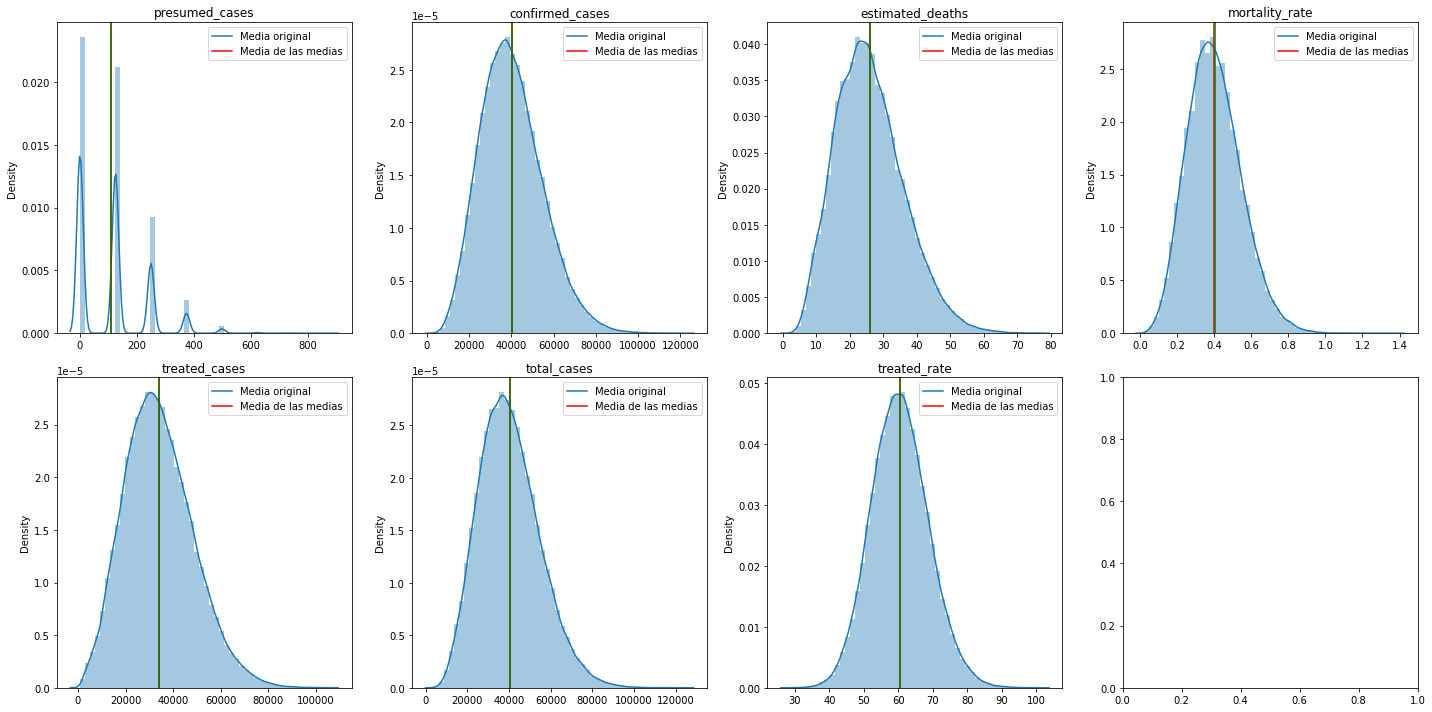

Skew de presumed_cases: 1.0387924699559996
Skew de confirmed_cases: 0.49763754054380904
Skew de estimated_deaths: 0.5433764929874624
Skew de mortality_rate: 0.4207291258248777
Skew de treated_cases: 0.4661571183756024
Skew de total_cases: 0.5009964954782706
Skew de treated_rate: 0.18959820873328104
Curtosis de presumed_cases: 1.054267319965359
Curtosis de confirmed_cases: 0.23568396318306917
Curtosis de estimated_deaths: 0.25483867383415326
Curtosis de mortality_rate: 0.16435706837265363
Curtosis de treated_cases: 0.1749330085840186
Curtosis de total_cases: 0.24317785200028252
Curtosis de treated_rate: 0.1111078619820085
Error estándar de presumed_cases: 115.5555521017222
Error estándar de confirmed_cases: 14555.587316424666
Error estándar de estimated_deaths: 10.088649219772774
Error estándar de mortality_rate: 0.14468638910080078
Error estándar de treated_cases: 14356.064517993098
Error estándar de total_cases: 14487.265393622445
Error estándar de treated_rate: 8.286383367114482


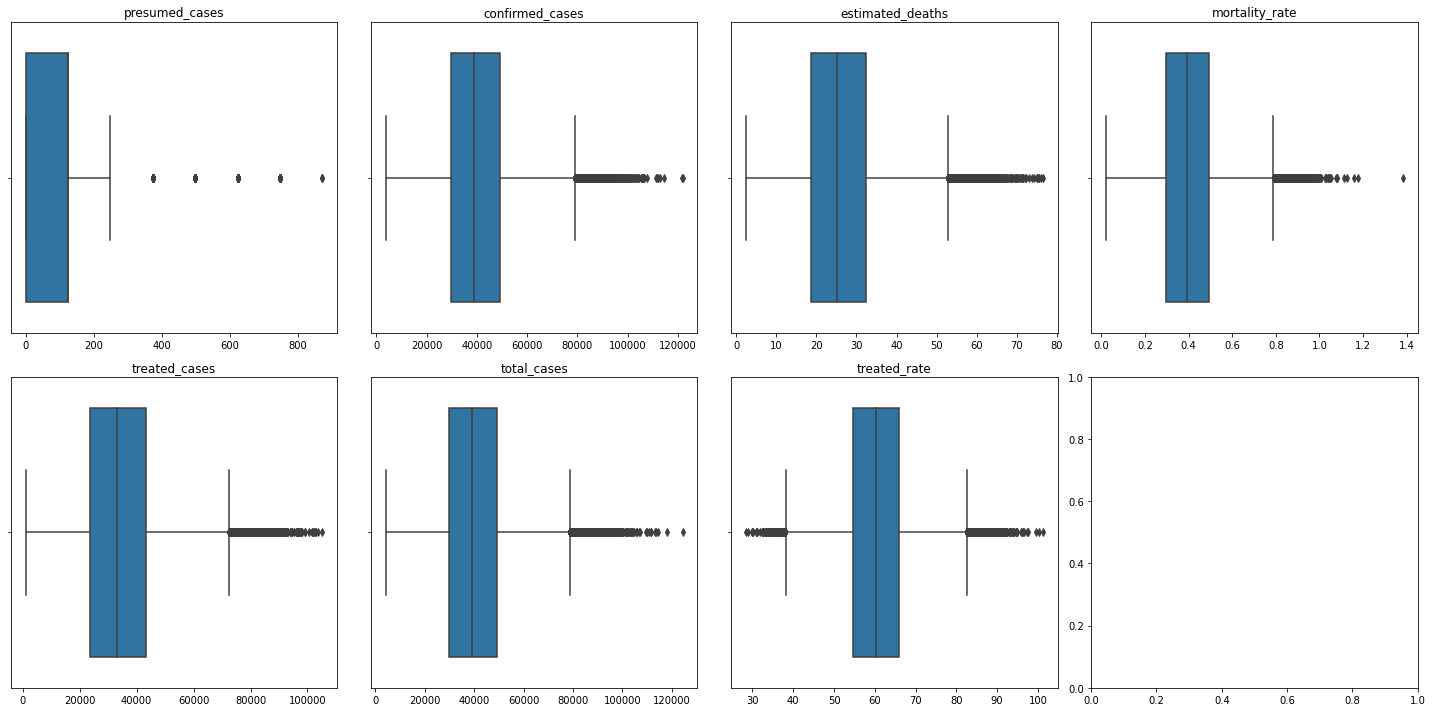

In [101]:
distribuciones_muestrales(df_america_mod, 50, 2, 4)

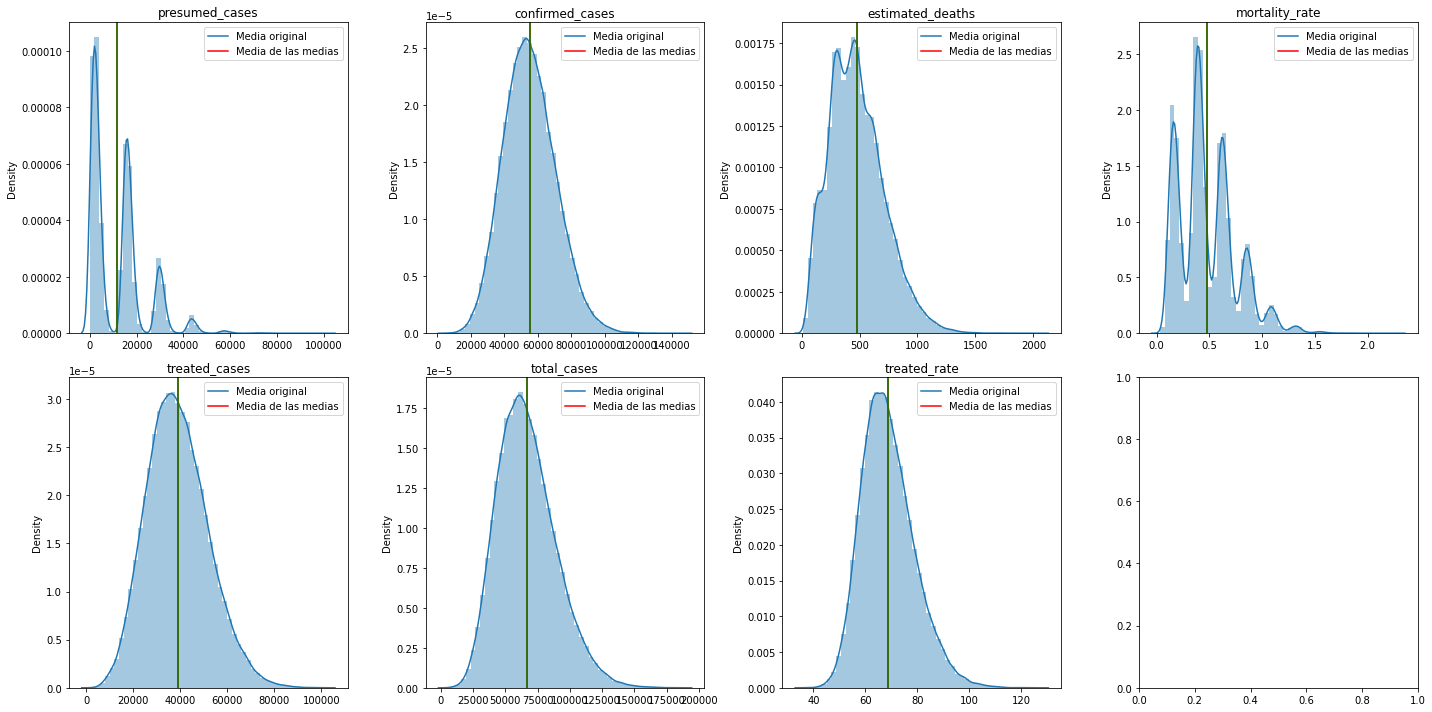

Skew de presumed_cases: 1.1604032699064761
Skew de confirmed_cases: 0.2994866413923346
Skew de estimated_deaths: 0.6085342175659082
Skew de mortality_rate: 0.7888052895103317
Skew de treated_cases: 0.3828692466928847
Skew de total_cases: 0.5583083086201948
Skew de treated_rate: 0.5890695156418287
Curtosis de presumed_cases: 1.3473625340485964
Curtosis de confirmed_cases: 0.07490909004295432
Curtosis de estimated_deaths: 0.32557637862314914
Curtosis de mortality_rate: 0.6145039556629448
Curtosis de treated_cases: 0.11176968105531371
Curtosis de total_cases: 0.369091463907552
Curtosis de treated_rate: 0.5406804756282164
Error estándar de presumed_cases: 11387.107711196499
Error estándar de confirmed_cases: 15478.097500505133
Error estándar de estimated_deaths: 233.9280810808333
Error estándar de mortality_rate: 0.2665101231547797
Error estándar de treated_cases: 12989.859246695636
Error estándar de total_cases: 22481.388517423693
Error estándar de treated_rate: 10.090323415950248


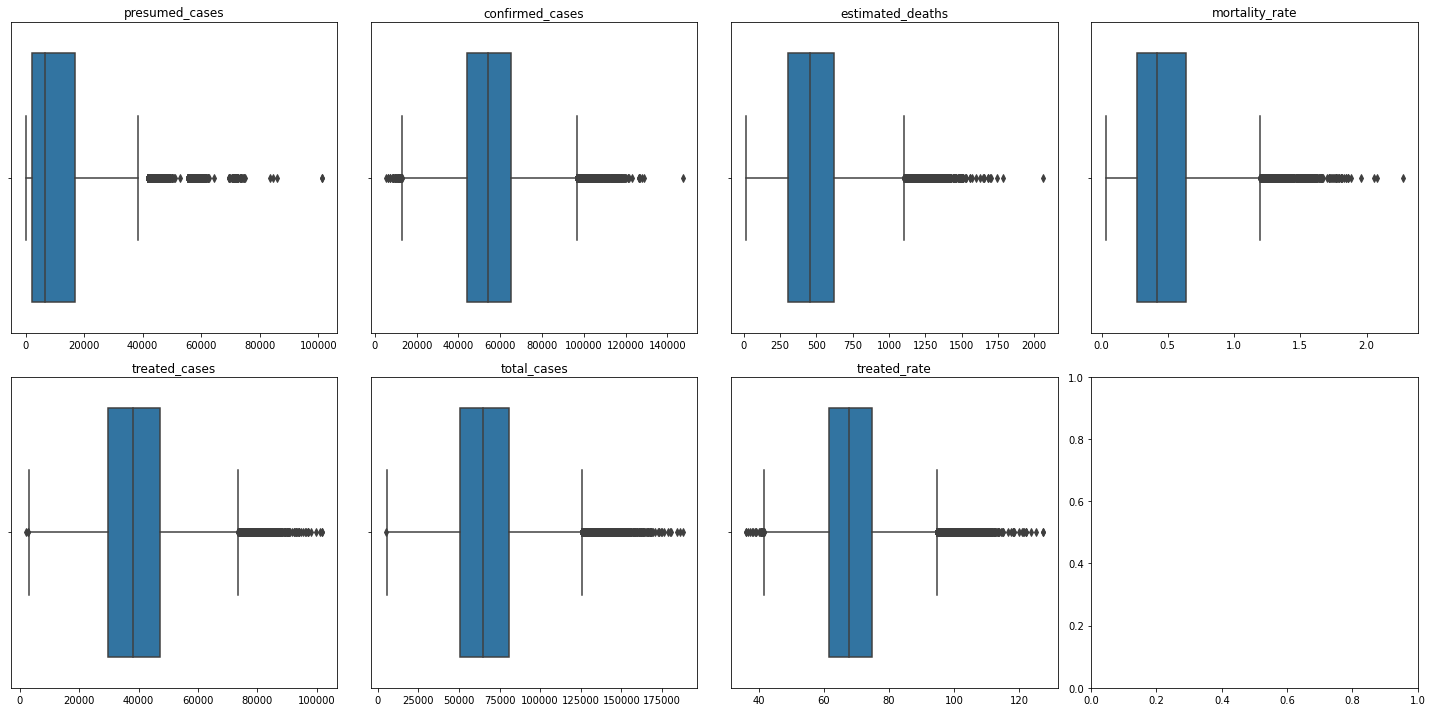

In [102]:
distribuciones_muestrales(df_asia_mod, 50, 2, 4)

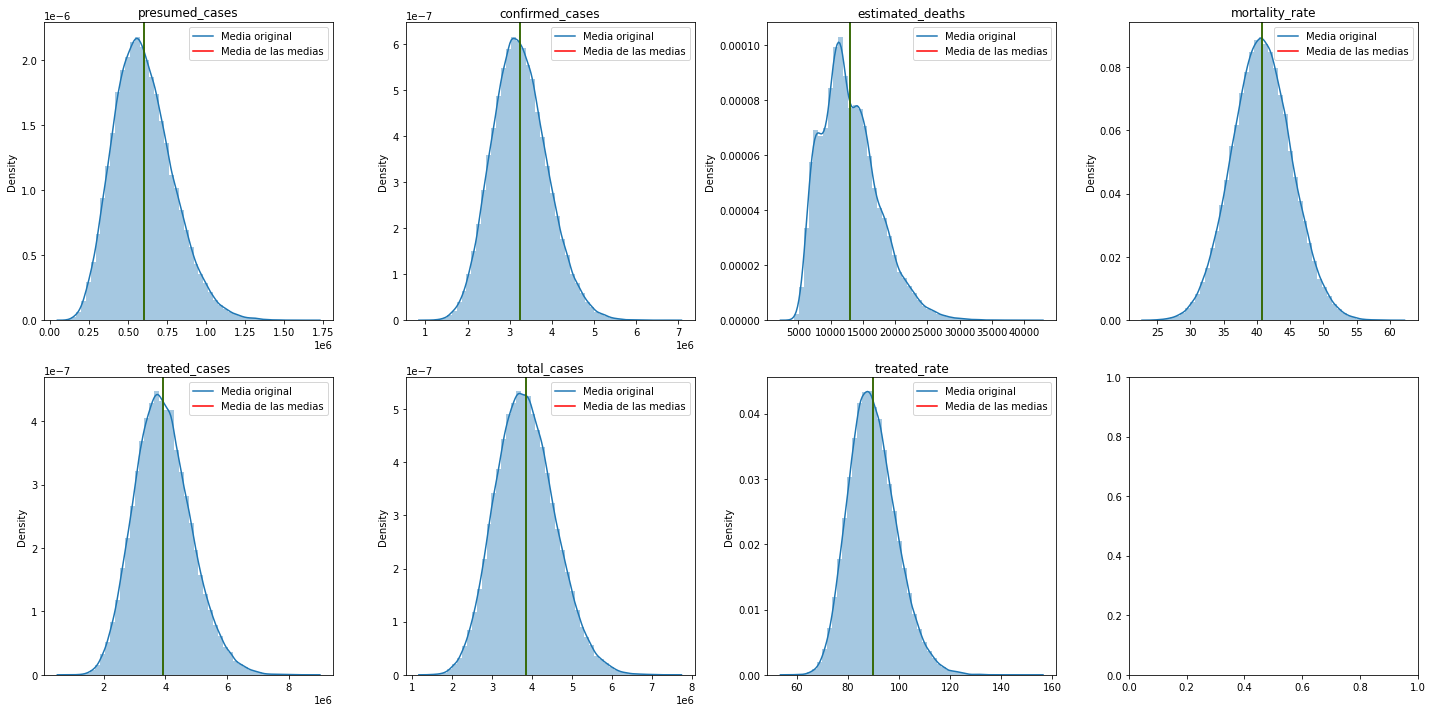

Skew de presumed_cases: 0.505908446965555
Skew de confirmed_cases: 0.2830447010638478
Skew de estimated_deaths: 0.7213153482396578
Skew de mortality_rate: 0.058129697765274393
Skew de treated_cases: 0.34844492790683085
Skew de total_cases: 0.27518916180527064
Skew de treated_rate: 0.441201280386227
Curtosis de presumed_cases: 0.27942256082389605
Curtosis de confirmed_cases: 0.06970390905232993
Curtosis de estimated_deaths: 0.5795412025674285
Curtosis de mortality_rate: -0.0012081192245778638
Curtosis de treated_cases: 0.13067570022676067
Curtosis de total_cases: 0.03387846889736856
Curtosis de treated_rate: 0.3426657226293339
Error estándar de presumed_cases: 188667.5708125177
Error estándar de confirmed_cases: 652279.6564641548
Error estándar de estimated_deaths: 4401.1309997898215
Error estándar de mortality_rate: 4.48538112636646
Error estándar de treated_cases: 910295.523628305
Error estándar de total_cases: 743424.5636900726
Error estándar de treated_rate: 9.387427569308983


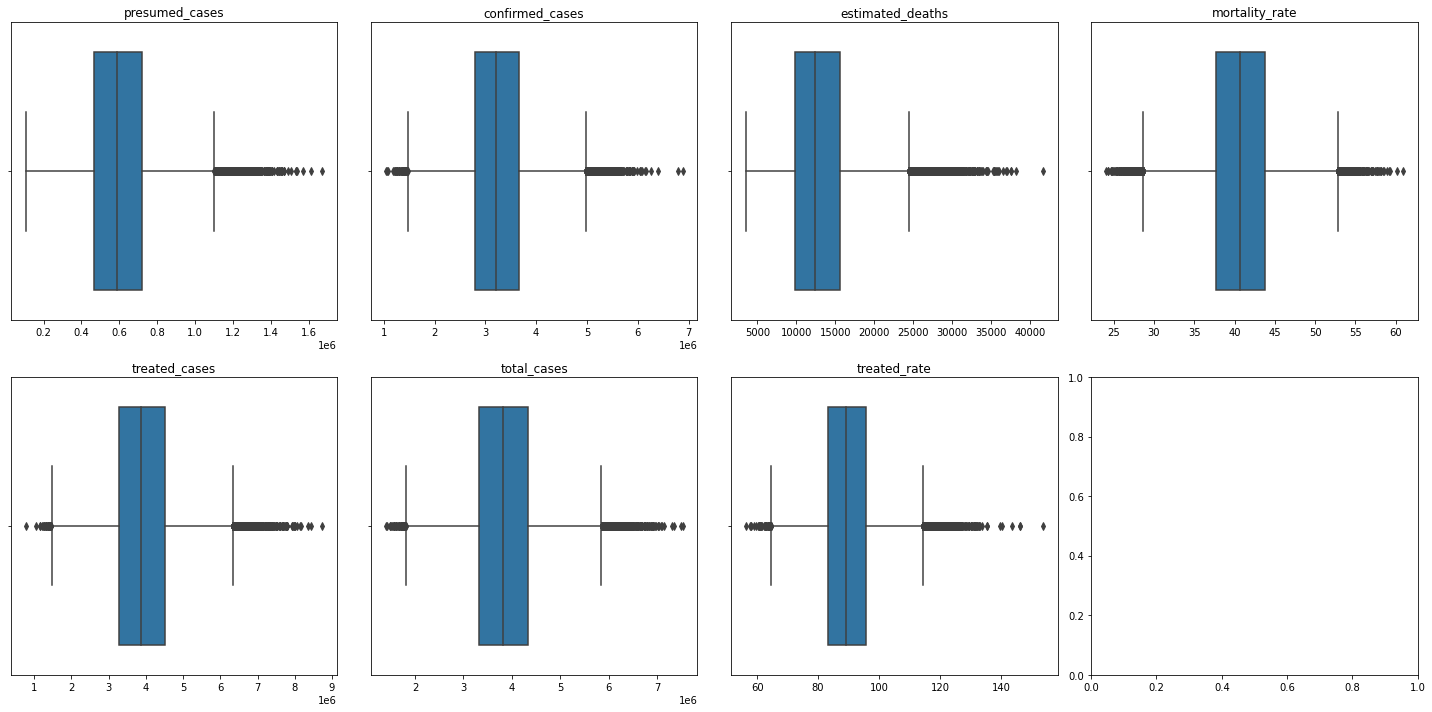

In [103]:
distribuciones_muestrales(df_africa_mod, 50, 2, 4)

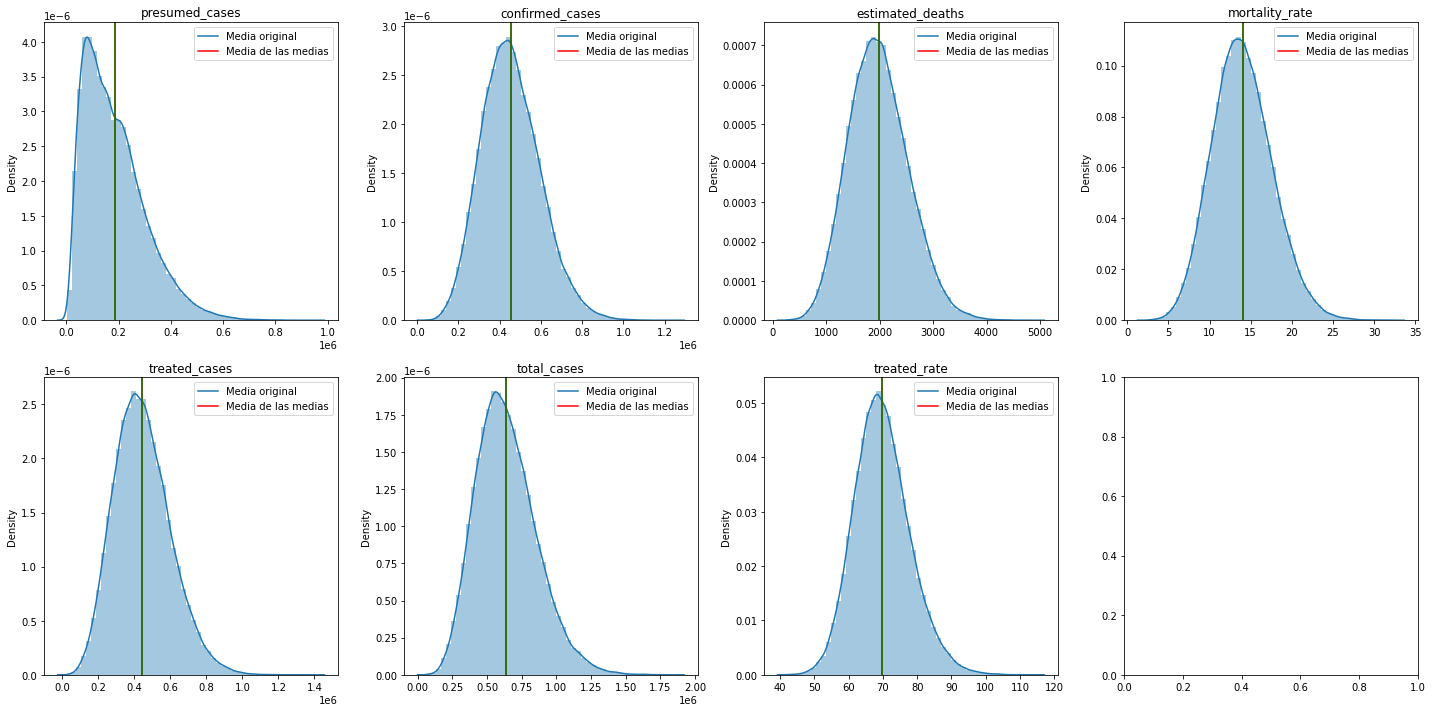

Skew de presumed_cases: 1.0163630136922217
Skew de confirmed_cases: 0.3828407845627801
Skew de estimated_deaths: 0.32437999205794227
Skew de mortality_rate: 0.2884059567264609
Skew de treated_cases: 0.4533405182647093
Skew de total_cases: 0.5508598016280425
Skew de treated_rate: 0.3880641828135625
Curtosis de presumed_cases: 1.1350324512635335
Curtosis de confirmed_cases: 0.12997019064371784
Curtosis de estimated_deaths: 0.09374683617563173
Curtosis de mortality_rate: 0.09604600815791153
Curtosis de treated_cases: 0.1944401705138179
Curtosis de total_cases: 0.397007409621867
Curtosis de treated_rate: 0.42328439539972074
Error estándar de presumed_cases: 117205.10119825597
Error estándar de confirmed_cases: 140981.37157100014
Error estándar de estimated_deaths: 555.1290011802404
Error estándar de mortality_rate: 3.6231811229529662
Error estándar de treated_cases: 154954.56494473893
Error estándar de total_cases: 216508.67578415625
Error estándar de treated_rate: 8.10573794647141


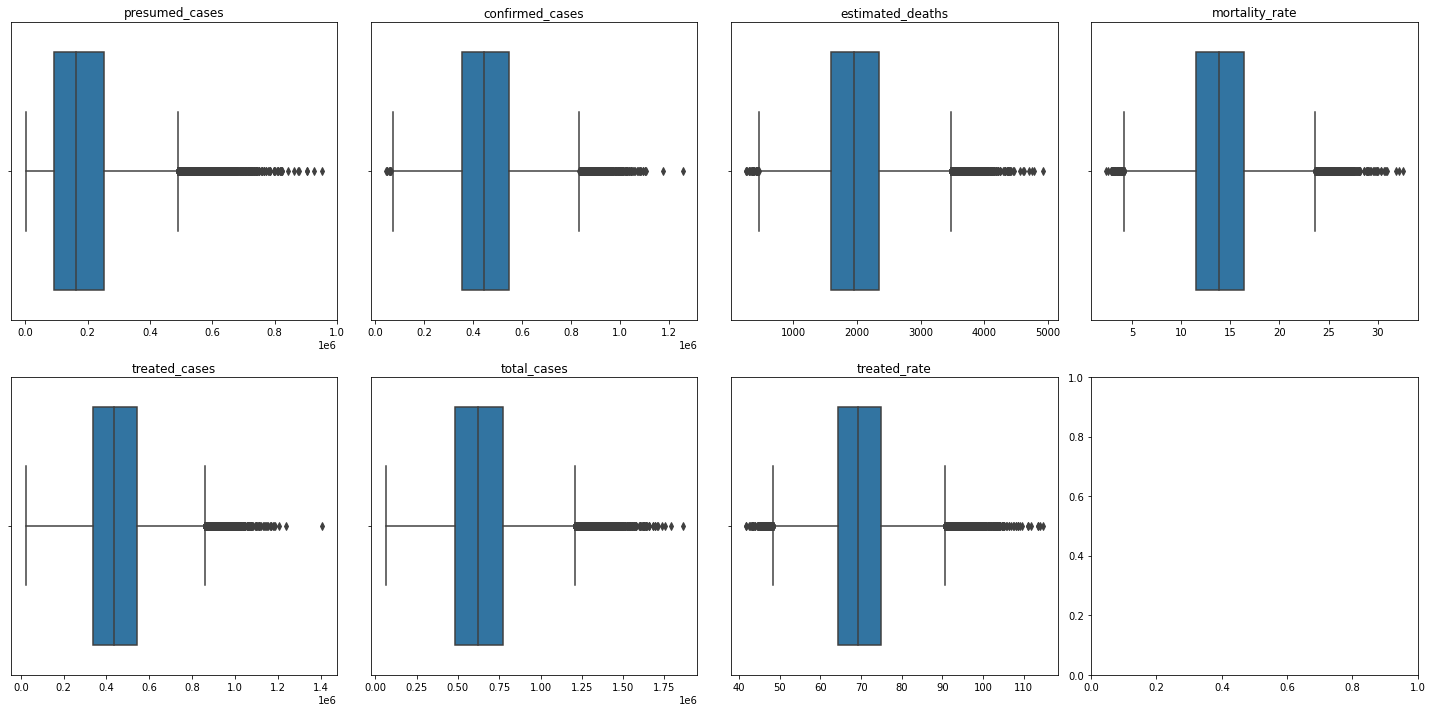

In [104]:
distribuciones_muestrales(df_1_mod, 50, 2, 4)

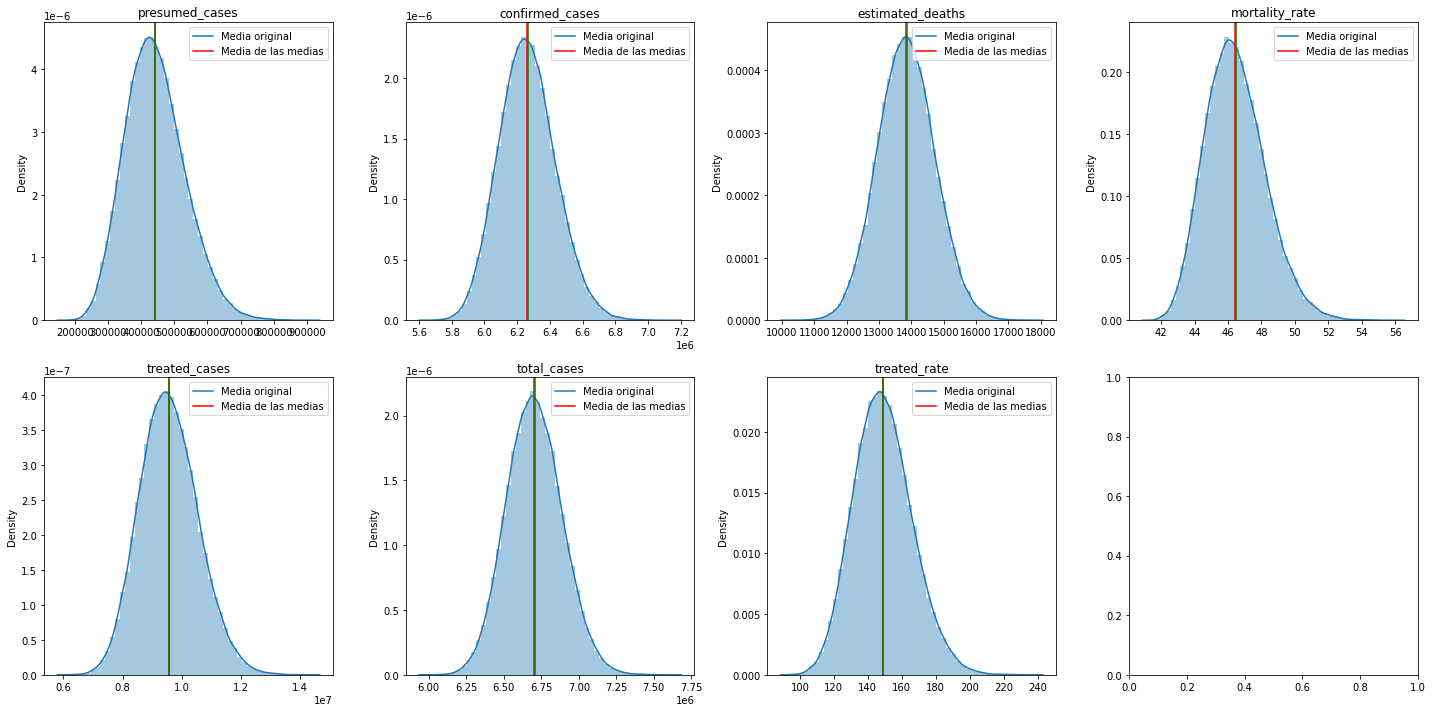

Skew de presumed_cases: 0.40624161336401543
Skew de confirmed_cases: 0.2407143862205685
Skew de estimated_deaths: 0.07141762786640786
Skew de mortality_rate: 0.4111891696671899
Skew de treated_cases: 0.24347221507600936
Skew de total_cases: 0.1496218253640967
Skew de treated_rate: 0.29698430975839807
Curtosis de presumed_cases: 0.17206063105142277
Curtosis de confirmed_cases: 0.07298150827433769
Curtosis de estimated_deaths: -0.025677804696066175
Curtosis de mortality_rate: 0.1620438597135081
Curtosis de treated_cases: 0.02569369364734131
Curtosis de total_cases: 0.008993925859435592
Curtosis de treated_rate: 0.1170380745048325
Error estándar de presumed_cases: 89276.12942641143
Error estándar de confirmed_cases: 171937.08966064127
Error estándar de estimated_deaths: 872.5014468940102
Error estándar de mortality_rate: 1.7733041639711402
Error estándar de treated_cases: 978738.3220162458
Error estándar de total_cases: 184151.86660763554
Error estándar de treated_rate: 17.10834360150015


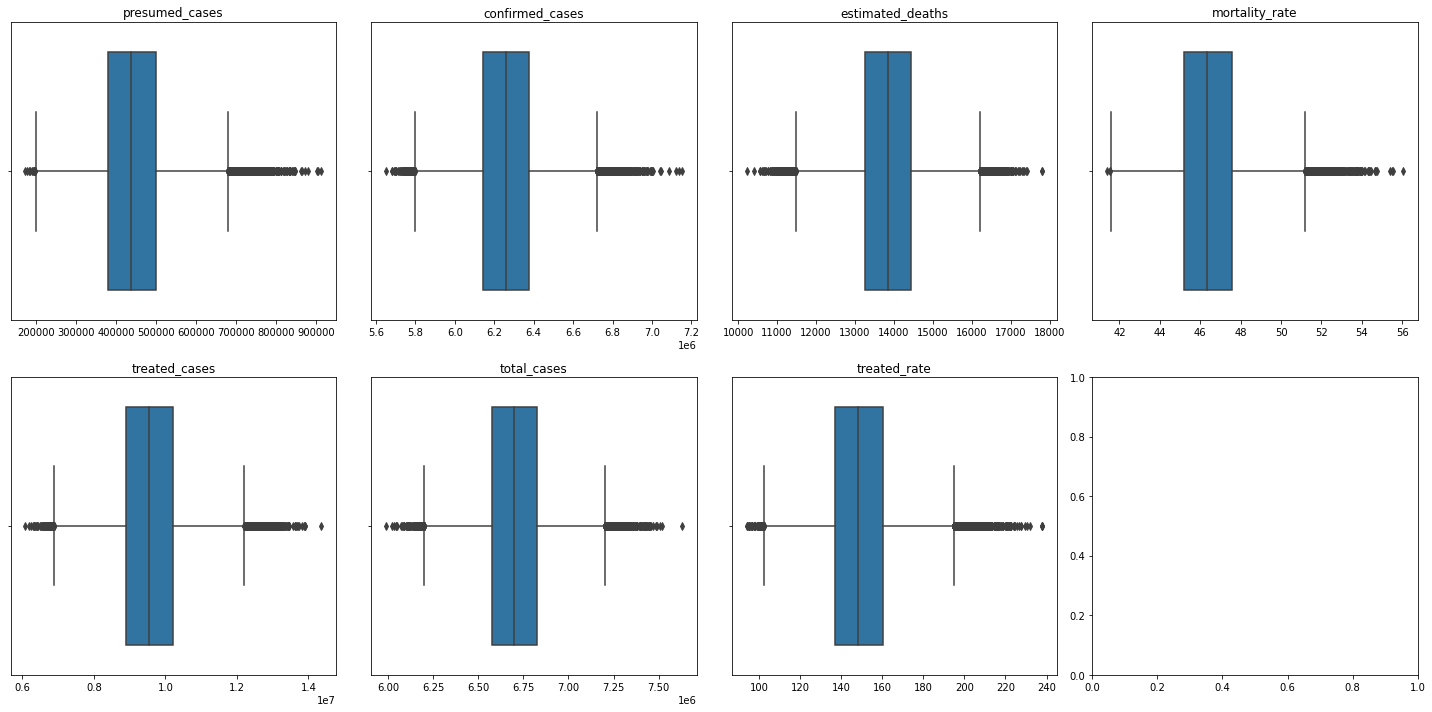

In [105]:
distribuciones_muestrales(df_2_mod, 50, 2, 4)

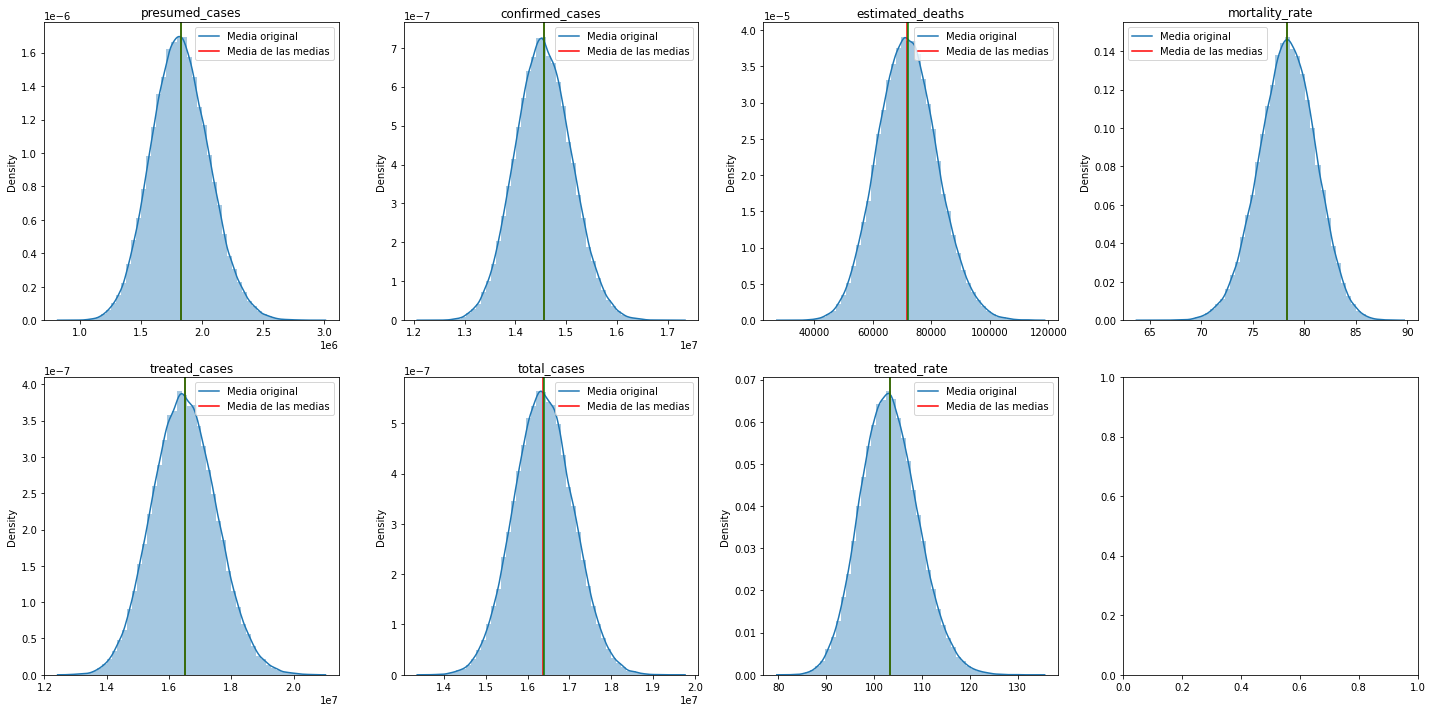

Skew de presumed_cases: 0.15277501750300593
Skew de confirmed_cases: 0.08696124165366337
Skew de estimated_deaths: 0.13967635302337983
Skew de mortality_rate: -0.1081665279190231
Skew de treated_cases: 0.10937364010800037
Skew de total_cases: 0.04316408582645018
Skew de treated_rate: 0.20938427388450148
Curtosis de presumed_cases: 0.012664221927952912
Curtosis de confirmed_cases: -0.034920025790365905
Curtosis de estimated_deaths: -0.006463036672911926
Curtosis de mortality_rate: -0.002568978169027236
Curtosis de treated_cases: -0.015288151075124823
Curtosis de total_cases: -0.03217208025045659
Curtosis de treated_rate: 0.040248198873063856
Error estándar de presumed_cases: 236084.36439147554
Error estándar de confirmed_cases: 552780.7493213193
Error estándar de estimated_deaths: 10164.632232890843
Error estándar de mortality_rate: 2.736859588411676
Error estándar de treated_cases: 1026530.3017942847
Error estándar de total_cases: 703434.4763406181
Error estándar de treated_rate: 5.997

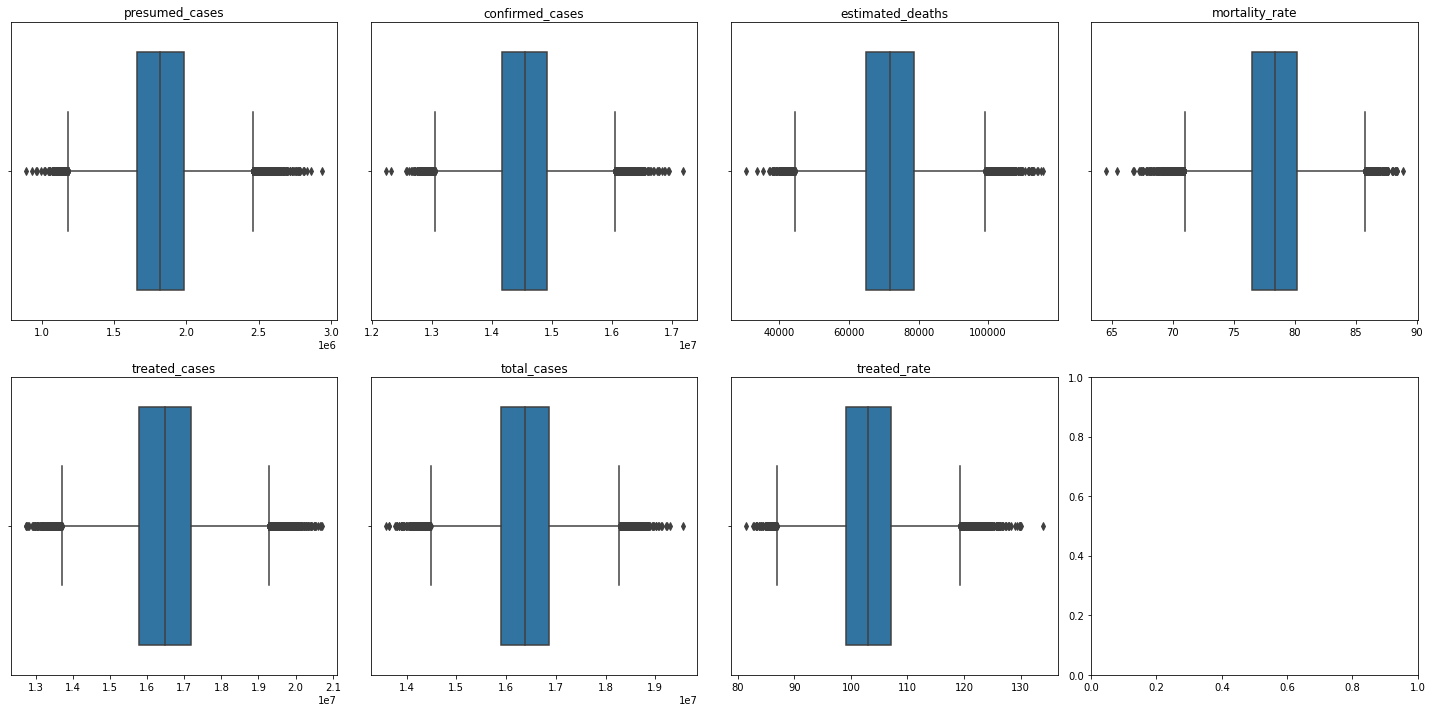

In [106]:
distribuciones_muestrales(df_3_mod, 50, 2, 4)

Utilizando las gráficas anteriores hemos decidido darle los siguientes intervalos de confianza

    - América: 90%
    - Asia: 85%
    - África: 75%
    - df_1: 80%
    - df_2: 80%
    - df_3: 70%

  Creamos una función para imprimir los intervalos de confianza para cada parámetro

In [107]:
def intervalos_confianza(df, repeticiones, intervalo_confianza, ancho_plot, alto_plot, iteraciones = 10**5):
    confianza = 1 - intervalo_confianza # calculamos el nivel de confianza
    columns = list(df.columns) # guardamos los nombres de las columnas en una variable
    
    means = []
    for j in columns: 
        df_i = df[j] # seleccionamos una columna
        dummy_list = []
        for i in range(iteraciones): # realizamos el número de repeticiones que se haya indicado
            sample = df_i.sample(n = repeticiones, replace=True) # tomamos una muestra de 100 valores con reemplazo
            dummy_list.append(sample.mean()) # calculamos la media de la muestra y la guardamos en una lista
        means.append(dummy_list) # guardamos la lista de medias en una lista de listas

    fig, axes = plt.subplots(alto_plot, ancho_plot, figsize=(20, 10)) # creamos una grilla de 2x4 subplots
    for i, ax in enumerate(axes.flat): # iteramos sobre los subplots
        if i == 7:
            break
        lim_inf = pd.Series(means[i]).quantile(confianza/2)
        lim_sup = pd.Series(means[i]).quantile(1 - confianza/2)
        general_mean = pd.Series(means[i]).mean()
        mean_lim = ((general_mean - lim_inf) + (lim_sup - general_mean))/2 

        sns.distplot(means[i], ax=ax) # graficamos la distribución de las medias
        ax.set_title(f"Intervalo de {intervalo_confianza*100}% de la media para {columns[i]}: {round(general_mean, 3)} +/- {mean_lim.round(3)}") # ponemos el nombre de la columna como título del subplot
        ax.axvline(lim_inf, color='red') # ponemos una línea vertical en el límite inferior del intervalo de confianza
        ax.axvline(lim_sup, color='red') # ponemos una línea vertical en el límite superior del intervalo de confianza
    plt.tight_layout() # ajustamos los subplots para que no se superpongan
    plt.show() # mostramos el gráfico
        

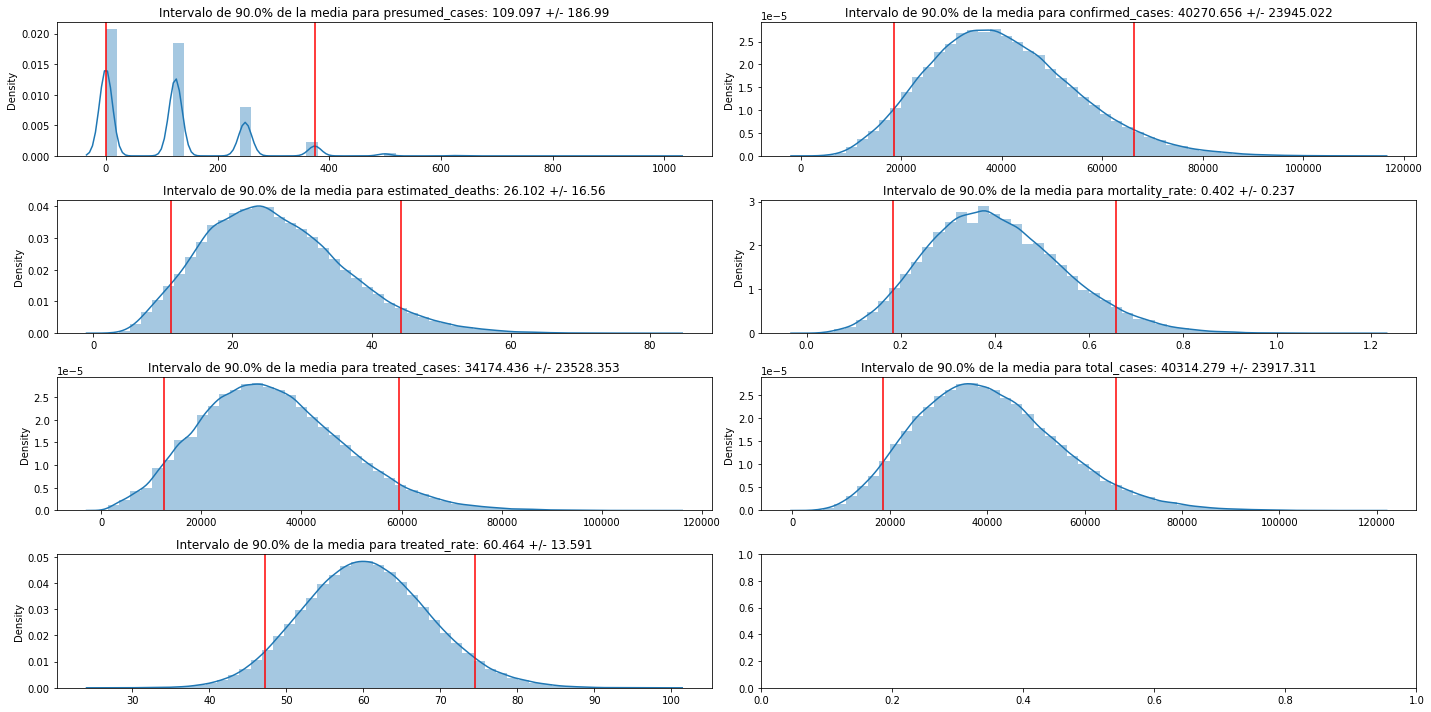

In [109]:
intervalos_confianza(df_america_mod, 50, 0.90, 2, 4) 

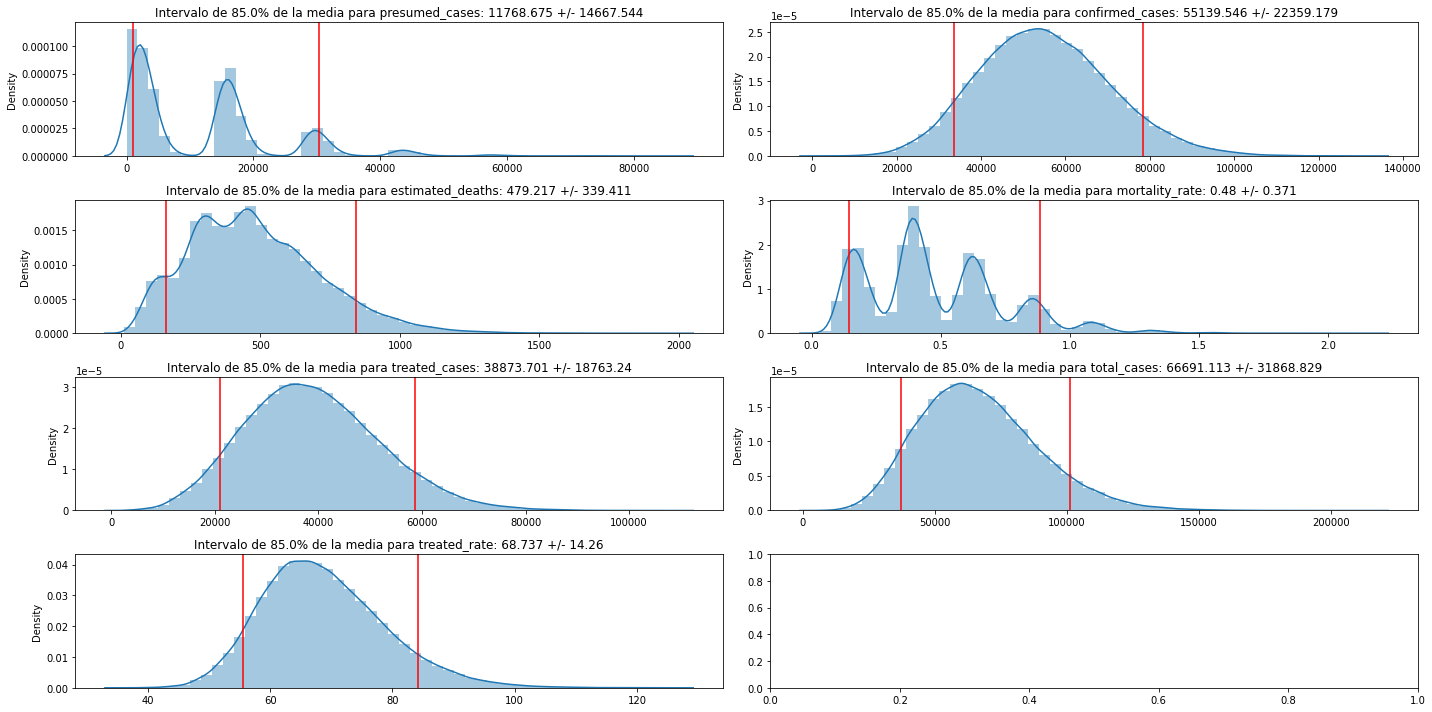

In [110]:
intervalos_confianza(df_asia_mod, 50, 0.85, 2, 4) 

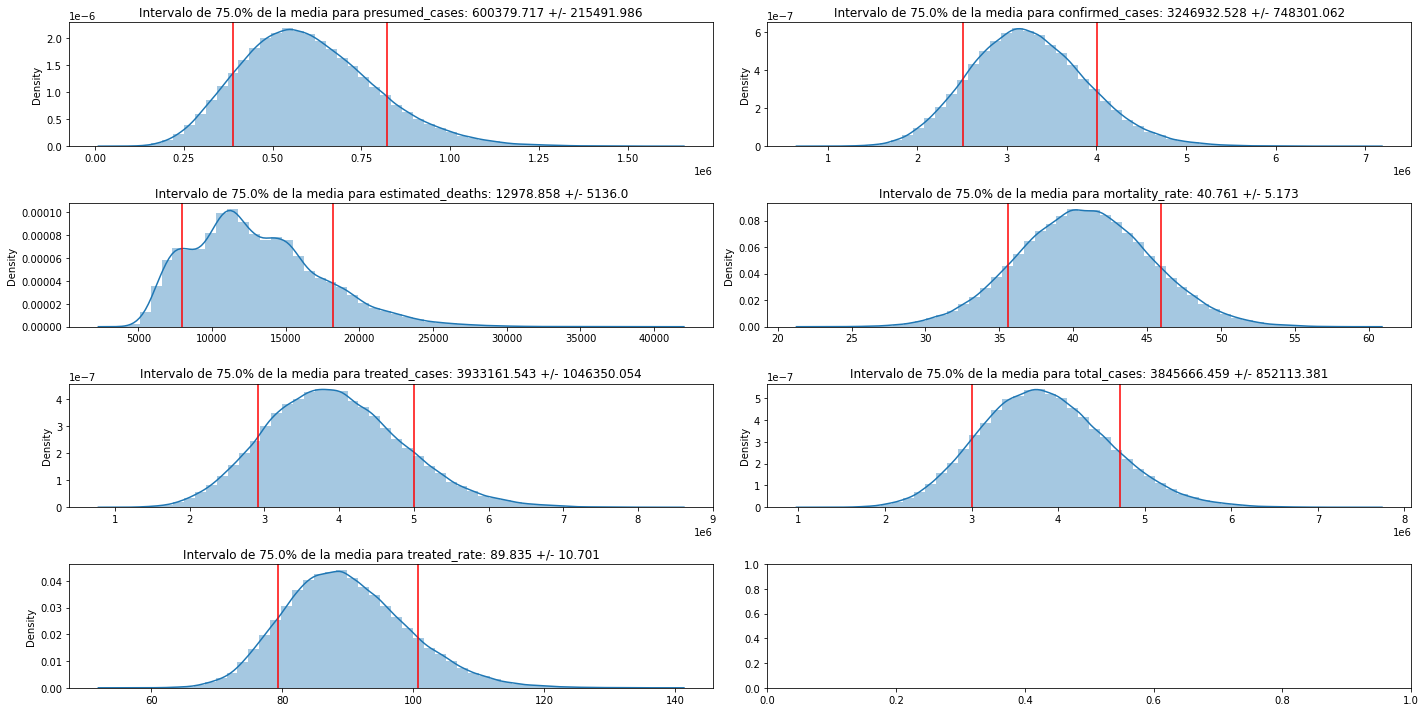

In [111]:
intervalos_confianza(df_africa_mod, 50, 0.75, 2, 4)

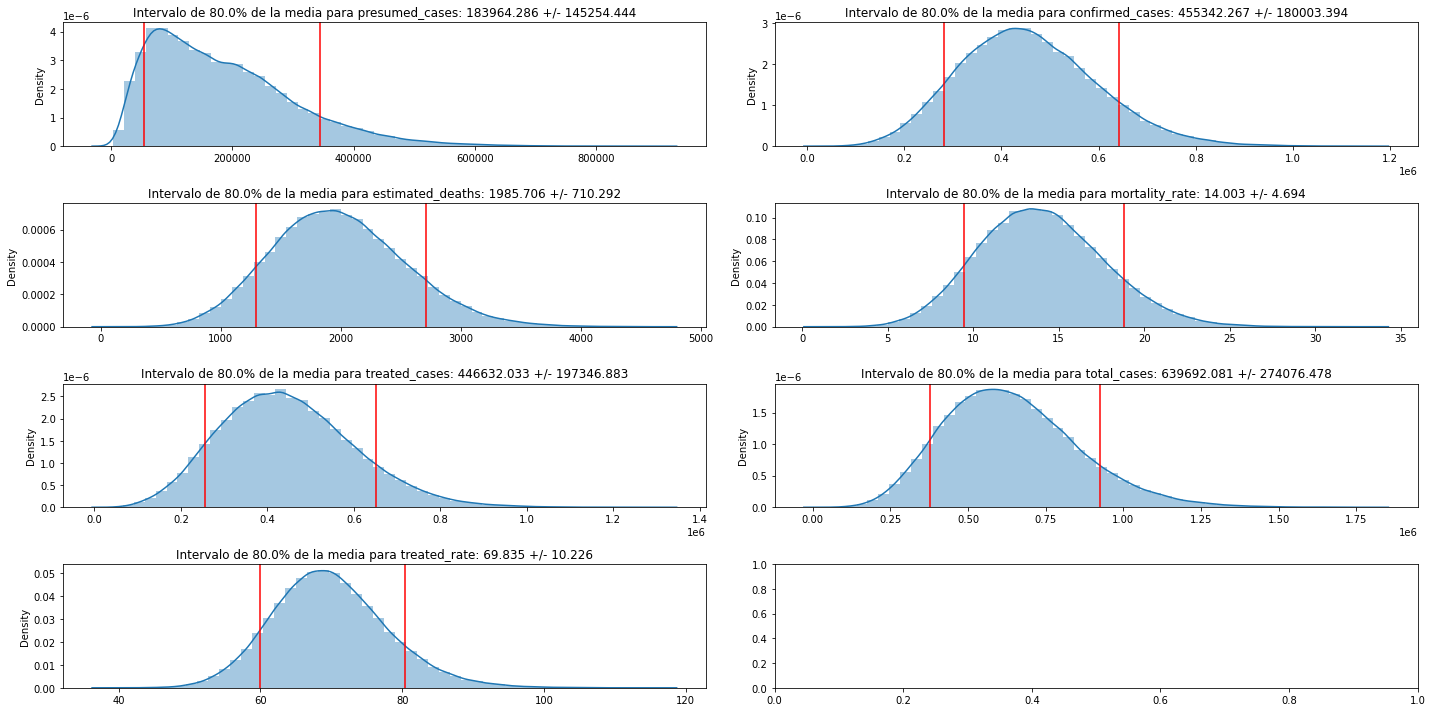

In [112]:
intervalos_confianza(df_1_mod, 50, 0.8, 2, 4)

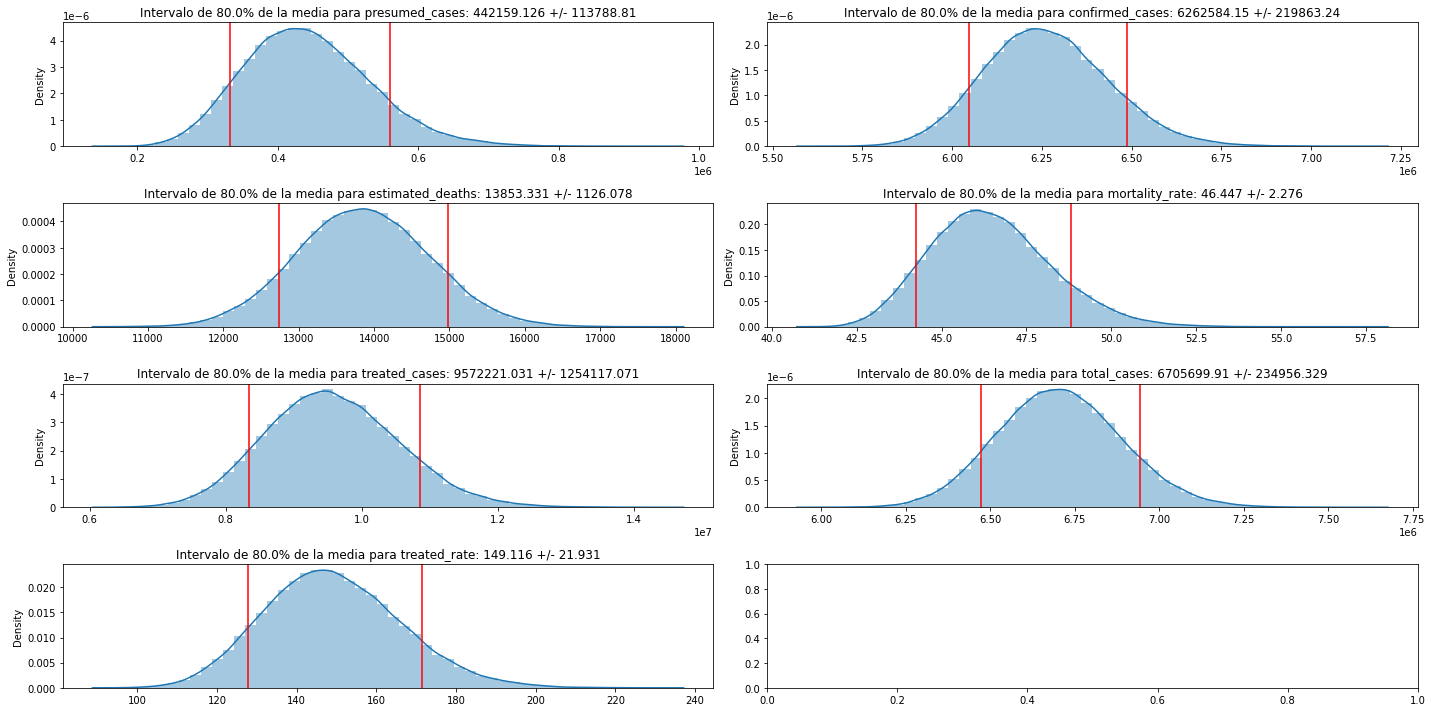

In [113]:
intervalos_confianza(df_2_mod, 50, 0.8, 2, 4)

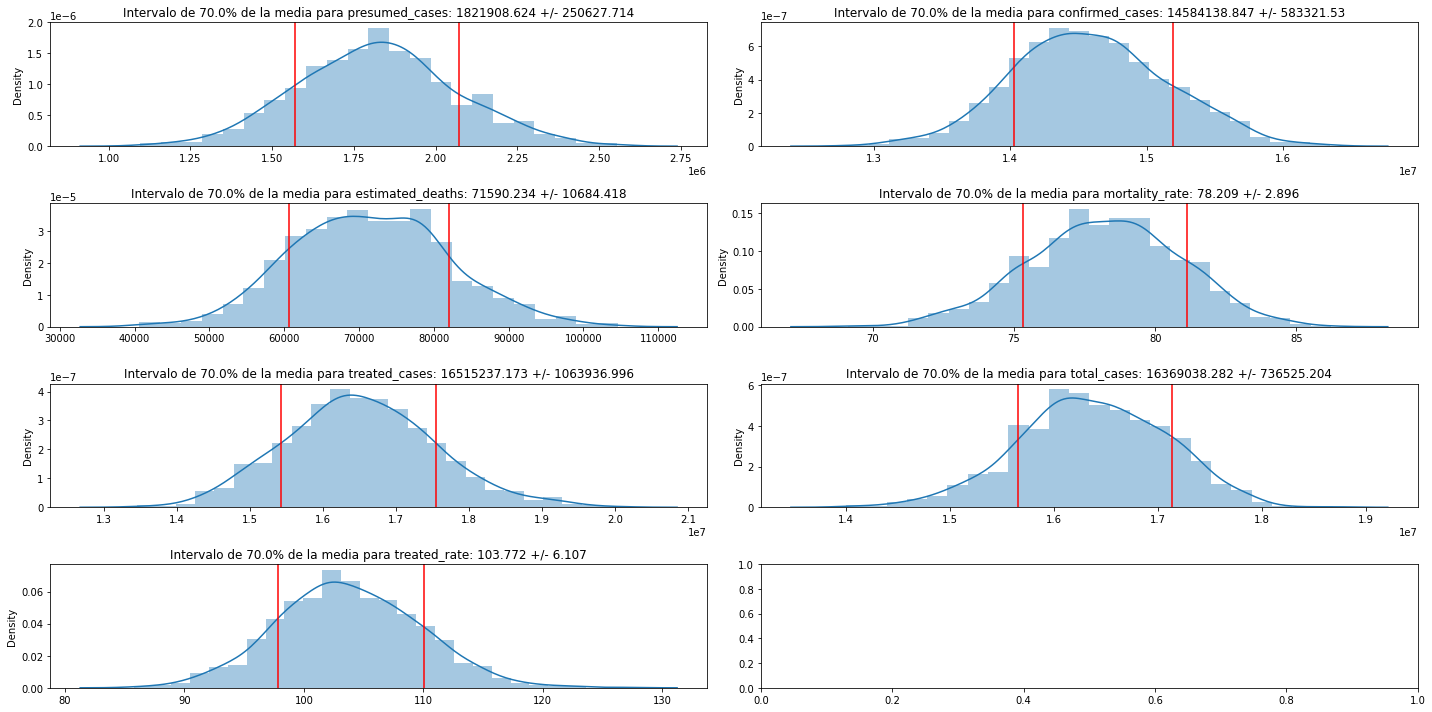

In [114]:
intervalos_confianza(df_3_mod, 50, 0.7, 2, 4, iteraciones = 10**3)

### 3.- Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.

Para cada dataframe eligiremos aquellas variables con mayor correlación entre ellos. Seguiremos explorando las ideas anteriores de cuando realizamos los modelos lineales simples

In [37]:
# división de dataset 
y_america = df_america_mod['estimated_deaths'] 
X_america = df_america_mod[['total_cases','treated_cases' ,'confirmed_cases']]

X_america_training, X_america_test, y_america_training, y_america_test = train_test_split(X_america, y_america, test_size=0.3, shuffle=True) # dividimos el dataset en entrenamiento y test

lr = LinearRegression()
lr.fit(X_america_training, y_america_training) # entrenamos el modelo

lr.score(X_america_test, y_america_test) # calculamos el R2 del modelo

0.8914511086374801

In [46]:
scores_america = cross_validate(lr, X_america, y_america, scoring='r2', cv = 20)
print(f'Score promerdio del modelo America: {scores_america["test_score"].mean():.3f} +/- {scores_america["test_score"].std():.3f}')

Score promerdio del modelo America: -59.671 +/- 162.063


In [50]:
y_asia = df_asia_mod['estimated_deaths']
X_asia = df_asia_mod[['treated_cases' ,'confirmed_cases']]

X_asia_training, X_asia_test, y_asia_training, y_asia_test = train_test_split(X_asia, y_asia, test_size=0.3, shuffle=True) # dividimos el dataset en entrenamiento y test

lr = LinearRegression() # creamos un objeto de la clase LinearRegression
lr.fit(X_asia_training, y_asia_training) # entrenamos el modelo

lr.score(X_asia_test, y_asia_test) # calculamos el R2 del modelo

0.274750054052186

In [47]:
scores_asia = cross_validate(lr, X_asia, y_asia, scoring='r2', cv = 20)
print(f'Score promerdio del modelo Asia: {scores_asia["test_score"].mean():.3f} +/- {scores_asia["test_score"].std():.3f}')

Score promerdio del modelo Asia: -44.250 +/- 94.687


In [52]:
y_africa = df_africa_mod['estimated_deaths']
X_africa = df_africa_mod[['treated_cases' ,'confirmed_cases']] # seleccionamos las columnas que vamos a usar como variables independientes

X_africa_training, X_africa_test, y_africa_training, y_africa_test = train_test_split(X_africa, y_africa, test_size=0.3, shuffle=True) # dividimos el dataset en entrenamiento y test

lr = LinearRegression() # creamos un objeto de la clase LinearRegression
lr.fit(X_africa_training, y_africa_training) # entrenamos el modelo

lr.score(X_africa_test, y_africa_test) # calculamos el R2 del modelo

0.4037894557660531

In [51]:
scores_africa = cross_validate(lr, X_africa, y_africa, scoring='r2', cv = 20)
print(f'Score promerdio del modelo Africa: {scores_africa["test_score"].mean():.3f} +/- {scores_africa["test_score"].std():.3f}')

Score promerdio del modelo Africa: -192.085 +/- 763.705


In [41]:
y_1 = df_1_mod['estimated_deaths']
X_1 = df_1_mod[['treated_cases' ,'confirmed_cases','total_cases']] # seleccionamos las columnas que vamos a usar como variables independientes

X_1_training, X_1_test, y_1_training, y_1_test = train_test_split(X_1, y_1, test_size=0.3, shuffle=True) # dividimos el dataset en entrenamiento y test

lr = LinearRegression() # creamos un objeto de la clase LinearRegression
lr.fit(X_1_training, y_1_training) # entrenamos el modelo

lr.score(X_1_test, y_1_test) # calculamos el R2 del modelo

0.6057572093973878

In [53]:
scores_df1 = cross_validate(lr, X_1, y_1, scoring='r2', cv = 20)
print(f'Score promerdio del modelo df_1: {scores_df1["test_score"].mean():.3f} +/- {scores_df1["test_score"].std():.3f}')

Score promerdio del modelo df_1: -31.859 +/- 94.321


In [71]:
y_2 = df_2_mod['estimated_deaths'] # seleccionamos la columna que vamos a usar como variable dependiente
X_2 = df_2_mod[['treated_cases','confirmed_cases','total_cases']] # seleccionamos las columnas que vamos a usar como variables independientes

X_2_training, X_2_test, y_2_training, y_2_test = train_test_split(X_2, y_2, test_size=0.3, shuffle=True) # dividimos el dataset en entrenamiento y test

lr = LinearRegression() # creamos un objeto de la clase LinearRegression
lr.fit(X_2_training, y_2_training) # entrenamos el modelo

lr.score(X_2_test, y_2_test) # calculamos el R2 del modelo

0.1800355713932429

In [58]:
scores_df2 = cross_validate(lr, X_2, y_2, scoring='r2', cv = 7)
print(f'Score promerdio del modelo df_2: {scores_df2["test_score"].mean():.3f} +/- {scores_df2["test_score"].std():.3f}')

Score promerdio del modelo df_2: -31.164 +/- 43.654


In [43]:
y_3 = df_3_mod['estimated_deaths'] # seleccionamos la columna que vamos a usar como variable dependiente
X_3 = df_3_mod[['treated_cases','confirmed_cases','total_cases']] # seleccionamos las columnas que vamos a usar como variables independientes

X_3_training, X_3_test, y_3_training, y_3_test = train_test_split(X_3, y_3, test_size=0.3, shuffle=True) # dividimos el dataset en entrenamiento y test

lr = LinearRegression() # creamos un objeto de la clase LinearRegression
lr.fit(X_3_training, y_3_training) # entrenamos el modelo

lr.score(X_3_test, y_3_test) # calculamos el R2 del modelo

0.8620787100058115

In [63]:
scores_df3 = cross_validate(lr, X_3, y_3, scoring='r2', cv = 6)
print(f'Score promerdio del modelo df_1: {scores_df3["test_score"].mean():.3f} +/- {scores_df3["test_score"].std():.3f}')

Score promerdio del modelo df_1: -30073.077 +/- 61115.598


Vemos que estamos obteniendo en nuestra validación cruzada un score negativo, esto es debido a que al que el modelo predice valores menores a los valores reales, y esto gracias a que en todos los datasets existe una gran cantida de datos altos, por ejemplo


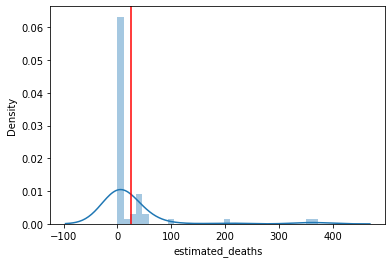

In [74]:
sns.distplot(y_america)
plt.axvline(y_america.mean(), color='red') # ponemos una línea vertical en la media de la distribución

Notamos que existe una gran cantidad de valores por encima de la media, pero, ¡por qué no quitarlos entonces? Comenzamos tratando de limitar nuestro estudio a continentes y a sectores con números de casos con el fin de entender los datos más puntualmente, tener un estimado de que la enfermedad irá en aumento a nivel mundial es importante objetivamente pero en cuestión de entendimiento del sistema nos brinda muy poca información.

A partir de esto notamos que hace falta comenzar a analizar los datos de manera más específica, por ejemplo, por país o incluso delegación o estados. Pero también nos brinda información de que podría existir en general un control por la enfermedad en la mayoría de casos y lugares en los que no se tienen en absoluto; o en su defecto lugares que de pronto manifestaron una ola en casos y muertes, siendo estos principales focos de infección y potencial peligro global. 

Al principio de este notebook notamos que la mayoría de los datos se encuentra acumulados en valores cercanos a cero, trabajar con ellos si bien nos brindaría un modelo más amigable no representaría un modelo en el cual confiar, pues existen muchísimos más factores a tomar en cuando al momento en que se creó y nosotros usamos la base de datos, tales como la falta de datos debido a compliaciones en el registro. Un claro ejemplo de los casos a tomar en cuenta es que para países donde la enfermedad no es prolífera (digamos países cercanos a los polos) ni siquiera se encontró registros en el DB original. Países europeos y nórdicos ni siquiera entran en juego. 

Es claro que tenemos una división tajante entre aquellos países que no manifestan casi casos y aquellos en los que manifiestan una cantidad excesiva, por lo que la única forma de realizar una análisis apropiado es tomar cada país o grupo de países como un caso a estudiar, usando un mayor número de registros y probablemente en un menor lapso de tiempo. 


##Visualización de datos avanzada

Graficaremos la relación jerarquica para observar la proporción entre casos y muertes en los distintos países y continentes. Así mismo mostraremos la relación entre el total de casos y tratamientos por continente y visualizaremos los datos en un mapa coroplético.

No obstante, para realizar esto primero debemos asignar los países al continente indicado.

In [ ]:
import folium
import plotly.express as px


Creamos listas para los países correspondientes a cada continente

In [ ]:
african_countries = ["AFG", "AGO", "BDI", "BEN", "BWA", "CAF", "CIV", "CMR", "COD", "COG", "COM", "CPV", "DJI", "DZA", 'ERI', "ETH", "GAB", "GHA", "GIN", "GMB", "GNQ", "KEN", "KHM", "LBR", 
                     "MDG", "MLI", "MOZ", "MRT", "MWI", "NAM", "NER", "NGA", "RWA", "SDN", "SEN", "SLE", "SOM", "SSD", "SWZ", "TCD", "TZA", "UGA", "ZAF", "ZMB", "ZWE"]
european_countries = ["ARM", "AZE", "GEO"]
oceania_countries = ["PNG", "SLB", "VUT"]
american_countries = ["ARG", "BLZ", "BOL", "BRA", "COL", "CRI", "DOM", "ECU", "GTM", "GUY", "HND", "HTI", "MEX", "NIC", "PAN", "PER", "PRY", "SLV", "STP", "SUR", "VEN"]
asian_countries = ["BFA", "BGD", "BTN", "CHN", "IND", "IDN", "IRN", "KOR", "LAO", "LKA", "MMR", "MYS", "NPL", "PAK", "PHL", "PRK", "SAU", "THA", "TJK", "TLS", "UZB", "VNM", "YEM"]

La función map_country va a relacionar cada país al continente al que pertenece

In [ ]:
def map_country(country):
  if country in african_countries:
    return "Africa"
  elif country in european_countries:
    return "Europe"
  elif country in oceania_countries:
    return "Oceania"
  elif country in asian_countries:
    return "Asia"
  elif country in american_countries:
    return "America"
  else:
    return "Unknown"

Agregamos la columna continent a nuestro dataframe

In [ ]:
df["continent"] = df["country"].apply(lambda x: map_country(x))
df.head()

country  year  presumed_cases  confirmed_cases  estimated_deaths  \
0     AFG  2018           51174           248689               292   
1     AFG  2019            1034           173860               170   
2     AFG  2020             150           105295               110   
3     AGO  2018          777685          5150575             13489   
4     AGO  2019          475810          7054978             13622   

   mortality_rate  treated_cases  total_cases  treated_rate continent  
0             1.0          31114       299863         10.38    Africa  
1             0.6         169504       174894         96.92    Africa  
2             0.4         103466       105445         98.12    Africa  
3            43.8        6092332      5928260        102.77    Africa  
4            42.8        5575259      7530788         74.03    Africa

A continuación observamos la relación jerarquica del total de casos, respecto a los continentes, países y años con un treemap

In [ ]:
fig = px.treemap(df, path=['continent', 'country', "year"], values="total_cases")
fig.show()

Asimismo, observamos este tipo de relación para el estimado de muertes

In [ ]:
fig = px.treemap(df, path=['continent', 'country', "year"], values="estimated_deaths")
fig.show()

A continuación creamos scatterplots para observar la relación entre el total de casos y casos tratados, colocando el año como variable condicional

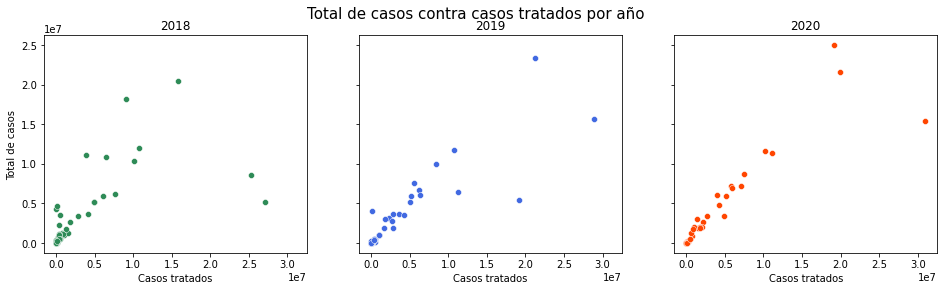

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

sns.scatterplot(x=df[df["year"] == 2018]["treated_cases"], y=df[df["year"] == 2018]["total_cases"], ax=axes[0], color="seagreen")
sns.scatterplot(x=df[df["year"] == 2019]["treated_cases"], y=df[df["year"] == 2019]["total_cases"], ax=axes[1], color="royalblue")
sns.scatterplot(x=df[df["year"] == 2020]["treated_cases"], y=df[df["year"] == 2020]["total_cases"], ax=axes[2], color="orangered")


axes[0].set(xlabel='Casos tratados', ylabel='Total de casos', title='2018')
axes[1].set(xlabel='Casos tratados', ylabel='', title='2019')
axes[2].set(xlabel='Casos tratados', title='2020')


fig.suptitle('Total de casos contra casos tratados por año', fontsize=15);

Finalmente mostramos un mapa coroplético en el cual se visualiza el total de casos para el año de 2020

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2, width='60%', height='60%')
world_geo = "/content/custom.geo.json"
data_2020 = df[df["year"] == 2020]

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=data_2020,
    columns=['country', 'total_cases'],
    key_on='properties.adm0_a3_us',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total cases'
).add_to(m)

folium.LayerControl().add_to(m)

m

##Pruebas A/B y procesamiento de lenguaje natural

El dataset utilizado no cuenta con datos no estructurados, por lo que no puede aplicarse Procesamiento de Lenguaje Natural directamente en este.

No obstante, para aplicar los conocimientos desarrollados de esta área se decidió aplicarlo en analizar otro dataset relacionado, el cual contiene texto sobre registros médicos.

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
text = pd.read_fwf("/content/medical_text.dat")["Text"]
text.head()

0    Excision of limbal dermoids. We reviewed the c...
1    Bell's palsy. A diagnosis of exclusion. In cas...
2    Retained endobronchial foreign body removal fa...
3    Recurrent buccal space abscesses: a complicati...
4    Intracranial fibromatosis. Fibromatoses are un...
Name: Text, dtype: object

Limpiaremos los datos convirtiéndolos a lowercase y removiendo caracteres numéricos, saltos de línea y símbolos.
Asimismo, removemos las entradas nulas.

In [ ]:
text = text.str.lower()
text = text.str.strip()
text = text.str.replace('[^\w\s]', '')
text = text.str.replace('\d', '')
text = text.str.replace('\\n', '')
text = text.dropna()

Ahora separamos las oraciones en palabras y las usamos para construir un objeto Text 

In [ ]:
tokenized = text.apply(nltk.word_tokenize)
all_words = tokenized.sum()
txt = nltk.Text(all_words)

Desplegamos el total de palabras

In [ ]:
len(txt)

2490384

Desplegamos también la cantidad de palabras únicas y la proporción que representan

In [ ]:
len(set(text))

11279

In [ ]:
len(set(text)) / len(txt)

0.004529020424159487

Buscamos dentro del texto las coincidencias para la palabra malaria

In [ ]:
txt.concordance("malaria", lines=10)

Displaying 10 of 42 matches:
 hostparasite interactions in human malaria it has been recognized since ancien
recognized since ancient times that malaria fever is highly periodic but the me
echanism has been poorly understood malaria fever is related to the parasite gr
terminant for a response to therapy malaria in an urban emergency department ep
ve study of patients diagnosed with malaria in an urban emergency department ed
d june the mean annual case rate of malaria in this study group was more than t
ry of travel to an area endemic for malaria was eventually elicited from all pa
diagnosis the authors conclude that malaria must be considered when diagnosing 
contraindications to mefloquine for malaria prophylaxis many travelers were due
od history and physical examination malaria in an urban emergency department ep


Buscamos además las palabras con un contexto similar

In [ ]:
txt.similar("malaria")

patients treatment and recurrence days hypertension women of survival
pain age minutes relapse hours death p than diagnosis therapy months


Podemos indagar más en las relaciones entre estas palabras, buscando los contextos que comparten

In [ ]:
txt.common_contexts(["malaria", "treatment"])

of_in with_in for_was that_must for_the of_at of_after of_because


In [ ]:
txt.common_contexts(["malaria", "patients"])

of_in with_in for_was therapy_in for_the of_at of_after and_could
of_because


Ahora exploraremos la frecuencia de las palabras más comunes. Para ello removeremos primero las stopwords

In [ ]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

[('patients', 35143),
 ('p', 7772),
 ('disease', 7316),
 ('less', 7227),
 ('group', 6756),
 ('treatment', 6338),
 ('study', 5449),
 ('two', 5338),
 ('may', 4944),
 ('one', 4673),
 ('cells', 4426),
 ('results', 4357),
 ('clinical', 4326),
 ('patient', 4302),
 ('cases', 4294),
 ('years', 4012),
 ('therapy', 3939),
 ('blood', 3930),
 ('normal', 3705),
 ('acute', 3629)]

Mostramos ahora las 20 palabras más comunes usando el objeto FreqDist

In [ ]:
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

freq_dist_no_stop_words.most_common(20)

[('patients', 35143),
 ('p', 7772),
 ('disease', 7316),
 ('less', 7227),
 ('group', 6756),
 ('treatment', 6338),
 ('study', 5449),
 ('two', 5338),
 ('may', 4944),
 ('one', 4673),
 ('cells', 4426),
 ('results', 4357),
 ('clinical', 4326),
 ('patient', 4302),
 ('cases', 4294),
 ('years', 4012),
 ('therapy', 3939),
 ('blood', 3930),
 ('normal', 3705),
 ('acute', 3629)]

Podemos observar qué porcentaje de aparición tiene la palabra malaria

In [ ]:
print(f'{(100 * freq_dist_no_stop_words["malaria"] / len(all_words_except_stop_words)):.3f}%')

0.003%


Observamos además los bigramas más comunes

In [ ]:
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(all_words_except_stop_words)))
freq_dist_bigrams.most_common(20)

[(('p', 'less'), 4869),
 (('blood', 'pressure'), 1420),
 (('myocardial', 'infarction'), 1393),
 (('coronary', 'artery'), 1114),
 (('left', 'ventricular'), 1089),
 (('per', 'cent'), 910),
 (('mm', 'hg'), 878),
 (('two', 'patients'), 794),
 (('one', 'patient'), 764),
 (('patients', 'treated'), 736),
 (('heart', 'failure'), 736),
 (('three', 'patients'), 654),
 (('patients', 'underwent'), 641),
 (('acute', 'myocardial'), 629),
 (('magnetic', 'resonance'), 607),
 (('risk', 'factors'), 593),
 (('hepatitis', 'b'), 585),
 (('blood', 'flow'), 561),
 (('group', 'patients'), 545),
 (('patients', 'received'), 538)]

Ahora emplearemos visualizaciones para continuar analizando los datos. Visualizamos la frecuencia de las 50 palabras más comunes

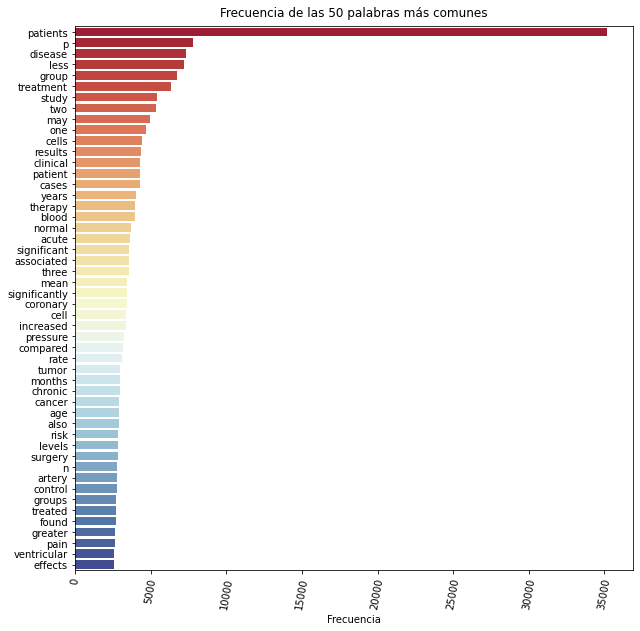

In [ ]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(50))))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_50[:, 1].astype("int"), y=most_common_50[:, 0], ax=ax, palette='RdYlBu', orientation="horizontal");
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Frecuencia')
ax.tick_params(axis='x', rotation=80)

Visualizamos además las frecuencias para los 20 bigramas más comunes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



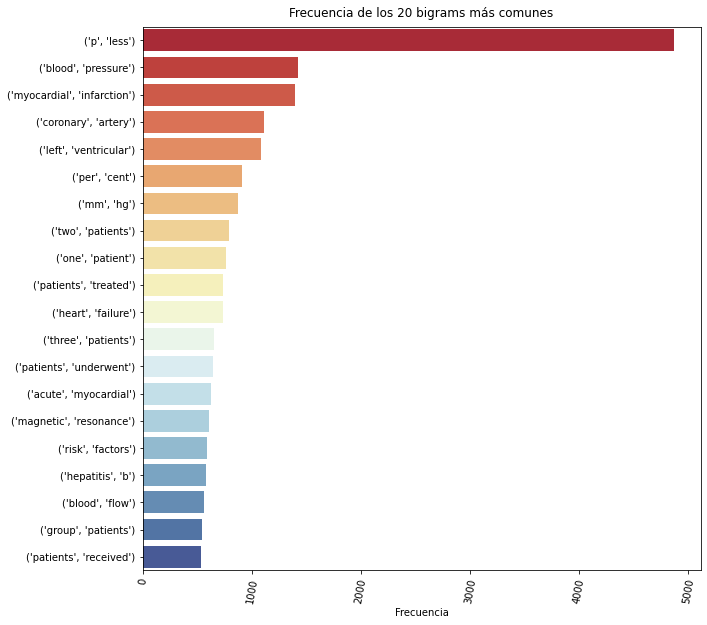

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 1].astype("int"), y=most_common_20[:, 0], ax=ax, palette='RdYlBu', orientation="horizontal");
ax.set_title('Frecuencia de los 20 bigrams más comunes', pad=10)
ax.set_xlabel('Frecuencia')
ax.tick_params(axis='x', rotation=80)

Generamos histogramas para visualizar tanto la frecuencia de la longitud de las palabras como la frecuencia de la cantidad de palabras en una oración

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



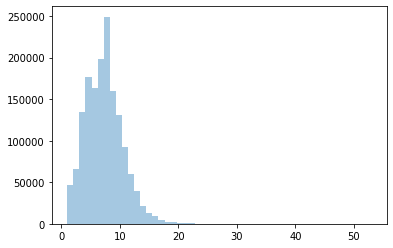

In [ ]:
word_lengths = [len(w) for w in all_words_except_stop_words]
sns.distplot(word_lengths, kde=False, norm_hist=False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



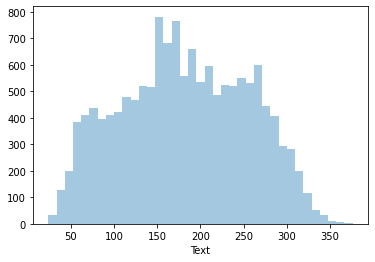

In [ ]:
num_of_words = text.str.split(' ').str.len()
sns.distplot(num_of_words, kde=False, norm_hist=False);

Finalmente vamos a generar una nube de palabras para detectar los temas más importantes de tu conjunto de datos.

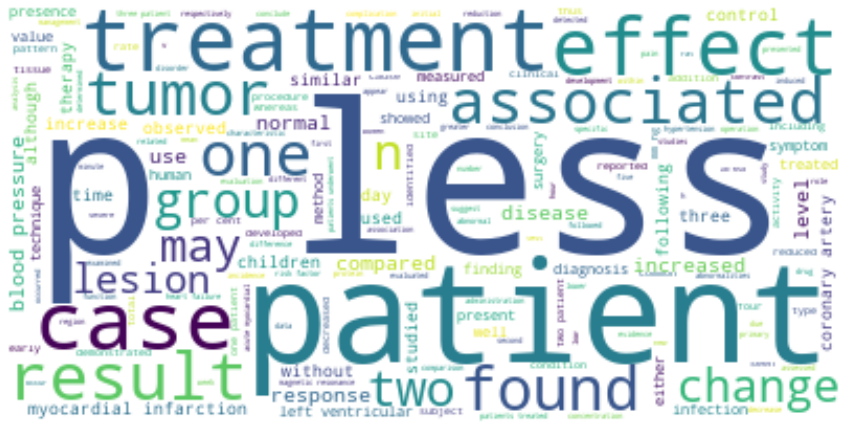

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##Introducción a Machine learning

Consideramos que un país es eficiente en su estrategia de tratamiento si de 2018 a 2020 se observa una reducción en el total de casos presentados. 

Realizaremos un modelo de regresión logística con la finalidad de determinar si es posible determinar esta eficiencia a partir de datos como la cantidad de casos totales y tratados, la tasa de mortalidad, entre otros.

Cabe resaltar que para realizar este modelo no consideraremos en cuenta aquellos países de los que no tenemos información de los 3 años

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [ ]:
data_2018 = df[df["year"] == 2018]
data_2020 = df[df["year"] == 2020]

La función efficient determina si un país es eficiente o no en cuanto al tratamiento. Regresamos un -1 si no se cuenta con datos de 2018 o 2020.

In [ ]:
def efficient(row):
  if row.loc["country"] not in data_2020["country"].unique() or row.loc["country"] not in data_2018["country"].unique():
    return -1
  else: 
    cases_2018 = data_2018[data_2018["country"] == row.loc["country"]]["total_cases"].values[0]
    cases_2020 =  data_2020[data_2020["country"] == row.loc["country"]]["total_cases"].values[0]
    if cases_2020 < cases_2018:
      return 1
    else:
      return 0

Agregamos la variable al dataset y consideramos solo los países para los que se obtuvo 0 o 1

In [ ]:
df["efficient"] = df.apply(lambda x: efficient(x), axis=1)

In [ ]:
df_class = df[(df["efficient"] == 0) | (df["efficient"] ==1 )]

Desarrollamos y entrenamos un modelo de regresión logística que considera todas las variables numéricas

In [ ]:
X = df_class.drop(columns=['efficient', "country", "continent"])
y = df_class['efficient']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [ ]:
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Obtenemos la exactitud del modelo

In [ ]:
logreg.score(X_test, y_test)

0.5797101449275363

A continuación visualizaremos la matriz de confusión para evaluar mejor el modelo

In [ ]:
y_predict = logreg.predict(X_test)
conf_mat = metrics.confusion_matrix(y_test, y_predict)
conf_mat

array([[ 6, 25],
       [ 4, 34]])

Text(0.5, 384.16, 'Estimado por el modelo')

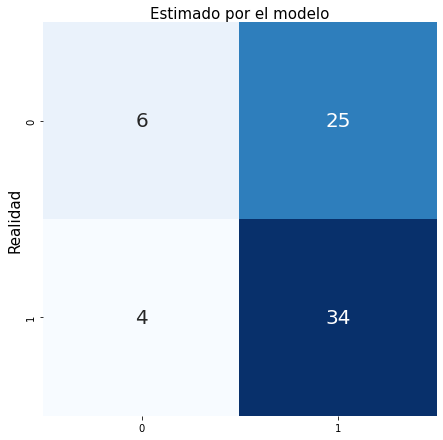

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15)

Observamos que se tiene una cantidad considerable de Verdaderos Positivos, sin embargo también hay una gran cantidad de Falsos Positivos

Calculamos además distintas medidas para evaluar qué tan correcto es el modelo

In [ ]:
tn, fp, fn, tp = conf_mat.ravel()

print("Precisión:",metrics.precision_score(y_test, y_predict))
print("Exactitud:",metrics.accuracy_score(y_test, y_predict))
print("Sensibilidad:",metrics.recall_score(y_test, y_predict))
print("Especificidad:", tn / (tn + fp))

Precisión: 0.576271186440678
Exactitud: 0.5797101449275363
Sensibilidad: 0.8947368421052632
Especificidad: 0.1935483870967742


Observamos que el modelo tiene una precisión y exactitud medias, su sensibilidad es más alta, sin embargo cuenta con baja especificidad. Esto indica que es útil para distinguir las clasificaciones positivas, pero no las negativas.

Finalmente vamos a graficar la curva ROC y obtener el valor de AUC

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

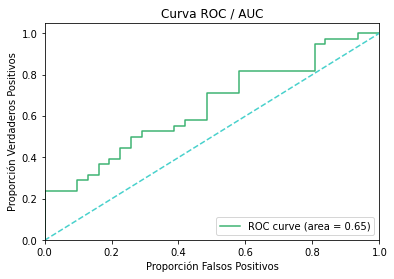

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='mediumseagreen',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='mediumturquoise', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Falsos Positivos')
plt.ylabel('Proporción Verdaderos Positivos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

El valor de AUC se encuentra ligeramente por encima de 0.5, indicando que el modelo tiene una eficiencia media, al no poder distinguir con gran exactitud entre positivos y negativos. Probablemente se requeriría considerar otras variables para hacer una mejor predicción.